In [27]:
import pandas as pd
import glob
import os

# Reset all_data to an empty DataFrame
all_data = pd.DataFrame()

folder_path = '/Users/zenglingjie/PycharmProjects/wirelessnetwork/Lob_test'
file_pattern = "UoB_Set01_2025-*.csv"
file_paths = glob.glob(os.path.join(folder_path, file_pattern))

for file_path in file_paths:
    # Read CSV file
    daily_data = pd.read_csv(file_path)
    
    # Extract date from file name
    date_str = file_path.split('/')[-1].split('Set01_')[1].split('LOBs')[0]
    date = pd.to_datetime(date_str)
    # Add date to daily_data
    daily_data['Date'] = date
    
    # Merge daily_data into all_data
    all_data = pd.concat([all_data, daily_data], ignore_index=True)

# Check and remove any rows containing NaT
all_data.dropna(subset=['Date'], inplace=True)

# Convert 'Time' column (if 'Time' column does exist in your data)
if 'Time' in all_data.columns:
    all_data['Time'] = pd.to_datetime(all_data['Time'], format='%H:%M:%S').dt.time
else:
    # If 'Time' column doesn't exist, you may need to add logic to handle or generate time information
    pass

# Set 'Date' and 'Time' as multi-index
all_data.set_index(['Date', 'Time'], inplace=True)

print(all_data.head())


                            Bid1        Bid2        Ask1        Ask2  \
Date       Time                                                        
2025-01-03 07:30:00       [0, 0]      [0, 0]  [281.0, 2]  [354.0, 3]   
           07:30:01       [0, 0]      [0, 0]  [354.0, 3]      [0, 0]   
           07:30:02  [173.5, 12]      [0, 0]  [354.0, 6]      [0, 0]   
           07:30:03    [57.0, 6]      [0, 0]  [354.0, 3]      [0, 0]   
           07:30:04    [58.5, 4]  [57.0, 12]  [354.0, 6]      [0, 0]   

                     Mid-Price  Total_volume  Bid_ask_spread  Order_imbalance  
Date       Time                                                                
2025-01-03 07:30:00     140.50             5           281.0            -1.00  
           07:30:01     177.00             3           354.0            -1.00  
           07:30:02     263.75            18           180.5             0.33  
           07:30:03     205.50             9           297.0             0.33  
           07:3

In [29]:

all_data.index = all_data.index.set_levels(pd.to_datetime(all_data.index.levels[0]), level=0)
all_data.index = all_data.index.set_levels(pd.to_datetime(all_data.index.levels[1], format='%H:%M:%S').time, level=1)


In [ ]:
import matplotlib.pyplot as plt

# Get all unique dates and sort them
unique_dates = all_data.index.get_level_values('Date').unique()
unique_dates = sorted(unique_dates)  # Sort dates

# Plot trading curve and trading volume for each unique date
for date in unique_dates:
    # Get data for the current date
    daily_data = all_data.loc[date]
    
    # Convert time to minutes since midnight
    minutes_since_midnight = daily_data.index.get_level_values('Time').map(lambda t: t.hour * 60 + t.minute)
    
    # Create the plot and dual y-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    color = 'tab:red'
    ax1.set_xlabel('Minutes since midnight')
    ax1.set_ylabel('Mid-Price', color=color)
    ax1.plot(minutes_since_midnight, daily_data['Mid-Price'], label='Mid-Price', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Instantiate the second y-axis
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Total Volume', color=color)  
    ax2.plot(minutes_since_midnight, daily_data['Total_volume'], label='Total Volume', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Add title and legend
    plt.title(f'Mid-Price and Total Volume Trading Curve for {date.date()}')
    fig.tight_layout()  # Adjust layout
    plt.show()


In [10]:
# Calculate the average of the daily mid-price and total volume
daily_stats = all_data.groupby('Date').agg({'Mid-Price': 'mean', 'Total_volume': 'sum'})


In [11]:
# Export of daily statistics
print(daily_stats)

             Mid-Price  Total_volume
Date                                
2025-01-02  286.411847       5424861
2025-01-03  306.542356       5067907
2025-01-06  317.788385       5310600
2025-01-07  359.014978       5677630
2025-01-08  339.691776       5399132
...                ...           ...
2025-05-23  157.580967       4960918
2025-05-27  159.083260       4887301
2025-05-28  154.868634       5049099
2025-05-29  150.737557       5001801
2025-05-30  146.127211       5077811

[103 rows x 2 columns]


In [12]:
daily_stats.to_csv('daily_stats.csv')

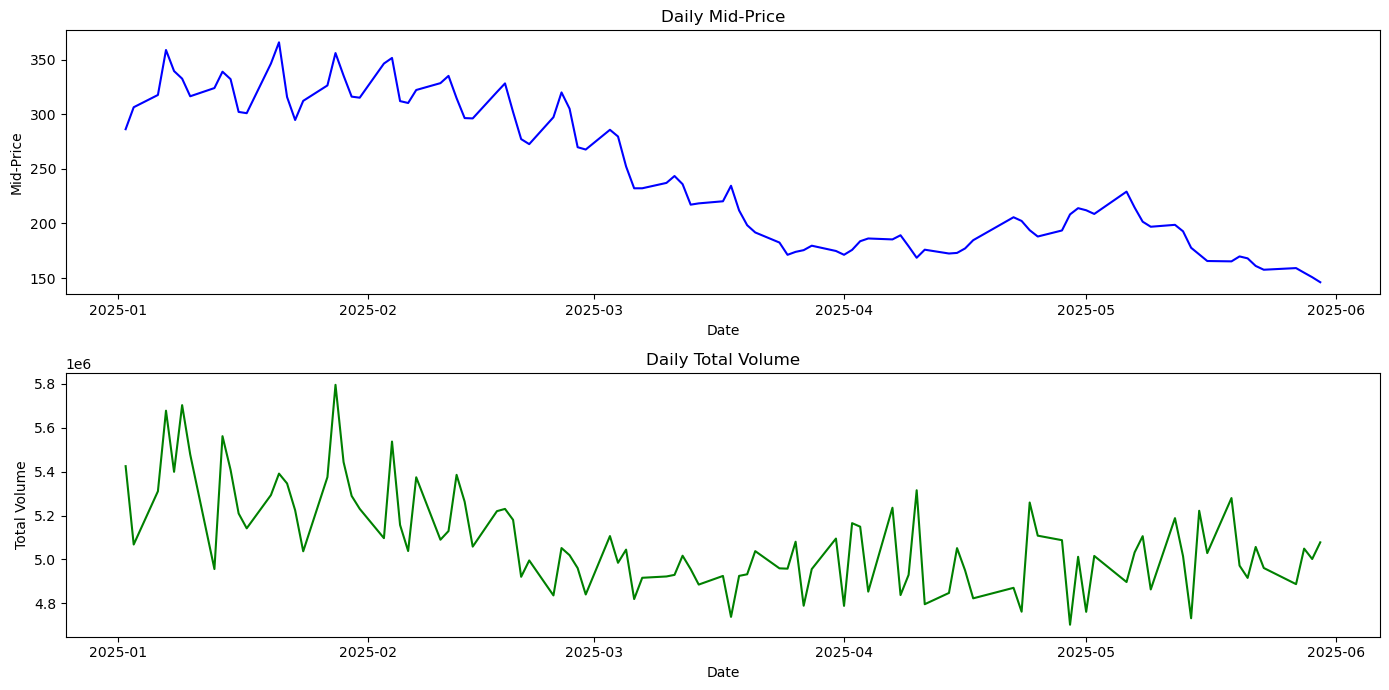

Statistics for Mid-Price:
count    103.000000
mean     244.653133
std       66.375687
min      146.127211
25%      183.113515
50%      229.176731
75%      312.277452
max      366.045161
Name: Mid-Price, dtype: float64

Statistics for Total Volume:
count    1.030000e+02
mean     5.084678e+06
std      2.237606e+05
min      4.702386e+06
25%      4.927216e+06
50%      5.044567e+06
75%      5.222762e+06
max      5.795433e+06
Name: Total_volume, dtype: float64
Correlation between Mid-Price and Total Volume: 0.6020199279480856


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
file_path = "/Users/zenglingjie/PycharmProjects/wirelessnetwork/daily_stats.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])

# Set the date as index
df.set_index('Date', inplace=True)

# Data visualization
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Mid-Price'], color='blue')
plt.title('Daily Mid-Price')
plt.xlabel('Date')
plt.ylabel('Mid-Price')

plt.subplot(2, 1, 2)
plt.plot(df['Total_volume'], color='green')
plt.title('Daily Total Volume')
plt.xlabel('Date')
plt.ylabel('Total Volume')

plt.tight_layout()
plt.show()

# Statistical analysis
statistics = df.describe()
print("Statistics for Mid-Price:")
print(statistics['Mid-Price'])
print("\nStatistics for Total Volume:")
print(statistics['Total_volume'])

# Correlation analysis
correlation = df['Mid-Price'].corr(df['Total_volume'])
print("Correlation between Mid-Price and Total Volume:", correlation)


The correlation coefficient between Mid-Price and Total Volume is calculated to be about 0.586. This indicates that there is a moderate positive correlation between these two variables, i.e. when the Mid-Price increases, the Total Volume is likely to increase and vice versa, but it is not a perfectly linear relationship.

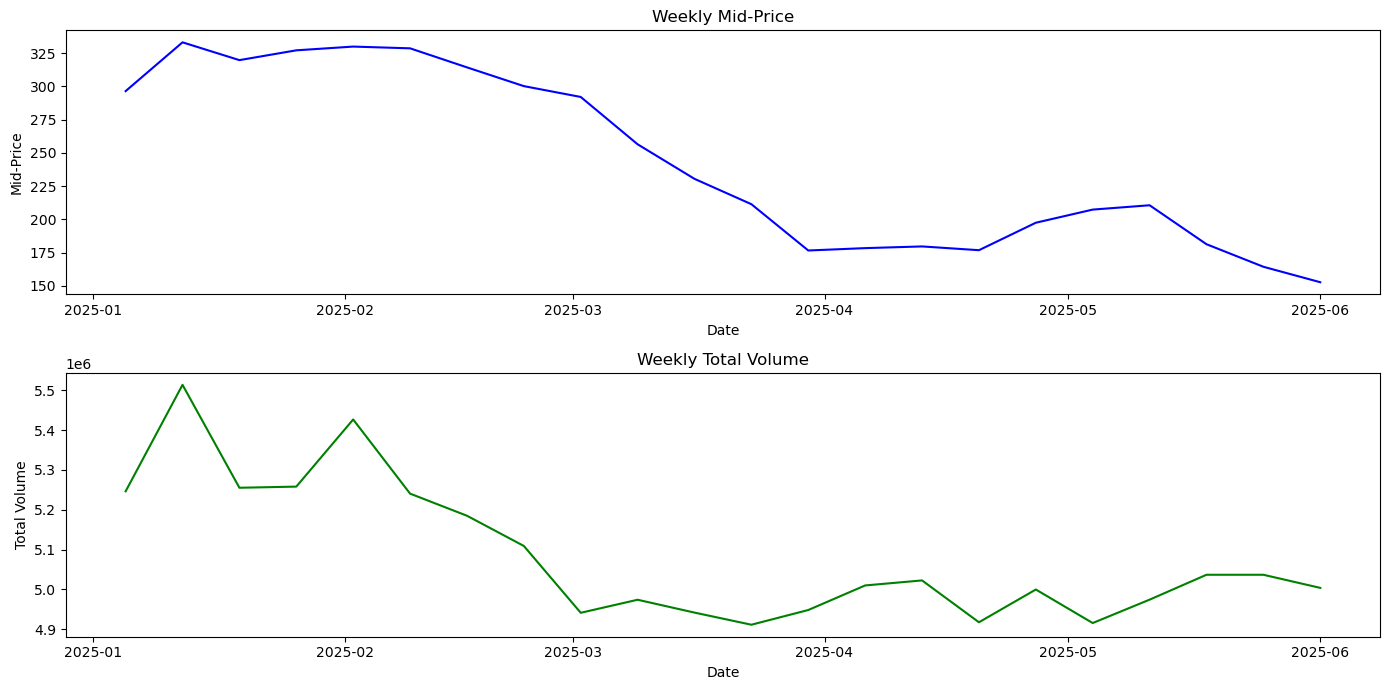

Statistics for Weekly Mid-Price:
count     22.000000
mean     243.875163
std       65.643044
min      152.704165
25%      180.047575
50%      220.933688
75%      310.807508
max      333.167484
Name: Mid-Price, dtype: float64

Statistics for Weekly Total Volume:
count    2.200000e+01
mean     5.085064e+06
std      1.717173e+05
min      4.911519e+06
25%      4.954905e+06
50%      5.016429e+06
75%      5.226709e+06
max      5.513686e+06
Name: Total_volume, dtype: float64

Trend Analysis:
Mid-Price trend: downward
Total Volume trend: downward


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
file_path = "/Users/zenglingjie/PycharmProjects/wirelessnetwork/daily_stats.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])

# Set the date as index
df.set_index('Date', inplace=True)

# Resample the data to weekly frequency and calculate the mean for each week
weekly_df = df.resample('W').mean()

# Plot the line chart
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(weekly_df['Mid-Price'], color='blue')
plt.title('Weekly Mid-Price')
plt.xlabel('Date')
plt.ylabel('Mid-Price')

plt.subplot(2, 1, 2)
plt.plot(weekly_df['Total_volume'], color='green')
plt.title('Weekly Total Volume')
plt.xlabel('Date')
plt.ylabel('Total Volume')

plt.tight_layout()
plt.show()

# Statistical analysis
statistics = weekly_df.describe()
print("Statistics for Weekly Mid-Price:")
print(statistics['Mid-Price'])
print("\nStatistics for Weekly Total Volume:")
print(statistics['Total_volume'])

# Trend analysis
print("\nTrend Analysis:")
trend_mid_price = 'upward' if weekly_df['Mid-Price'].diff().mean() > 0 else 'downward'
trend_total_volume = 'upward' if weekly_df['Total_volume'].diff().mean() > 0 else 'downward'
print("Mid-Price trend:", trend_mid_price)
print("Total Volume trend:", trend_total_volume)


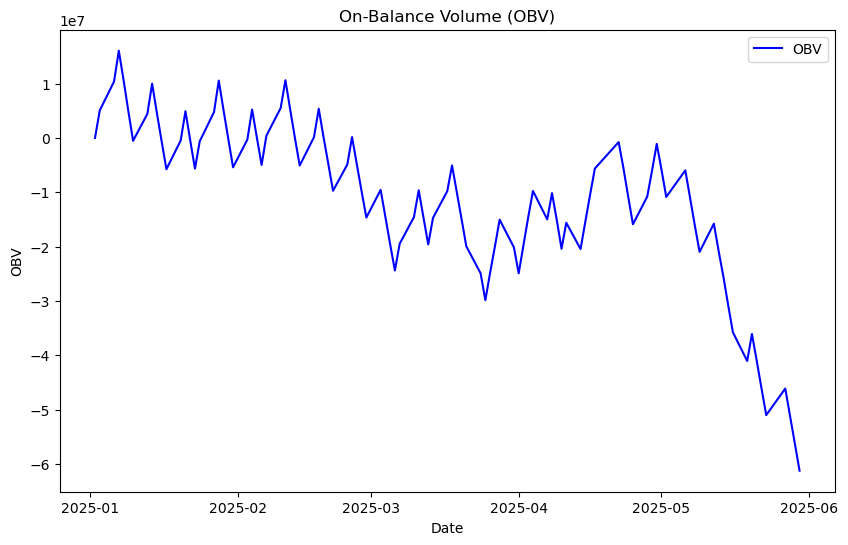

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
file_path = "/Users/zenglingjie/PycharmProjects/wirelessnetwork/daily_stats.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])

# Calculate daily price changes
df['Price Change'] = df['Mid-Price'].diff()

# Calculate OBV indicator
obv_values = [0]  # Initialize a list to store OBV values, starting with 0
for i in range(1, len(df)):
    price_change = df['Price Change'][i]
    volume = df['Total_volume'][i]
    if price_change > 0:
        obv_values.append(obv_values[-1] + volume)  # If the price rises, add the volume to the previous day's OBV value
    elif price_change < 0:
        obv_values.append(obv_values[-1] - volume)  # If the price falls, subtract the volume from the previous day's OBV value
    else:
        obv_values.append(obv_values[-1])  # If the price remains unchanged, OBV value remains the same

df['OBV'] = obv_values  # Add the calculated OBV values to the DataFrame

# Plot the OBV indicator
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['OBV'], color='blue', label='OBV')
plt.title('On-Balance Volume (OBV)')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.legend()
plt.show()


OBV is calculated like this: if today's closing price is higher than yesterday's closing price, then today's volume is added to OBV; if today's closing price is lower than yesterday's closing price, today's volume is subtracted from OBV. If the closing price remains the same, the OBV also remains the same.

In this chart, we can see that the OBV indicator continued to decline from its positive start until July when it approached -1e8. This downward trend could mean that selling pressure outweighed buying pressure over this period of time, indicating that sellers were dominating the market. Investors and traders may use this indicator to help determine the strength of the trend and possible price movement. If the OBV continues to decline without a drop in the stock price, this may signal the potential for future price declines. Conversely, if the OBV is falling while the stock price is stabilizing or rising, it may indicate that the downward momentum is weakening and the stock price may be reversing higher.

Overall, this chart shows a clear downtrend, suggesting that investors should probably be cautious during this period as the market exhibits stronger sell-side activity.

<bound method NDFrame.head of                              Bid1          Bid2          Ask1          Ask2  \
Date       Time                                                               
2025-01-03 07:30:00        [0, 0]        [0, 0]    [281.0, 2]    [354.0, 3]   
           07:30:01        [0, 0]        [0, 0]    [354.0, 3]        [0, 0]   
           07:30:02   [173.5, 12]        [0, 0]    [354.0, 6]        [0, 0]   
           07:30:03     [57.0, 6]        [0, 0]    [354.0, 3]        [0, 0]   
           07:30:04     [58.5, 4]    [57.0, 12]    [354.0, 6]        [0, 0]   
...                           ...           ...           ...           ...   
2025-04-17 15:59:55  [160.13, 45]  [159.38, 39]  [213.86, 21]  [280.15, 39]   
           15:59:56  [160.0, 109]   [158.0, 34]  [181.65, 37]  [208.46, 41]   
           15:59:57   [160.0, 40]   [158.0, 20]   [168.5, 30]   [212.0, 10]   
           15:59:58   [145.0, 23]  [125.05, 37]  [165.11, 28]  [177.35, 20]   
           15:59:59   

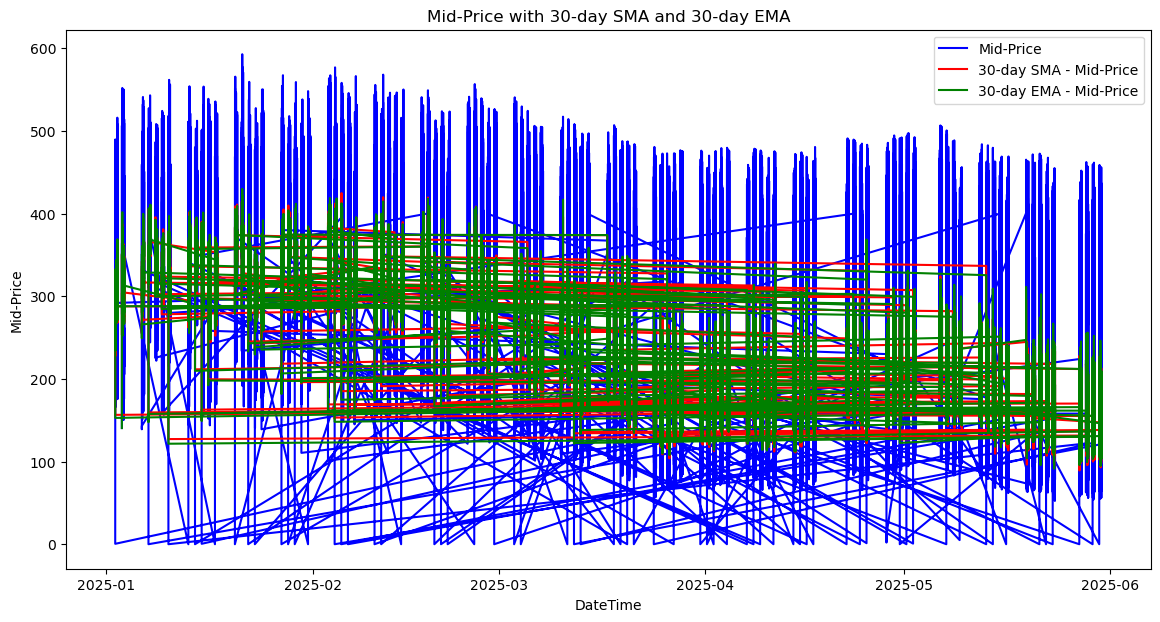

In [16]:
# Assuming all_data is your DataFrame
print(all_data.head)

# If your index is a multi-index, you can try resetting the index and then creating a new datetime column
# Here, assuming your date and time are already in columns of the DataFrame
all_data.reset_index(inplace=True)
all_data['DateTime'] = pd.to_datetime(all_data['Date'].astype(str) + ' ' + all_data['Time'].astype(str))

# Then set this new 'DateTime' column as the index
all_data.set_index('DateTime', inplace=True)

# Now you can continue your moving average analysis and plot based on the new datetime index
# For example, calculating the 30-day SMA and EMA of 'Mid-Price'
all_data['30-day-SMA-Mid-Price'] = all_data['Mid-Price'].rolling(window=30).mean()
all_data['30-day-EMA-Mid-Price'] = all_data['Mid-Price'].ewm(span=30, adjust=False).mean()

# Plotting the charts
plt.figure(figsize=(14, 7))
plt.plot(all_data['Mid-Price'], label='Mid-Price', color='blue')
plt.plot(all_data['30-day-SMA-Mid-Price'], label='30-day SMA - Mid-Price', color='red')
plt.plot(all_data['30-day-EMA-Mid-Price'], label='30-day EMA - Mid-Price', color='green')
plt.title('Mid-Price with 30-day SMA and 30-day EMA')
plt.xlabel('DateTime')
plt.ylabel('Mid-Price')
plt.legend()
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Assuming all_data is a DataFrame with 'Date' and 'Time' as a multi-index

# Calculate the product of price and volume for each time point
all_data['Price_Volume'] = all_data['Mid-Price'] * all_data['Total_volume']

# Group the data by each day and calculate VWAP
vwap = all_data.groupby('Date').apply(lambda x: x['Price_Volume'].sum() / x['Total_volume'].sum())

# Add the VWAP result to the DataFrame (as a new column)
# Note: Since VWAP is a daily value, we need to broadcast it to the corresponding rows in the original DataFrame
vwap.name = 'VWAP'  # Naming the Series for easier merging later
all_data = all_data.join(vwap, on='Date')

print(all_data[['Mid-Price', 'VWAP']].head())


                     Mid-Price        VWAP
DateTime                                  
2025-01-03 07:30:00     140.50  305.812285
2025-01-03 07:30:01     177.00  305.812285
2025-01-03 07:30:02     263.75  305.812285
2025-01-03 07:30:03     205.50  305.812285
2025-01-03 07:30:04     206.25  305.812285


In [ ]:
# Get all unique dates and sort them
unique_dates = all_data.index.get_level_values('Date').unique()
unique_dates = sorted(unique_dates)  # Sort dates

# Plot trading curve and trading volume for each unique date
for date in unique_dates:
    # Get data for the current date
    daily_data = all_data.loc[date]
    
    # Convert time to minutes since midnight
    minutes_since_midnight = daily_data.index.get_level_values('Time').map(lambda t: t.hour * 60 + t.minute)


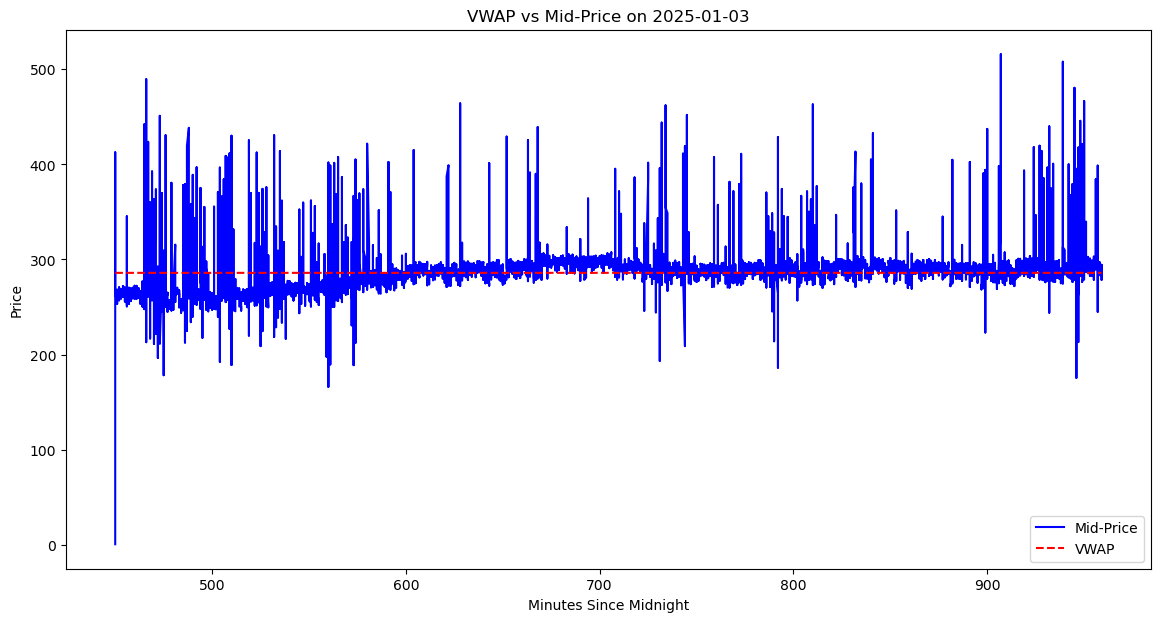

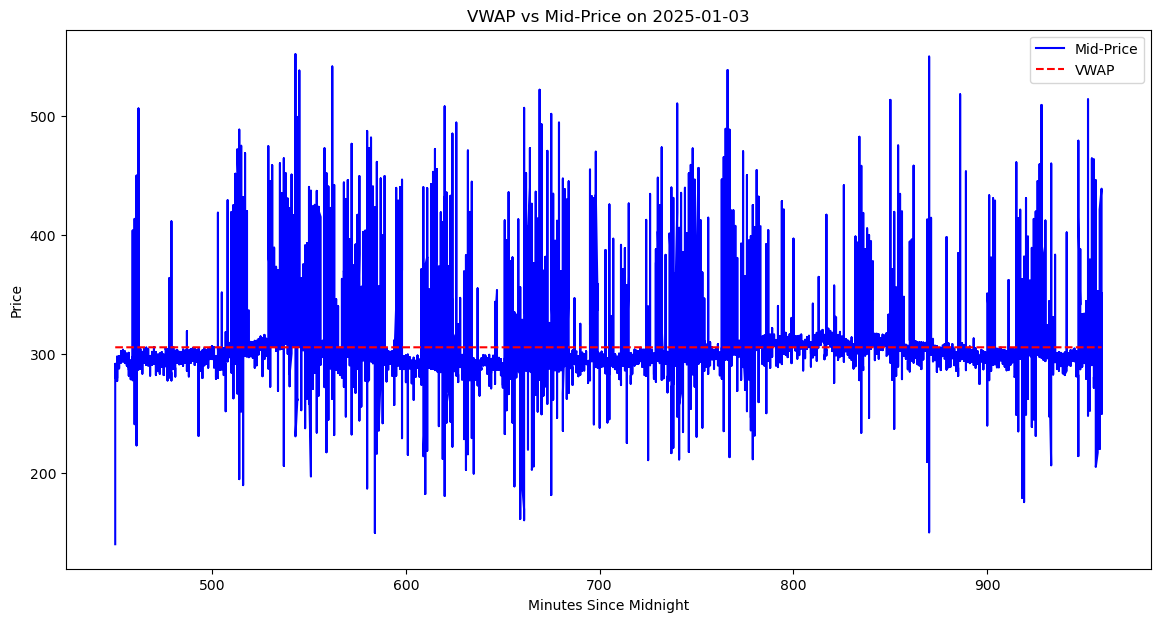

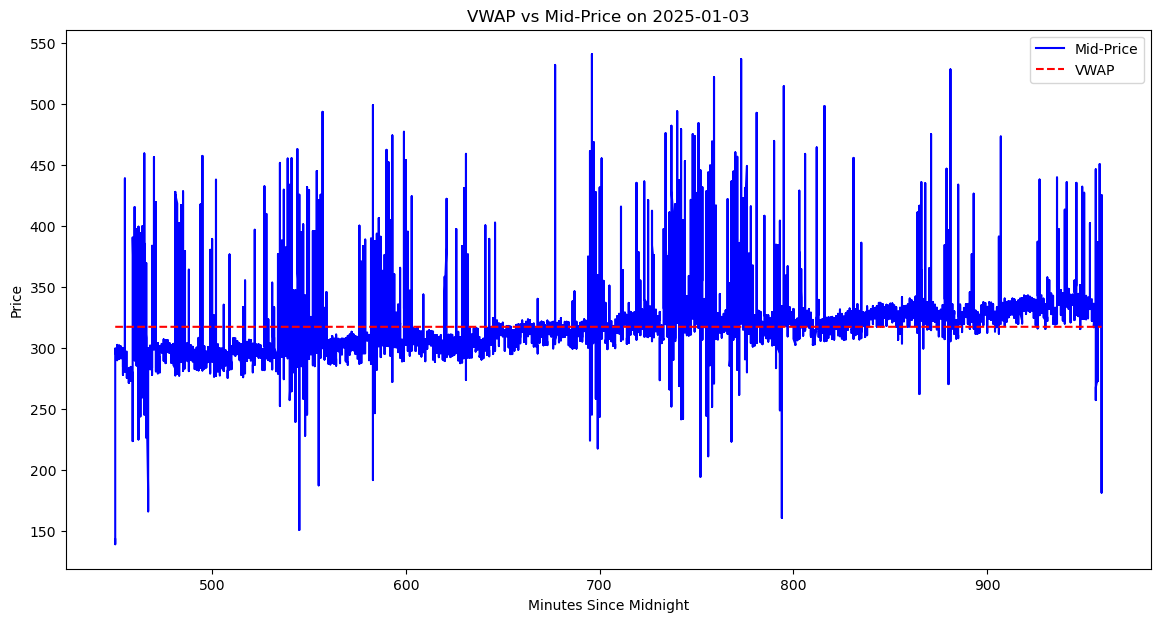

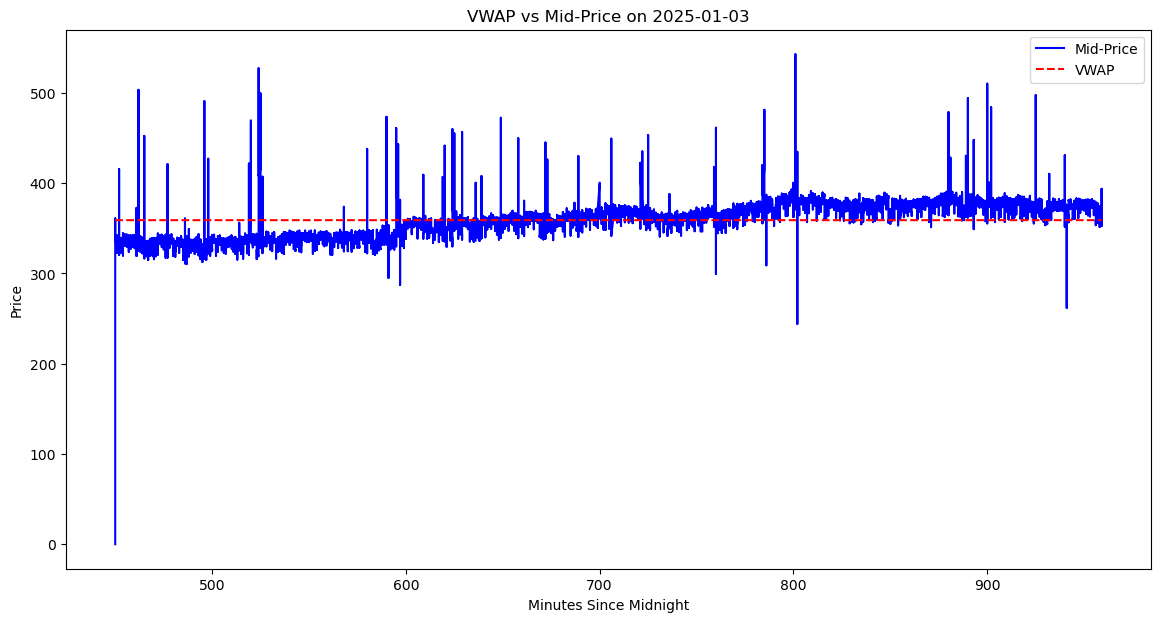

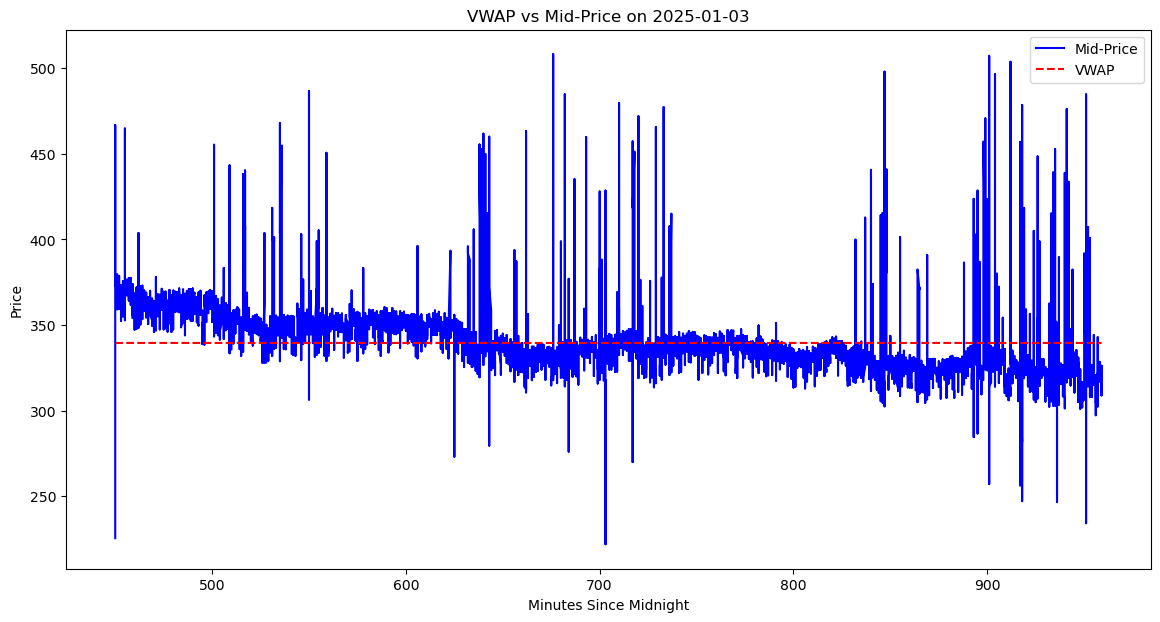

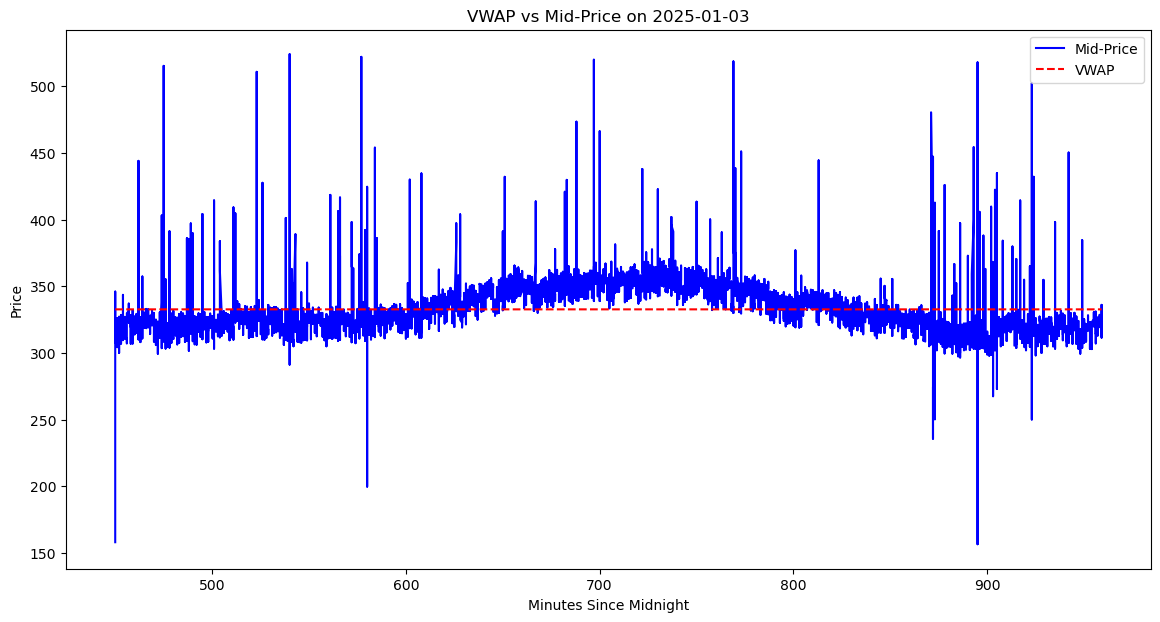

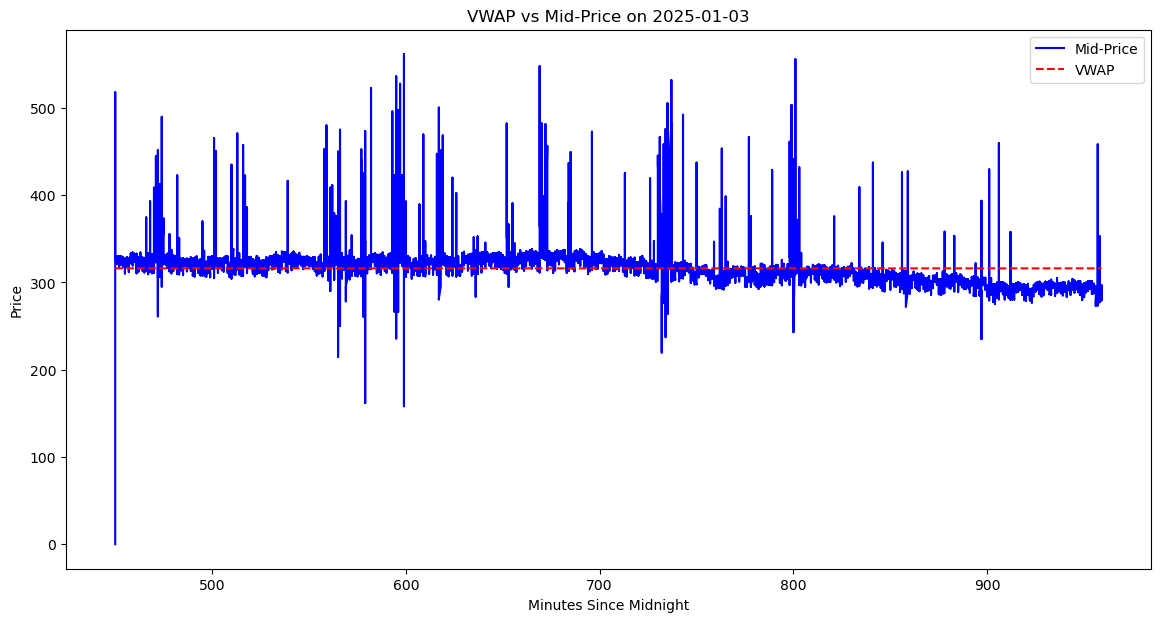

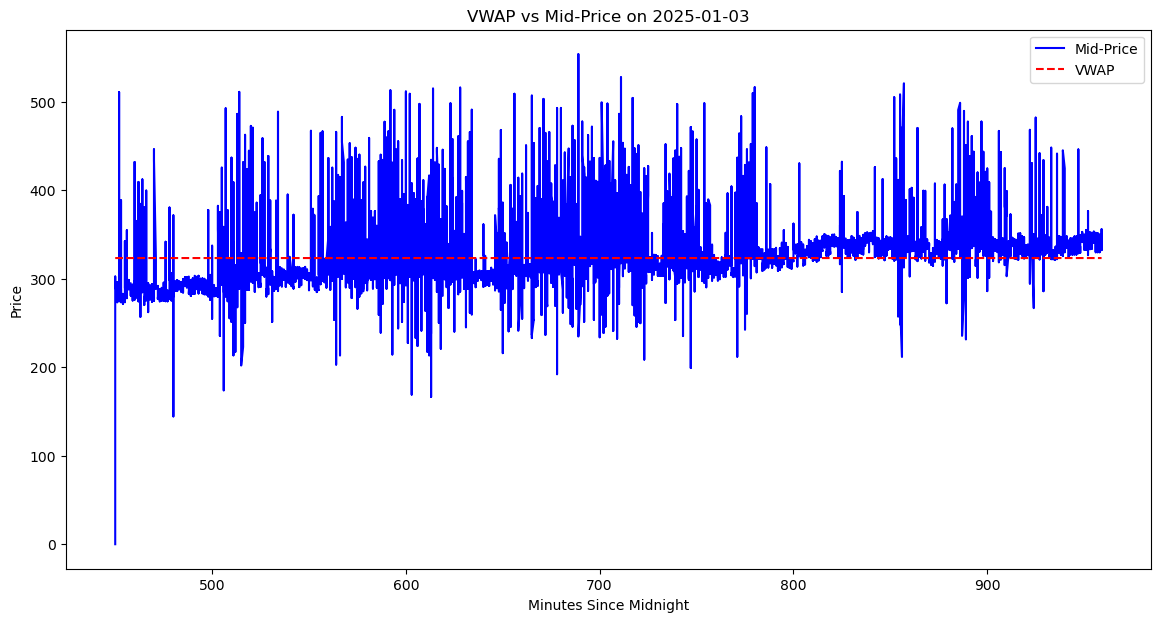

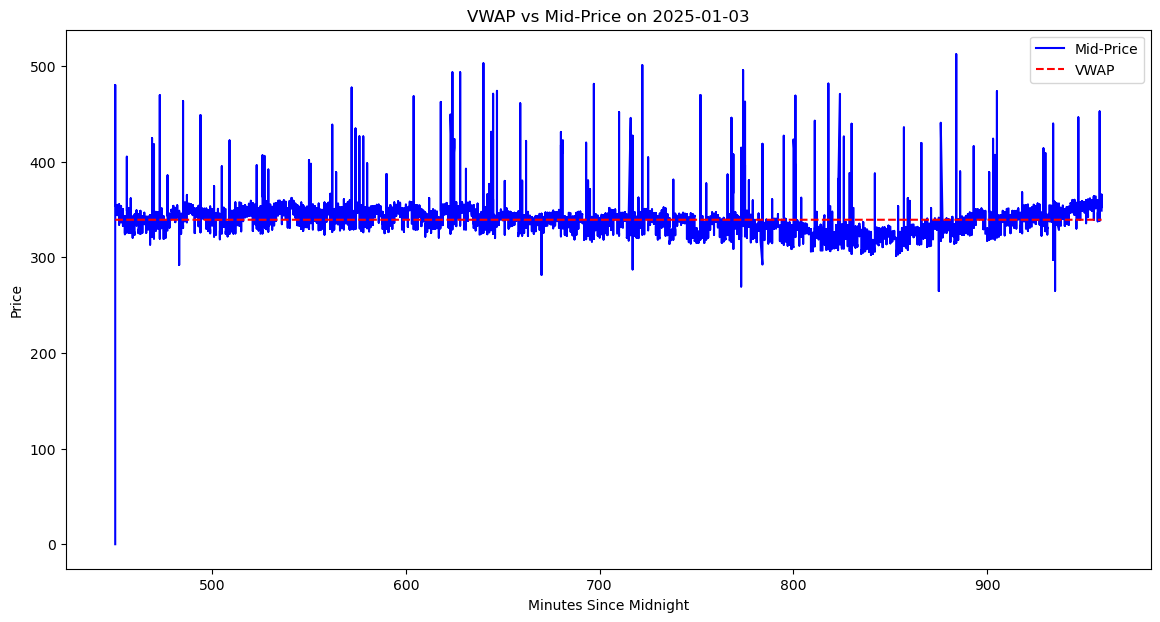

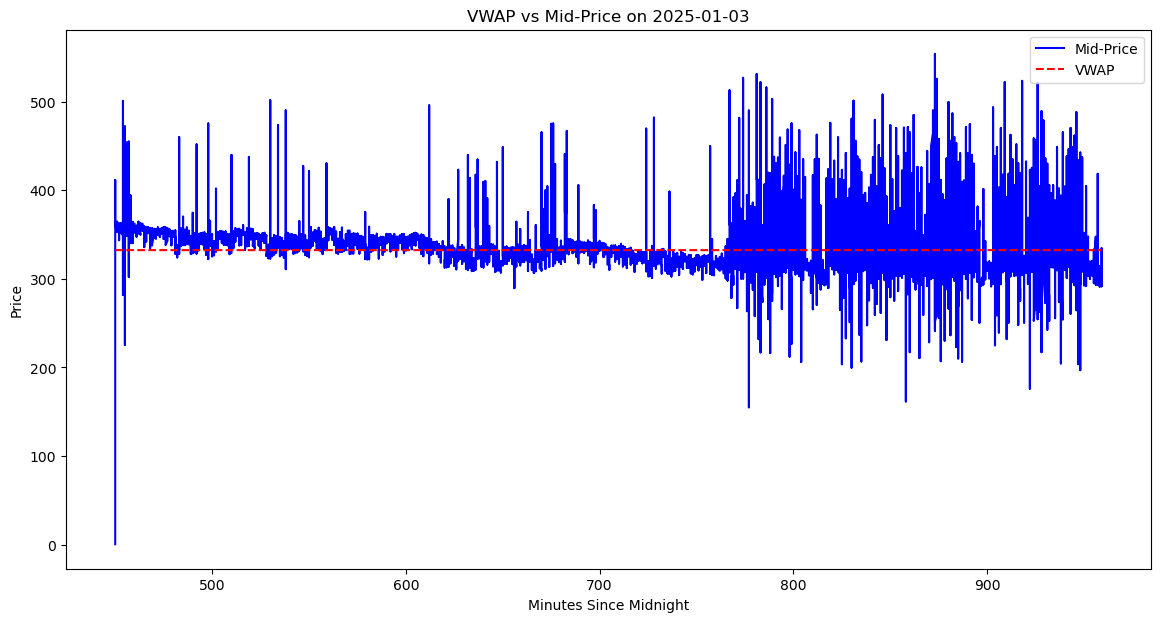

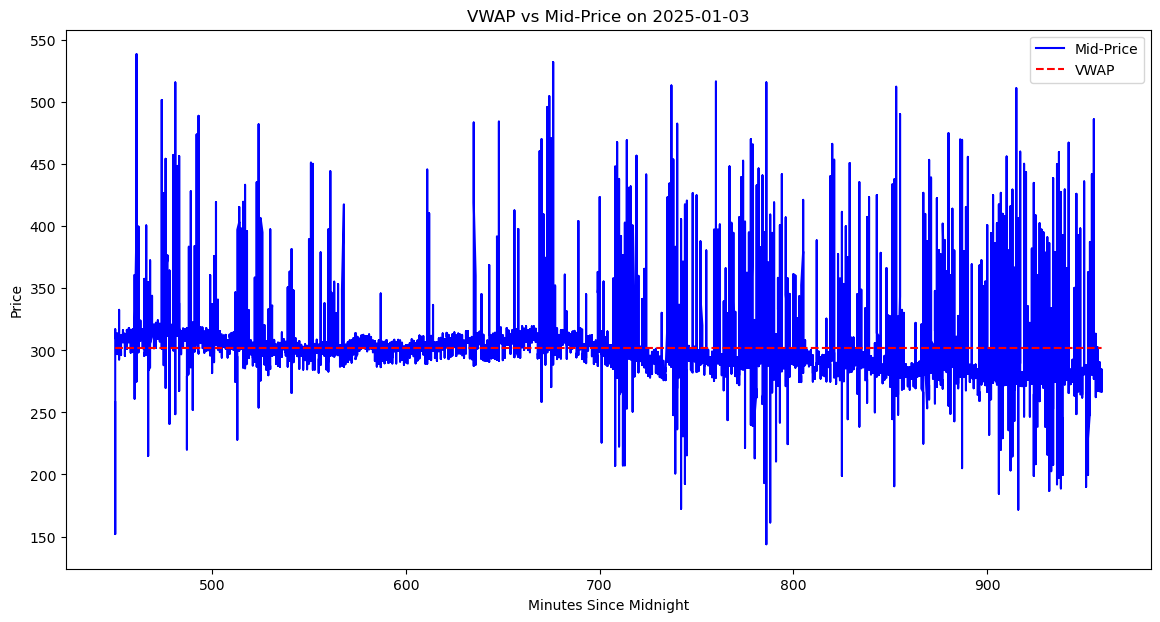

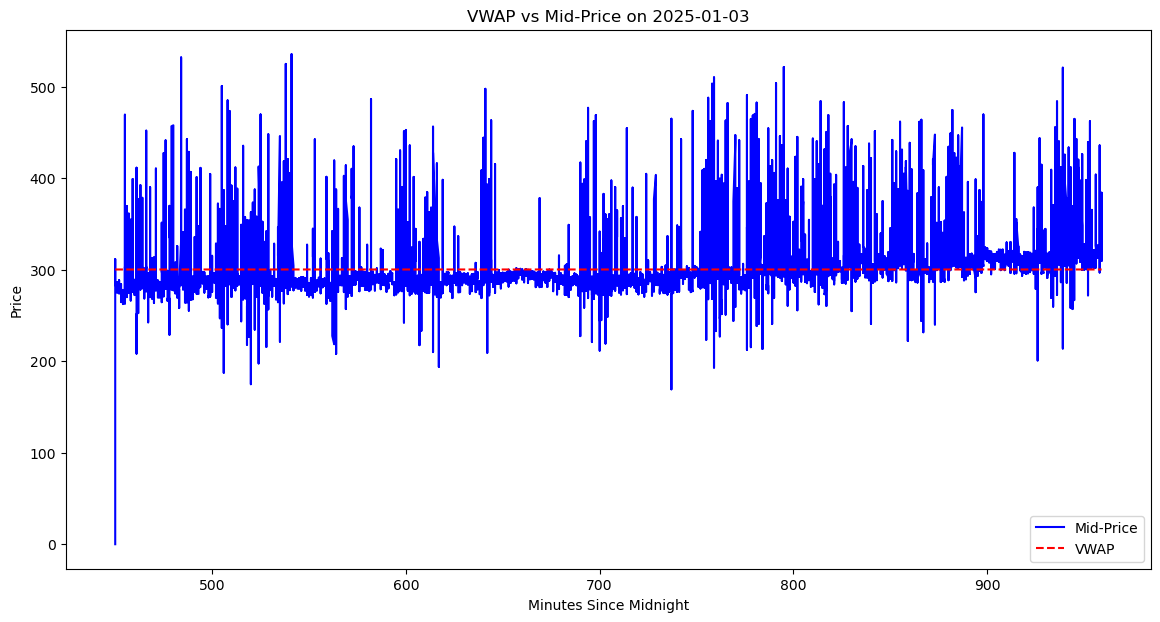

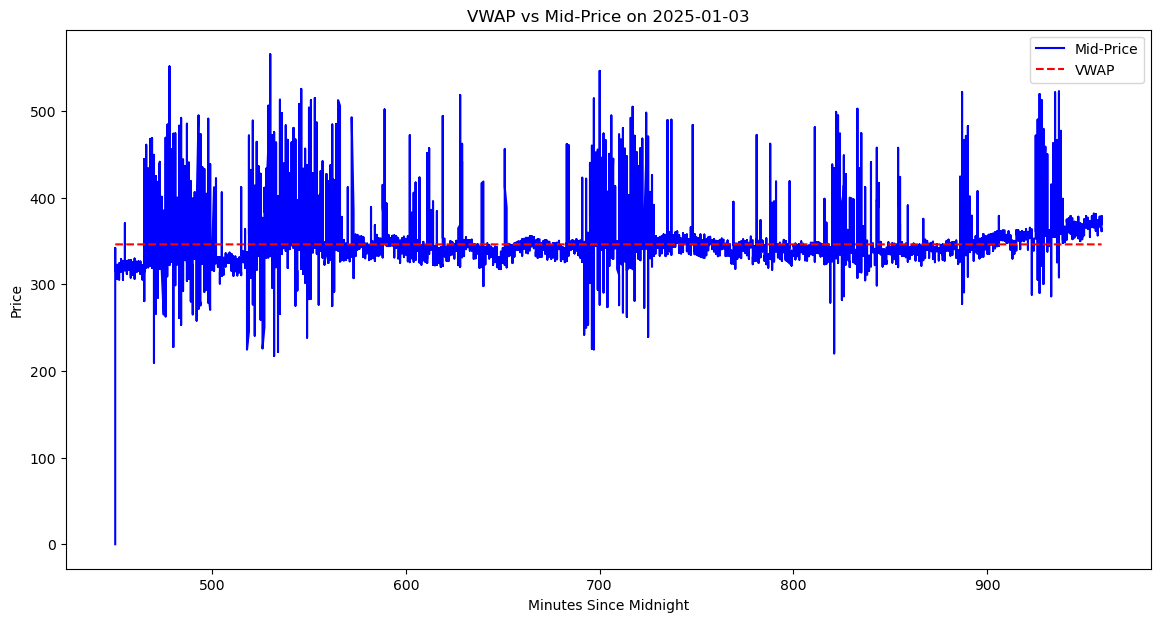

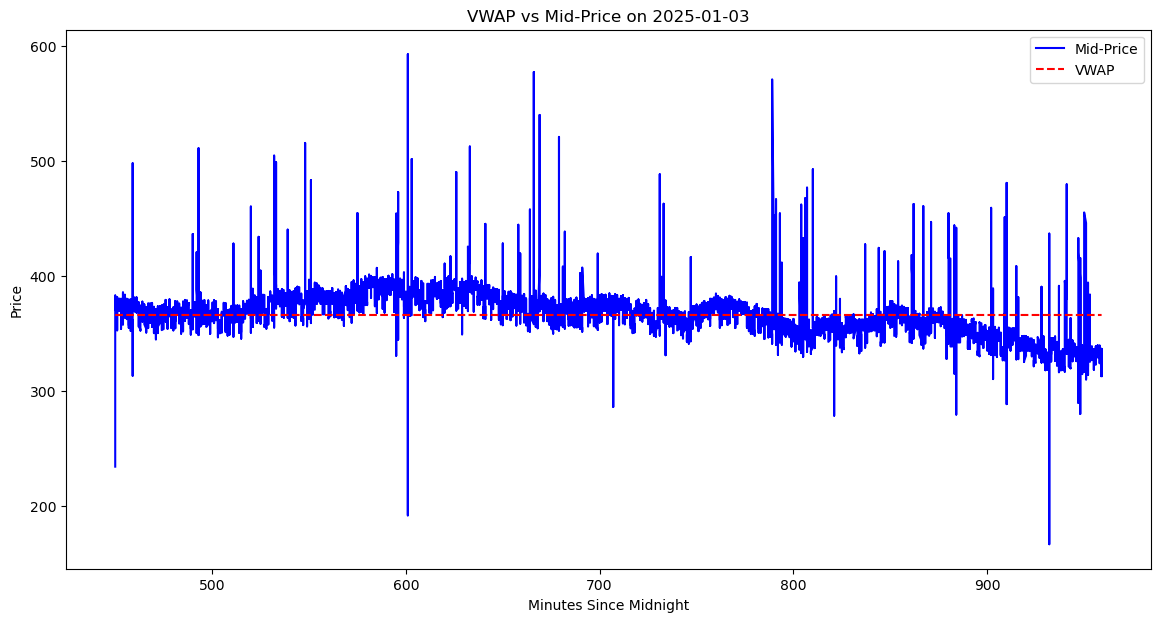

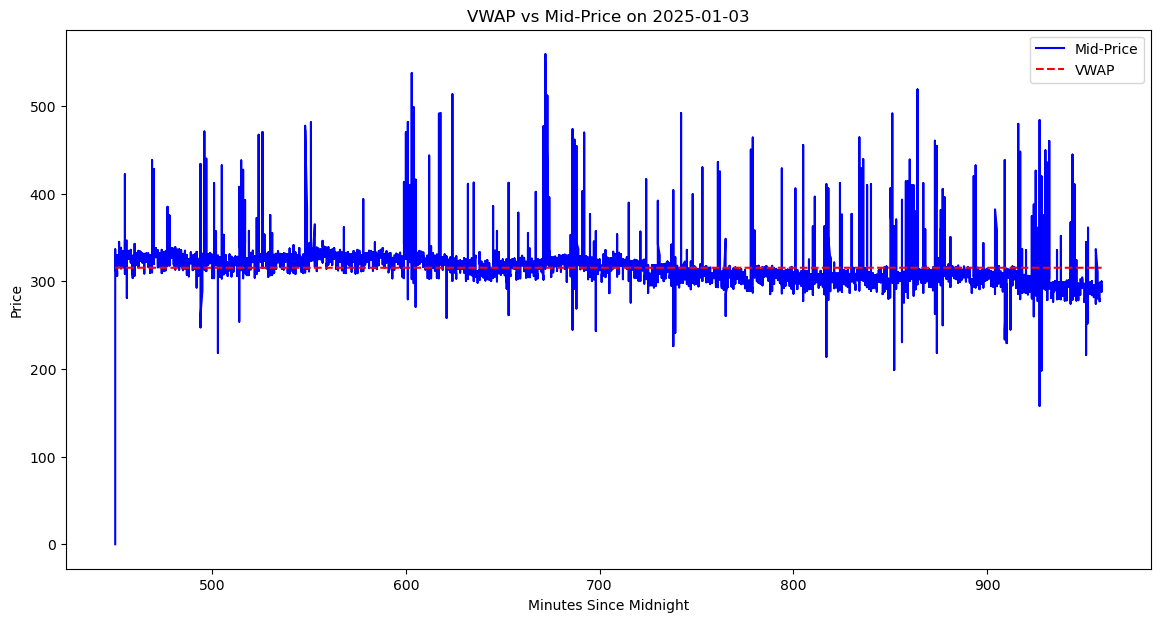

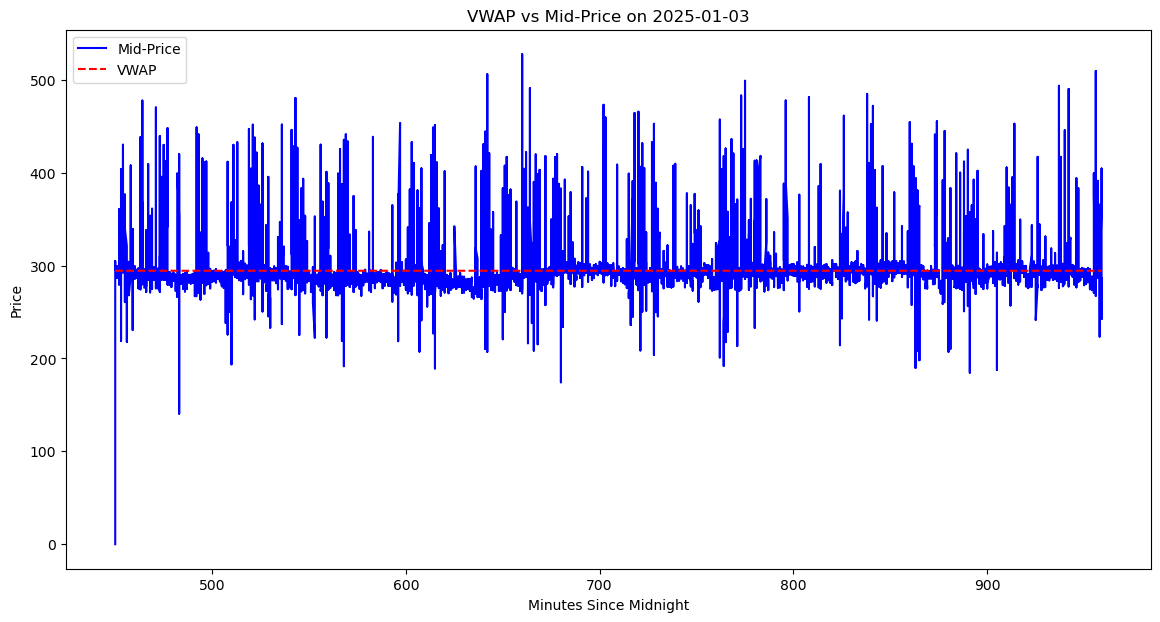

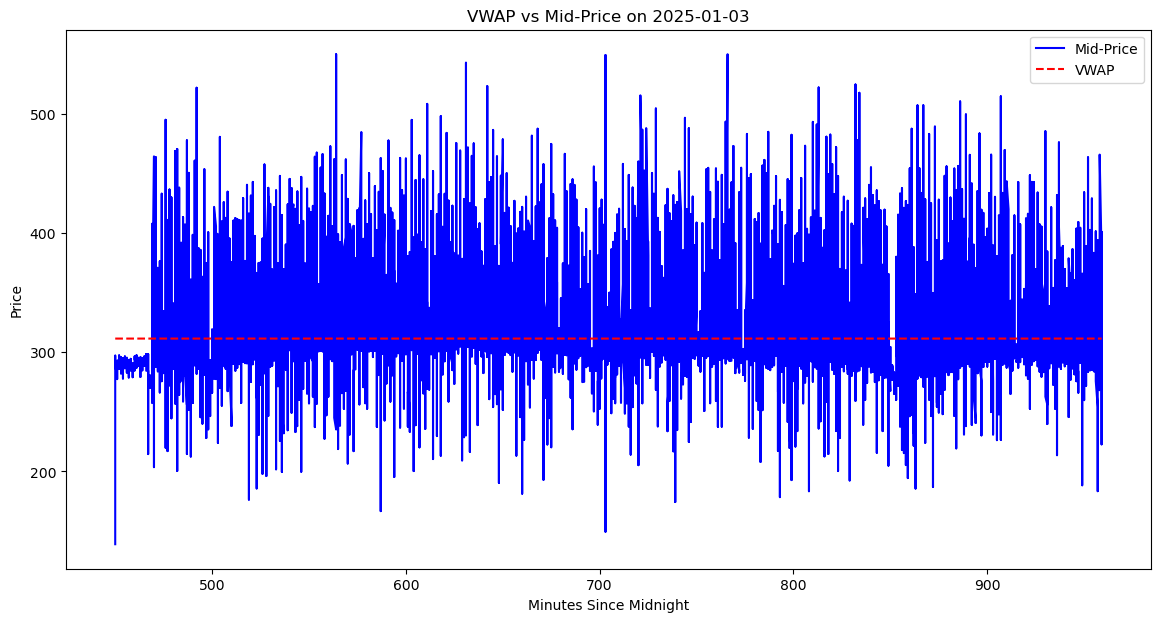

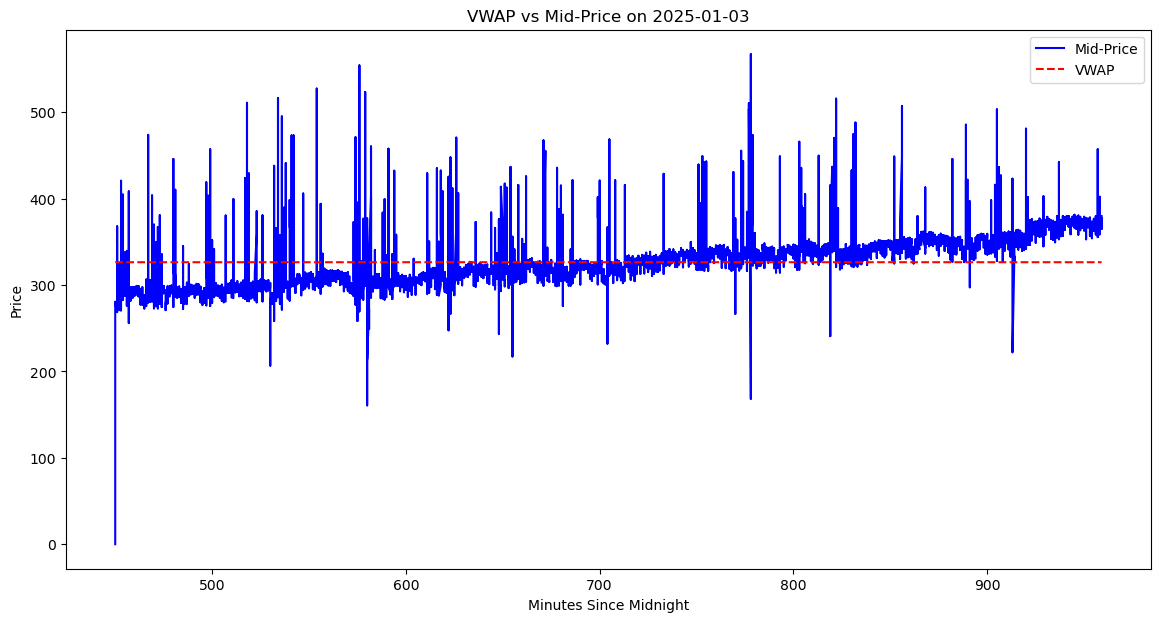

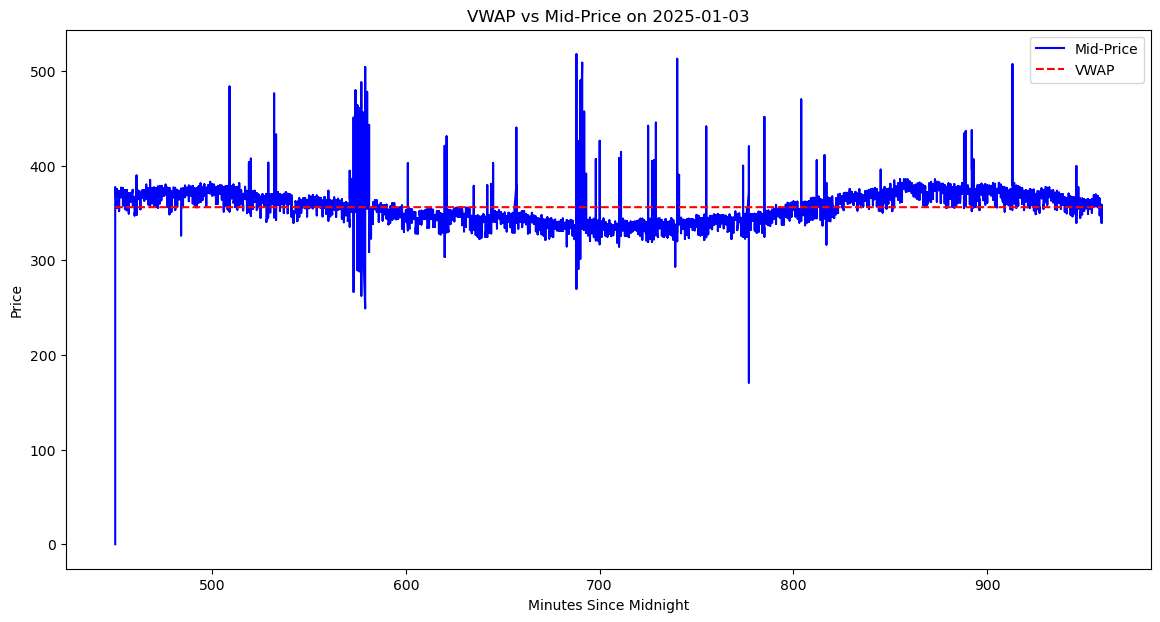

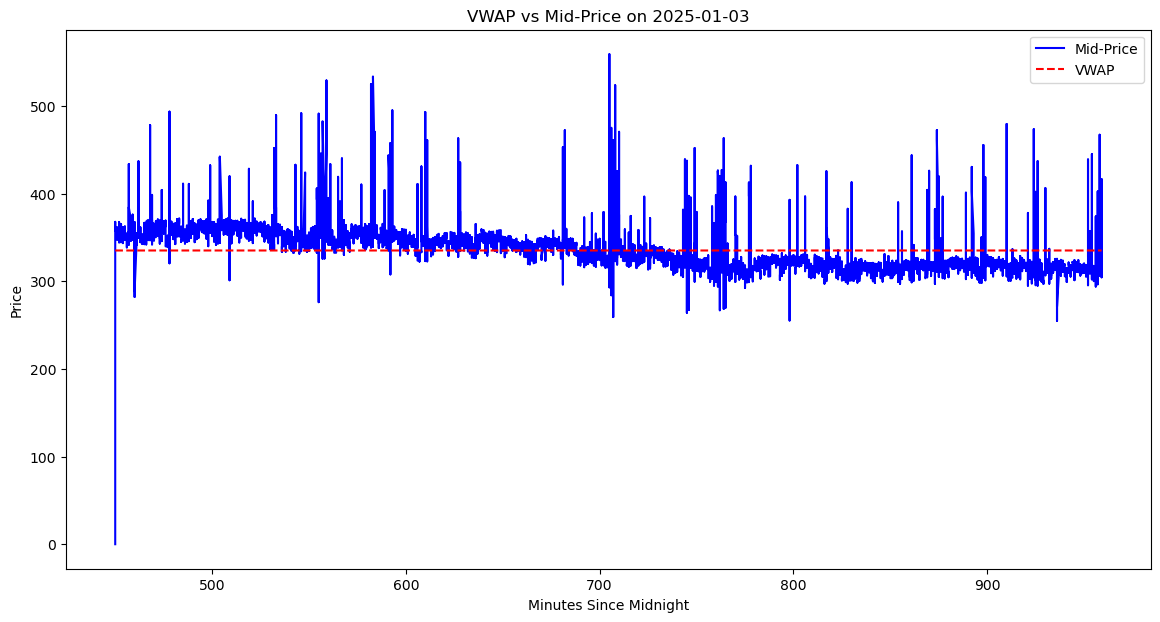

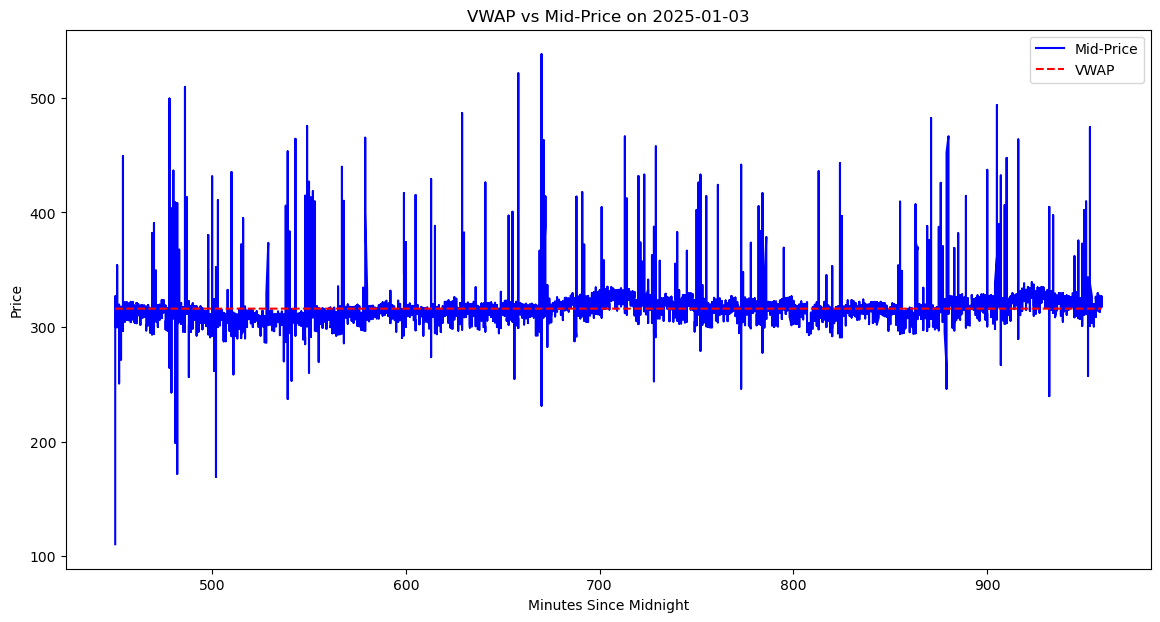

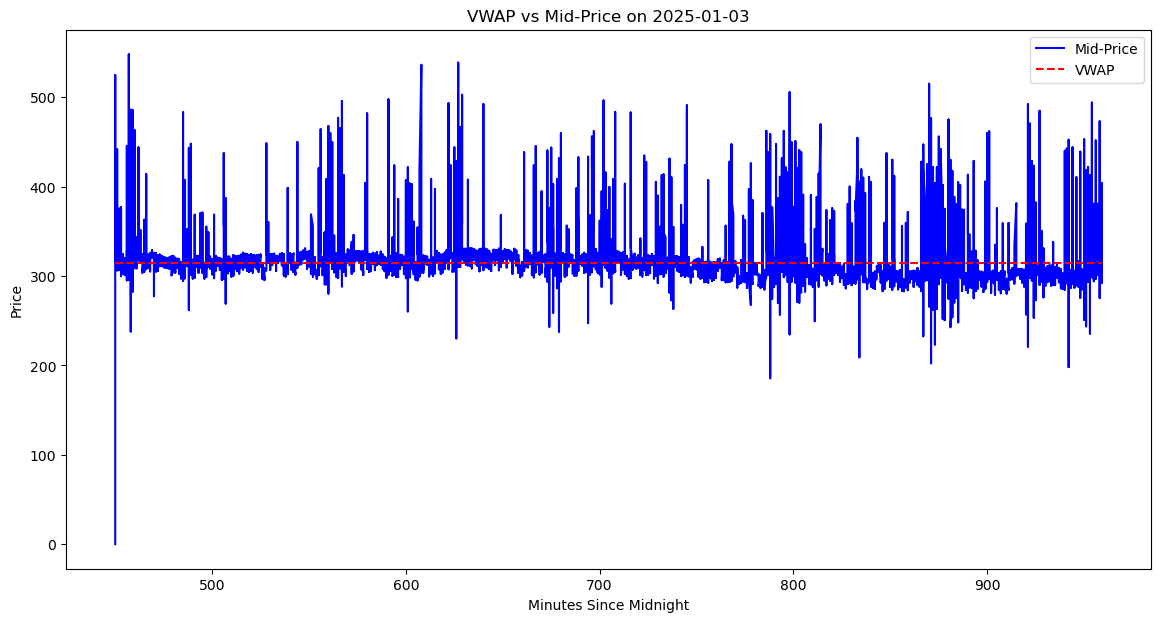

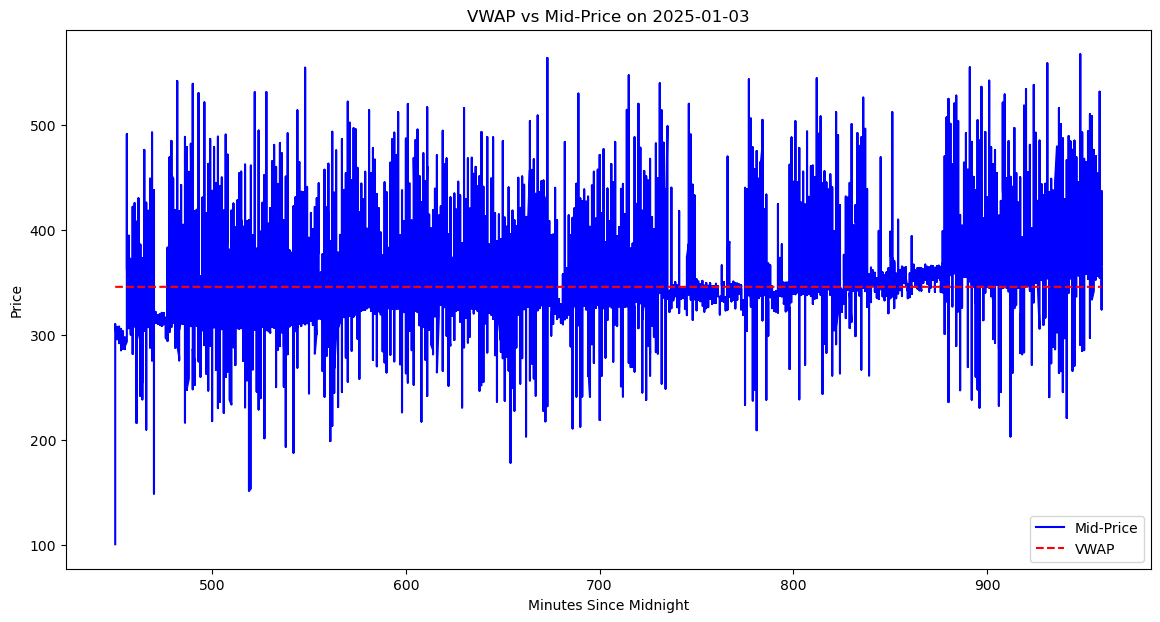

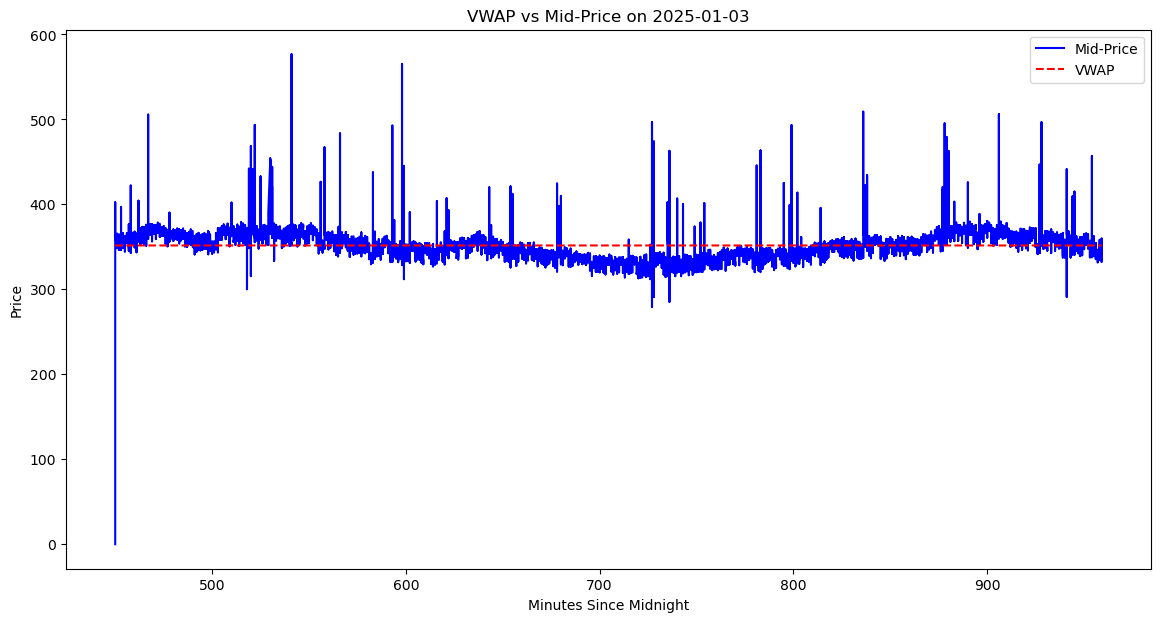

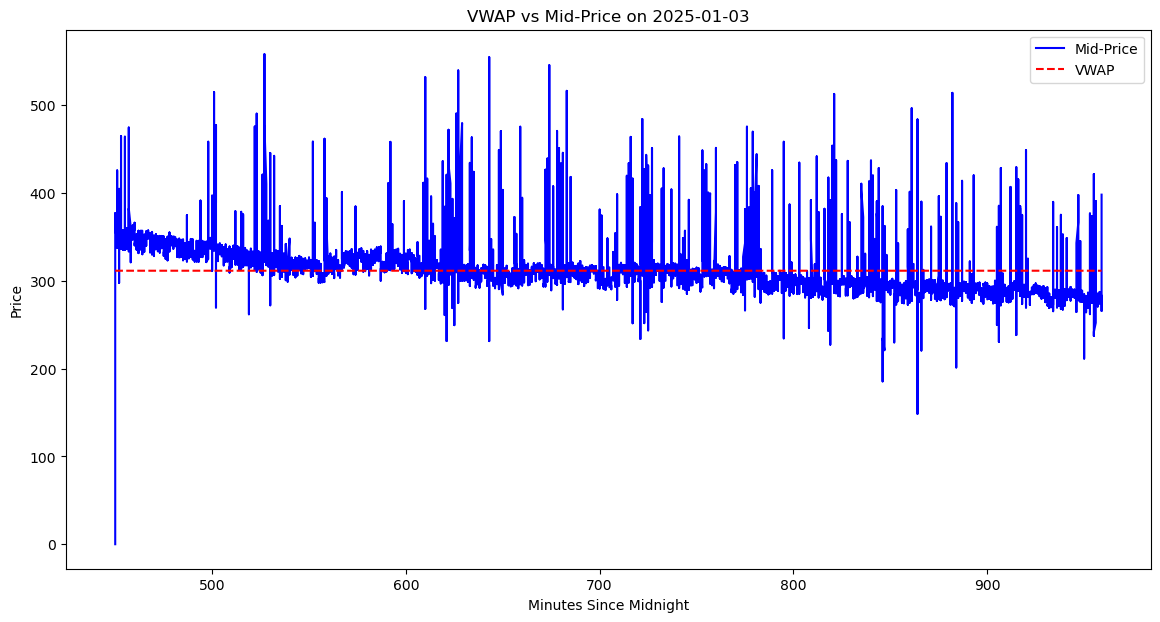

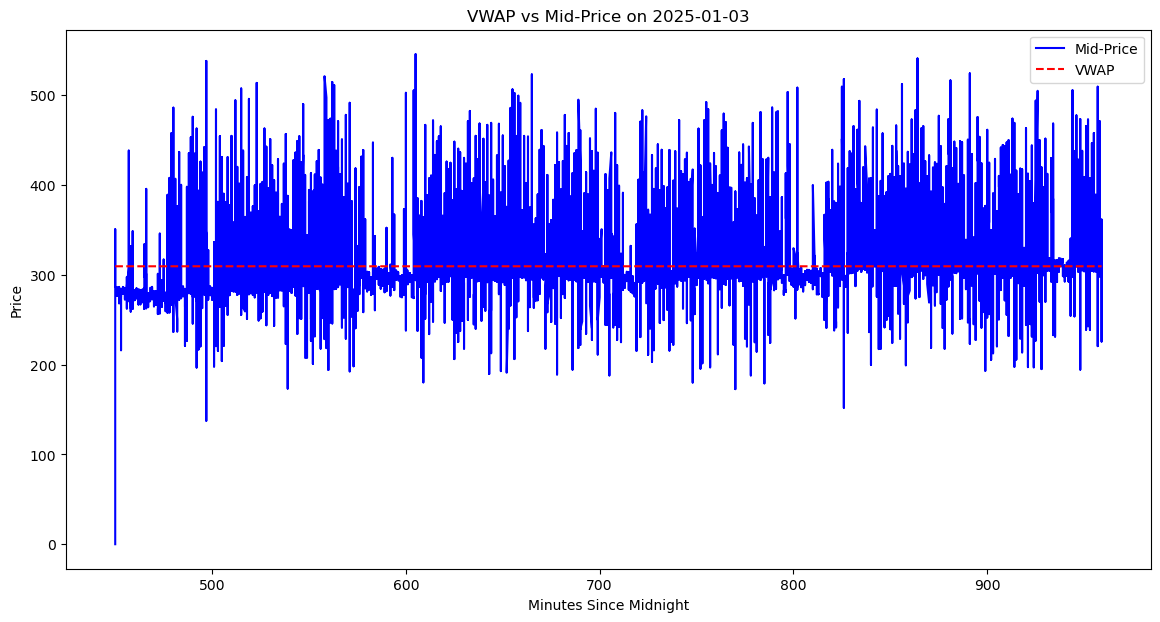

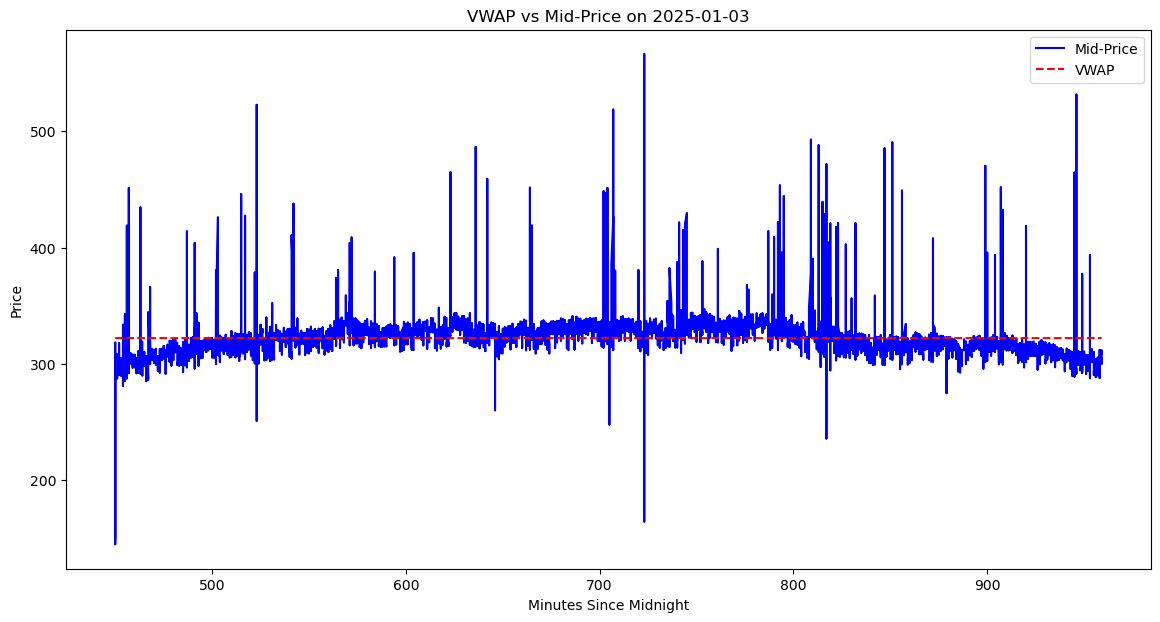

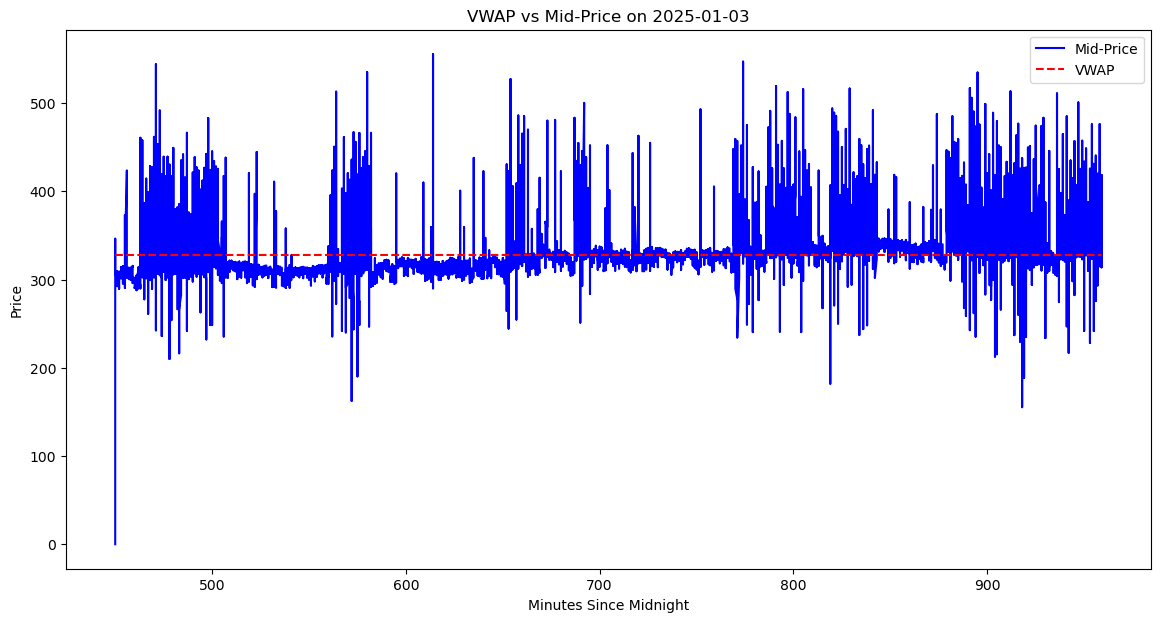

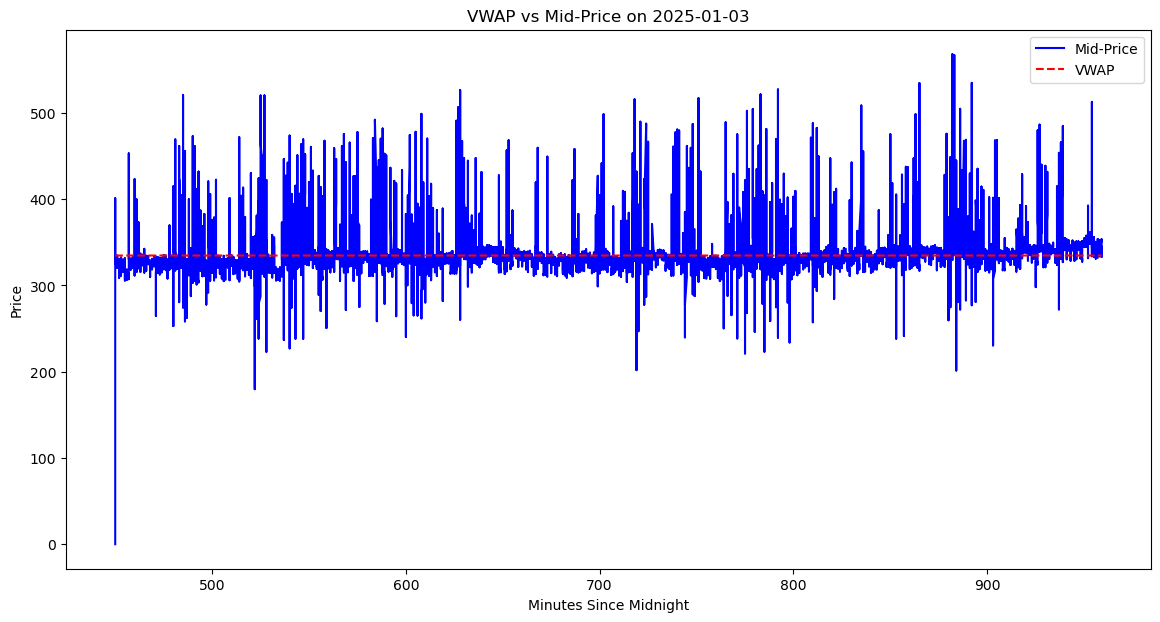

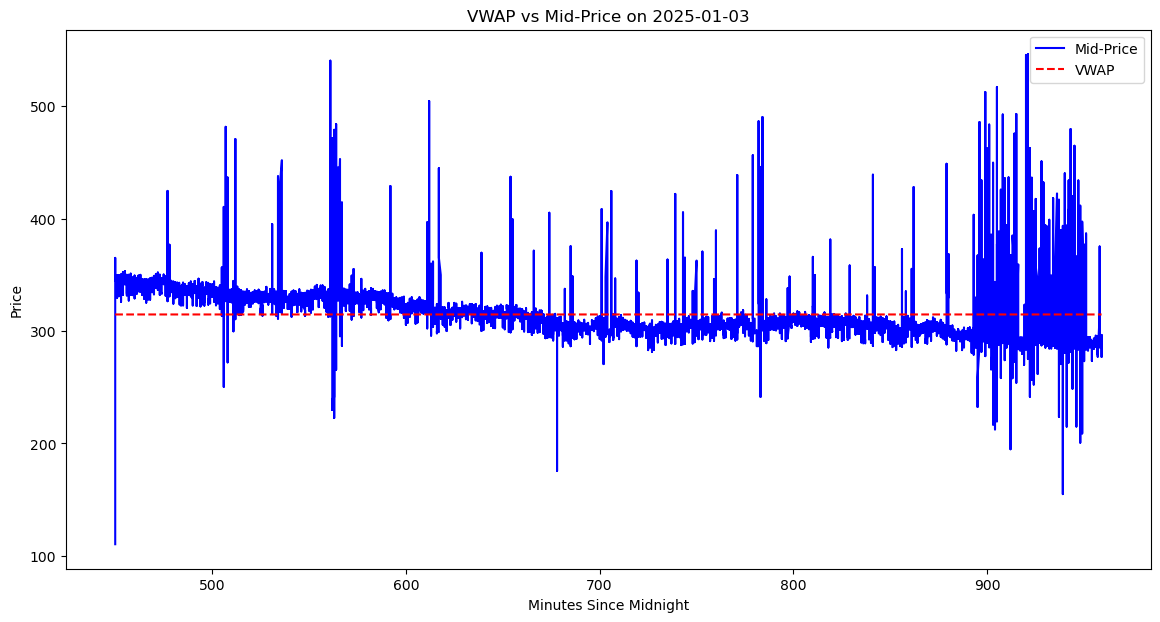

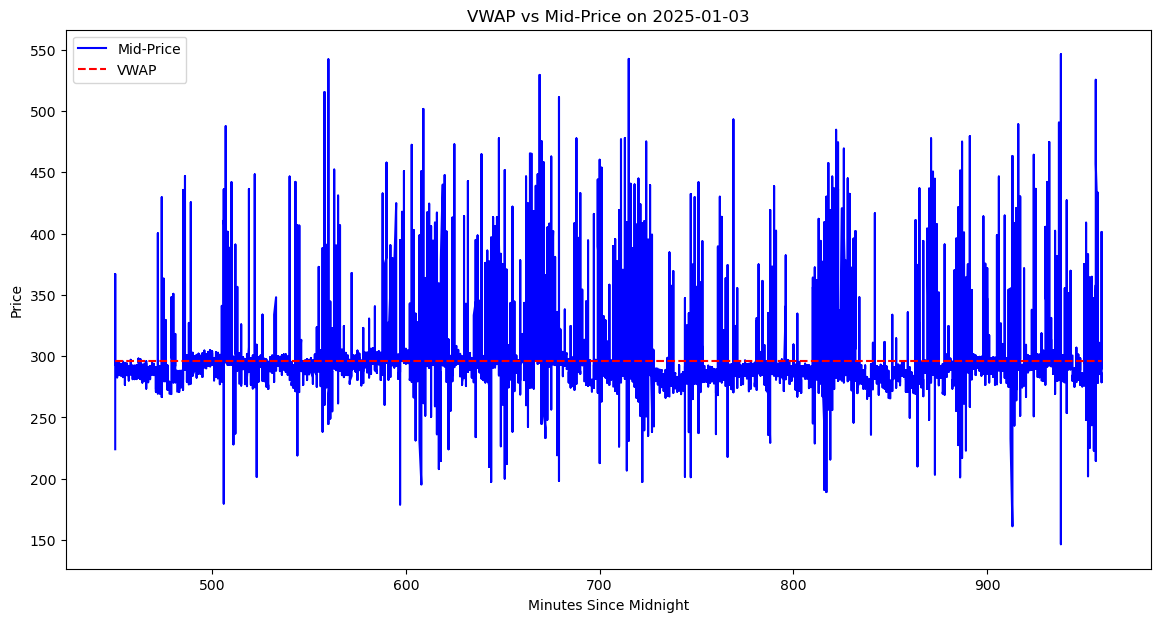

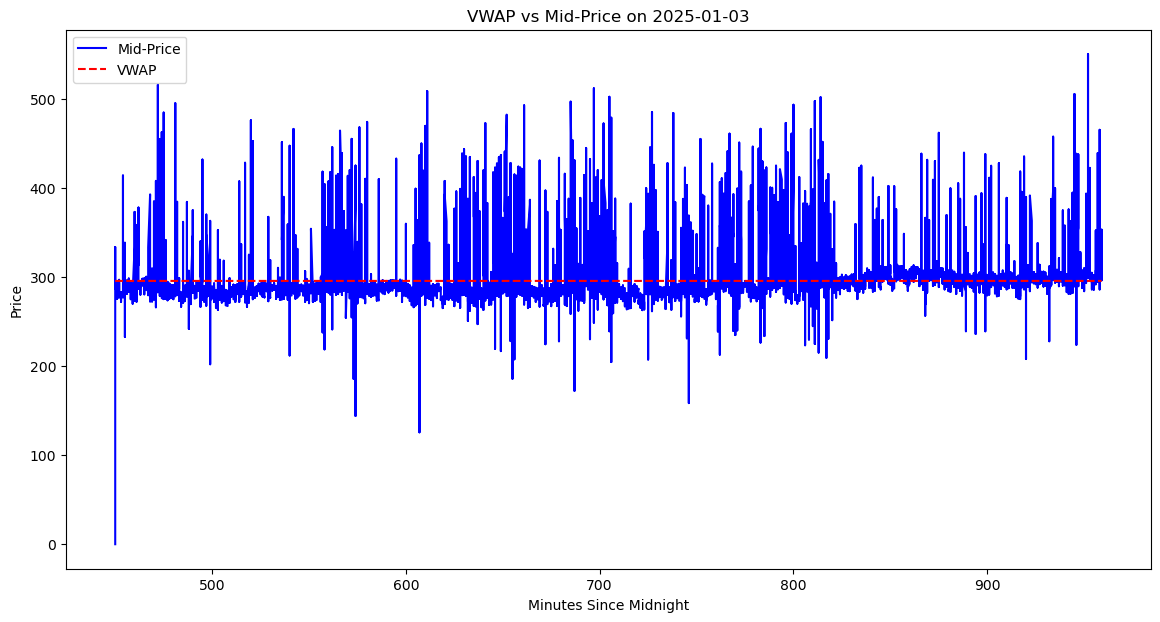

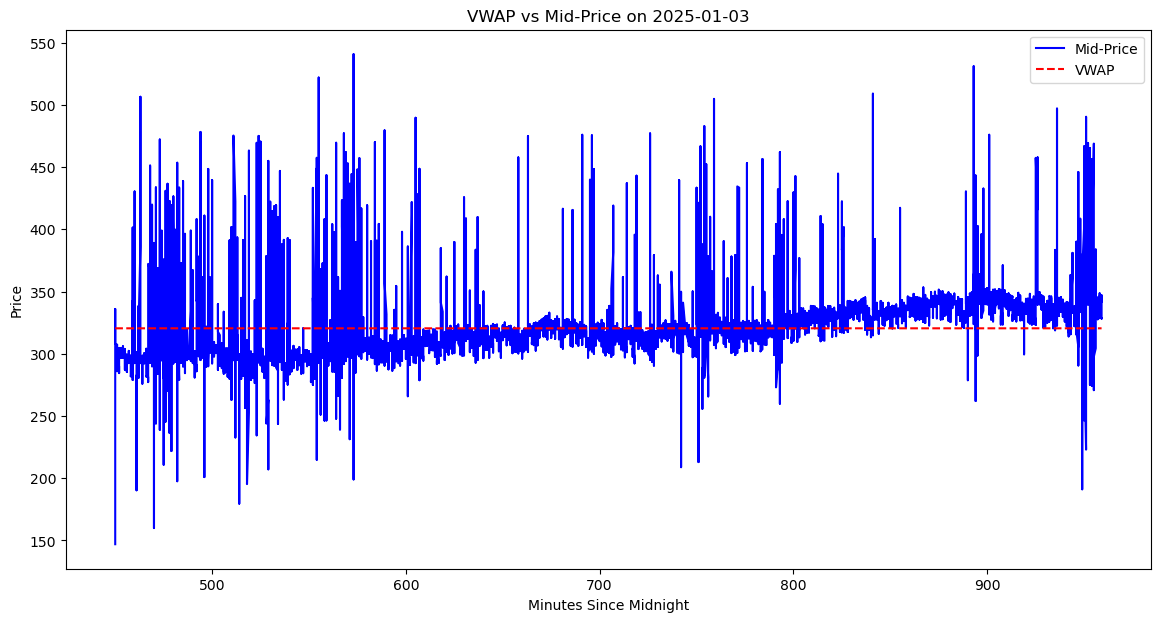

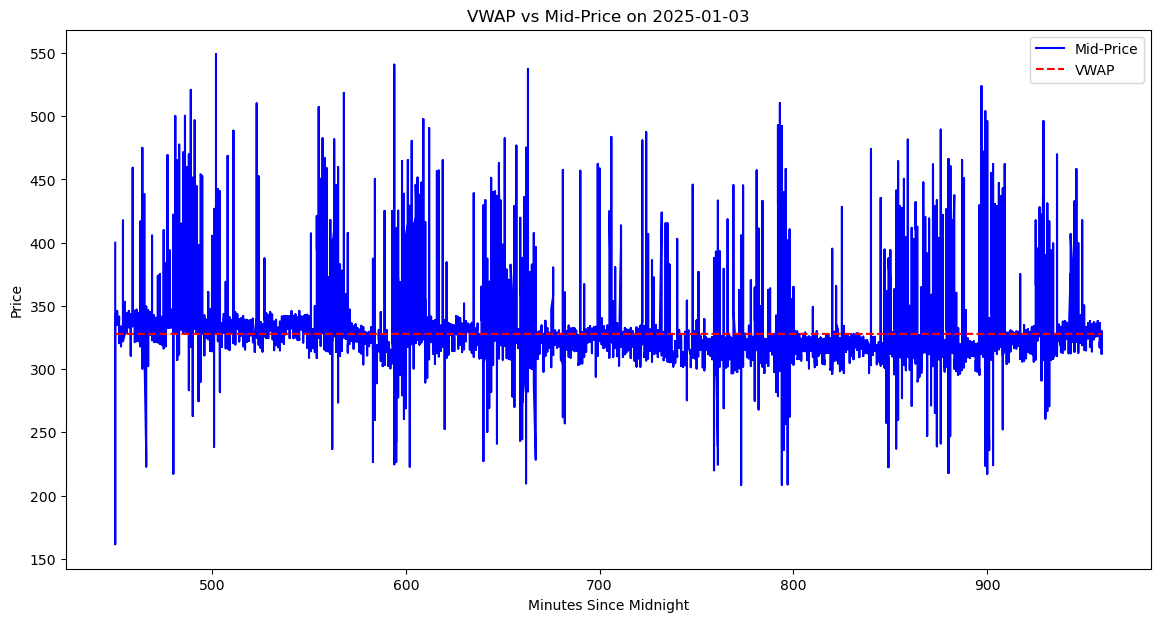

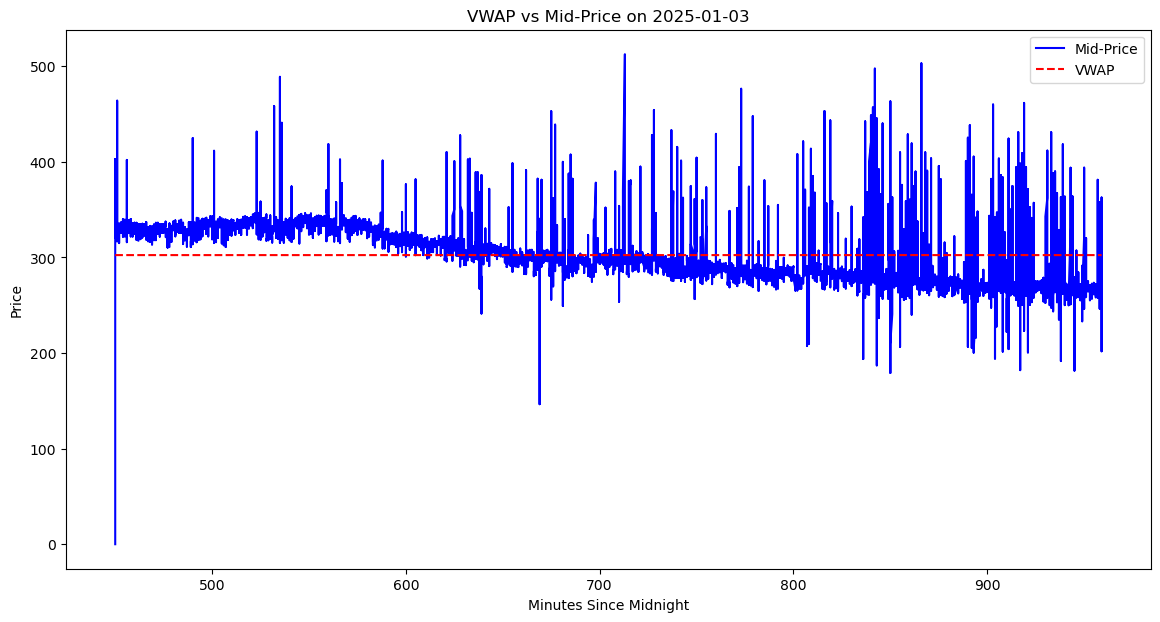

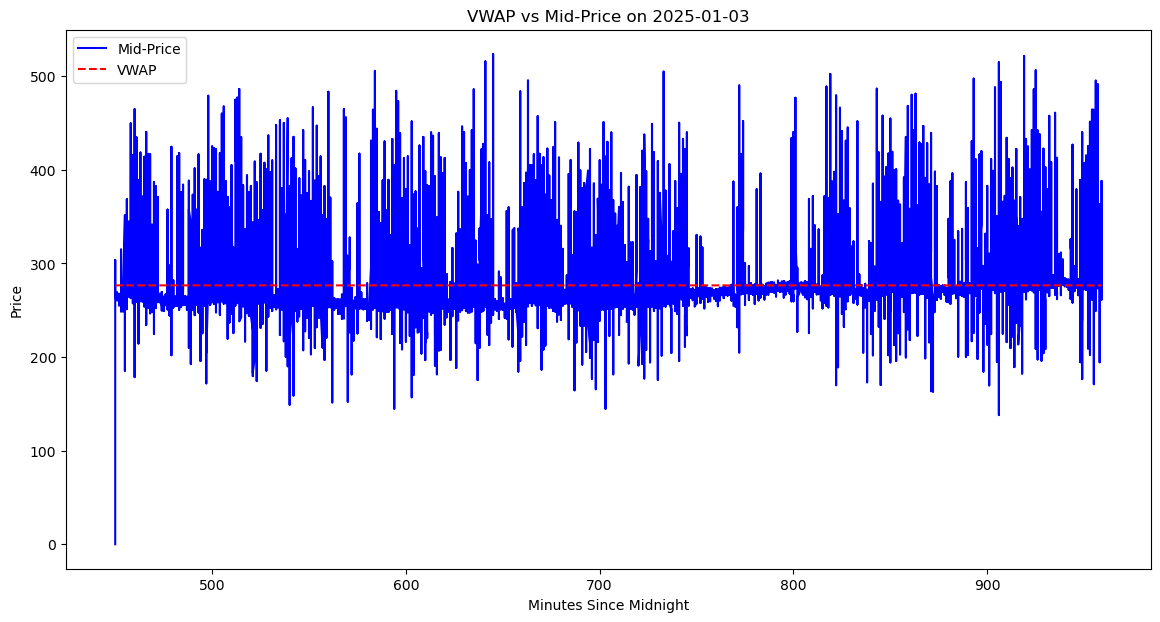

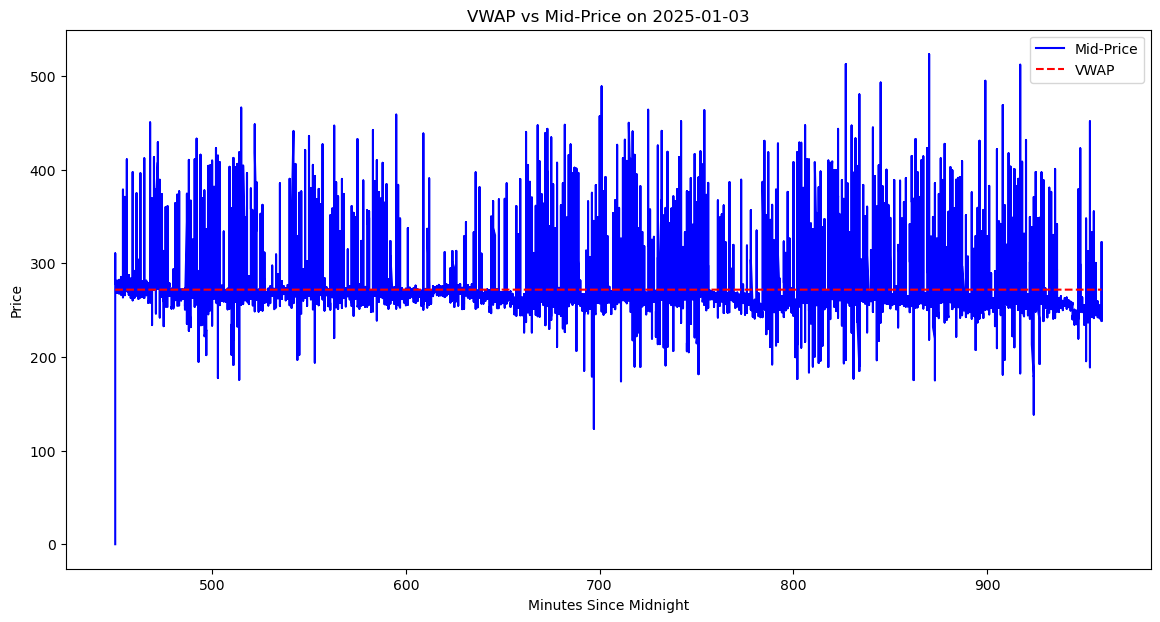

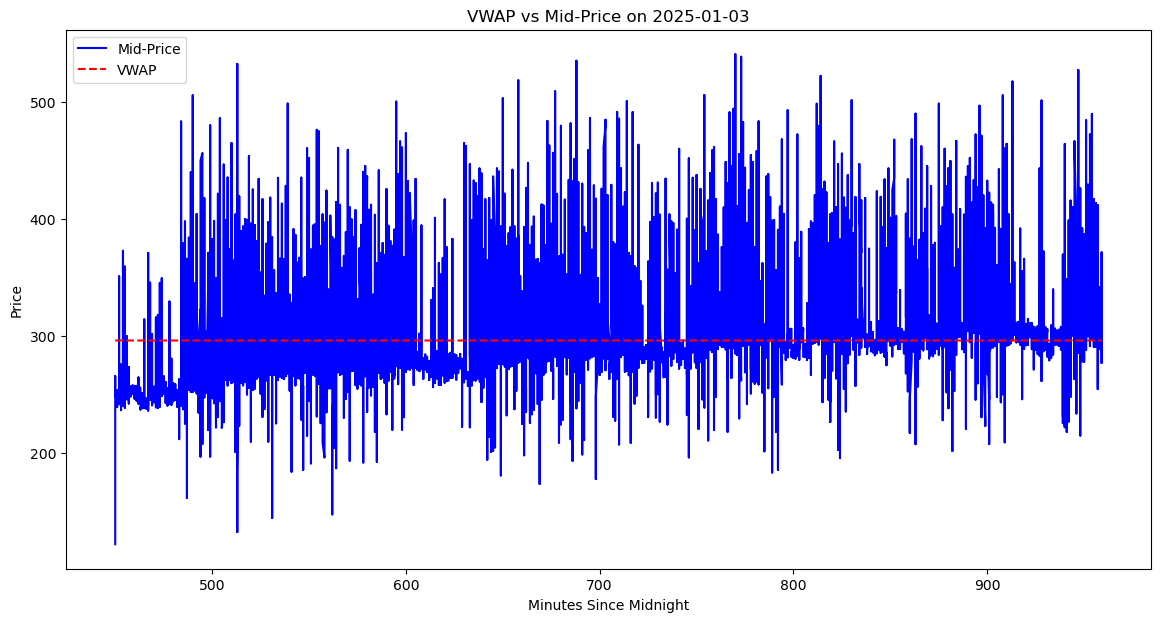

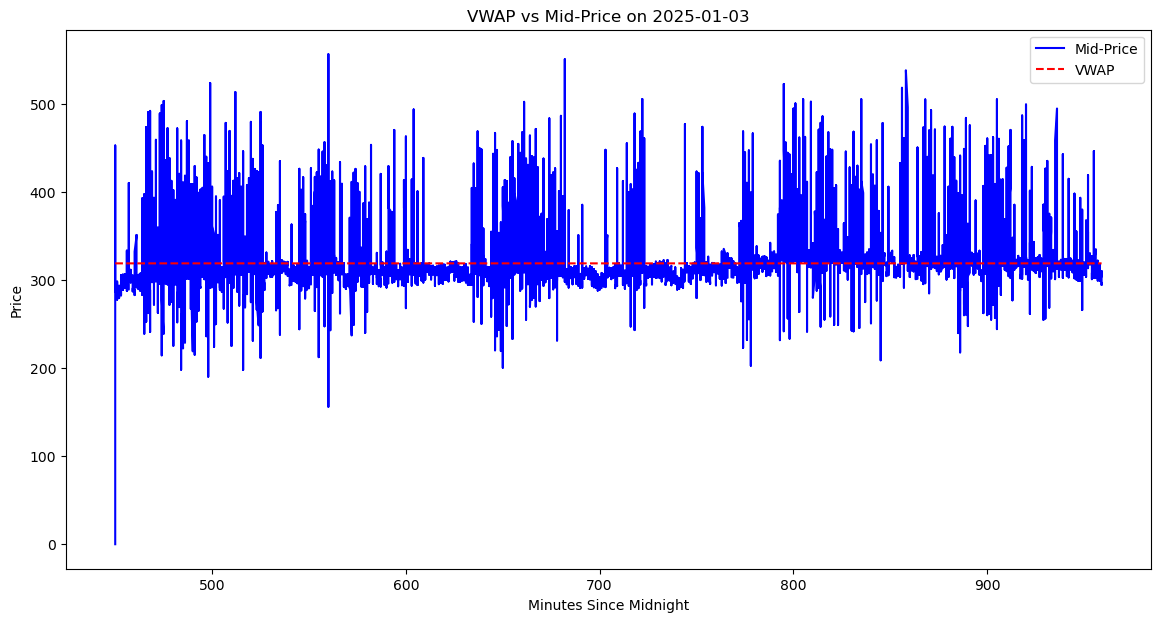

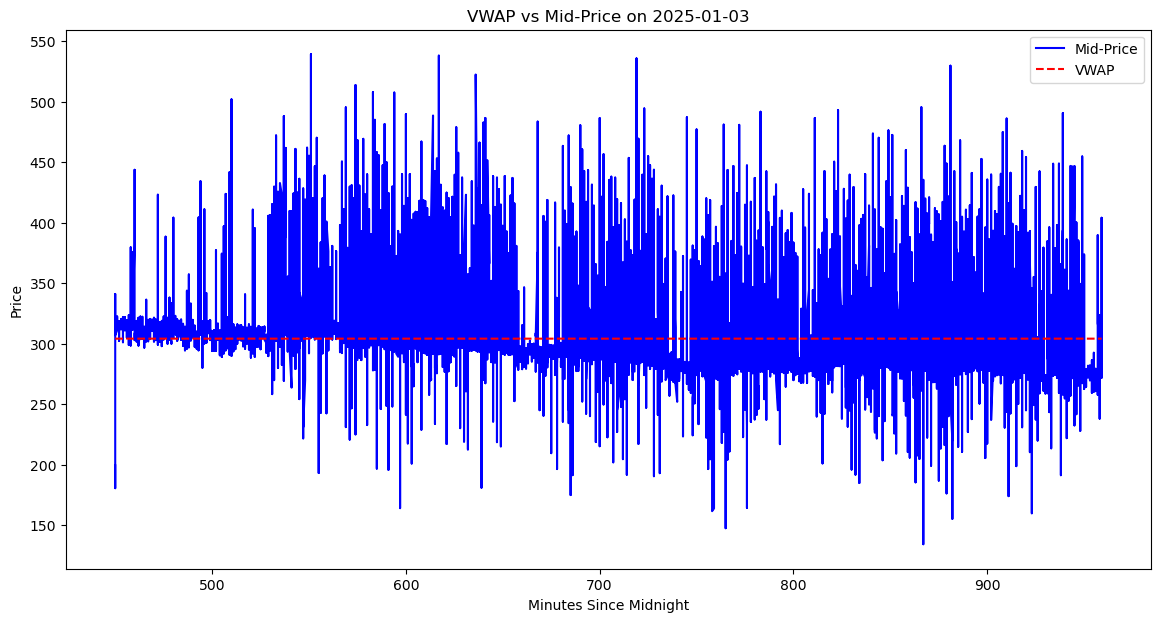

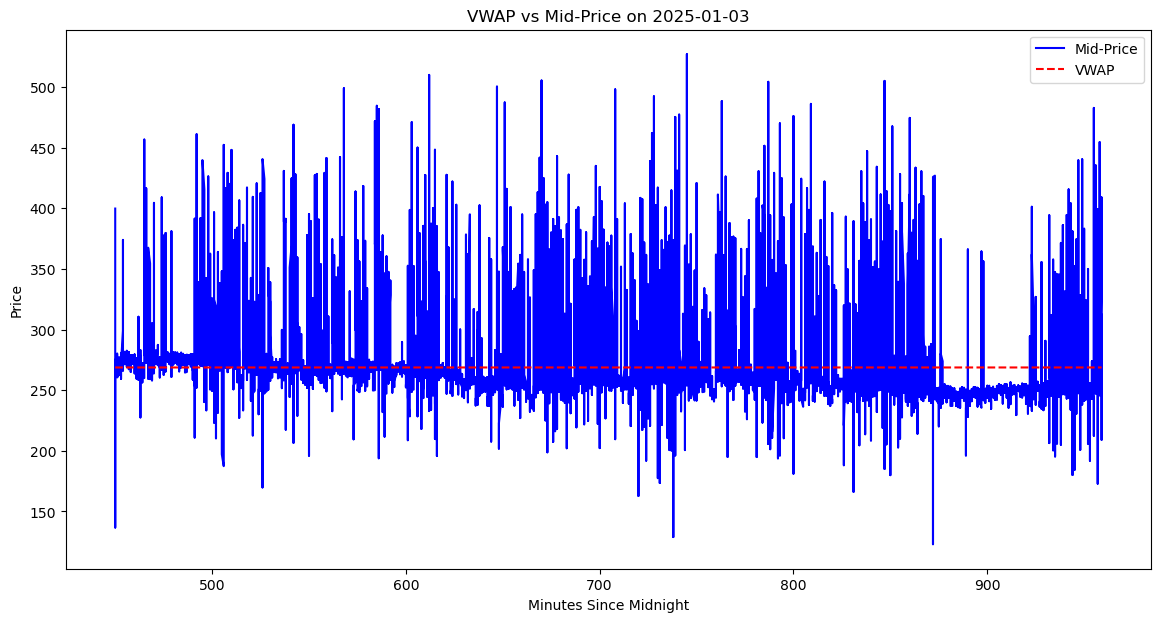

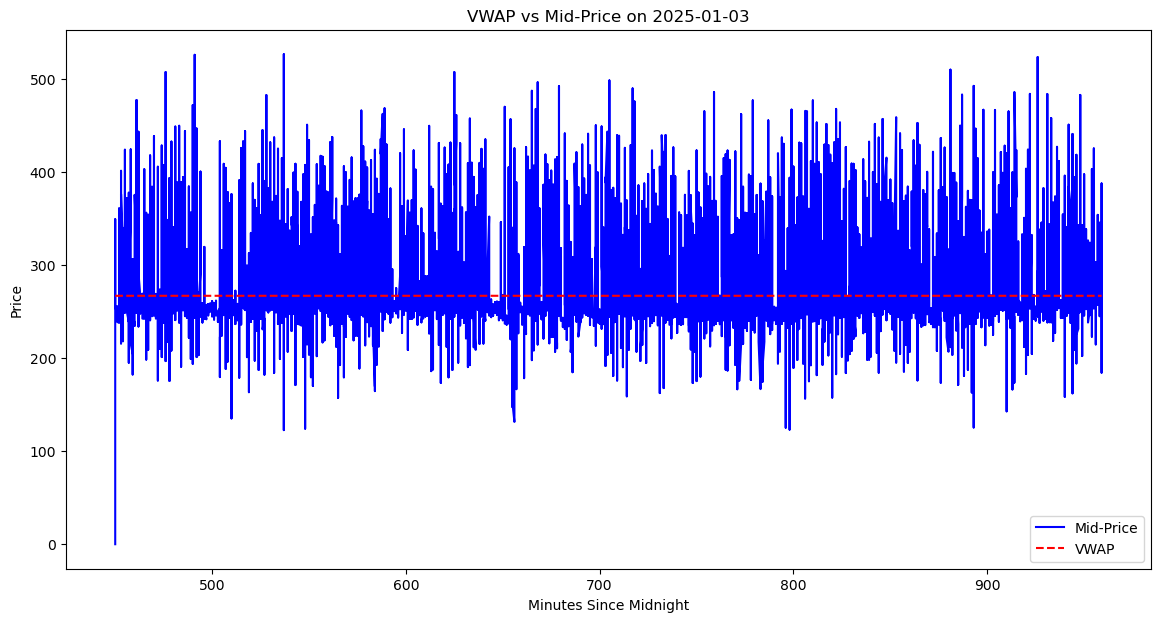

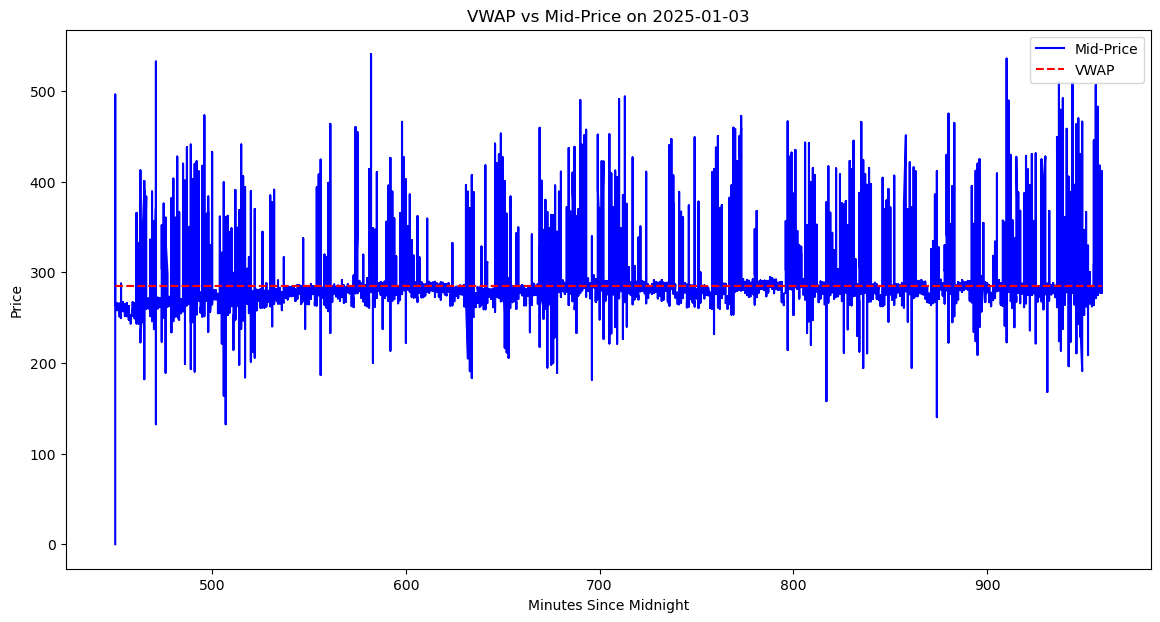

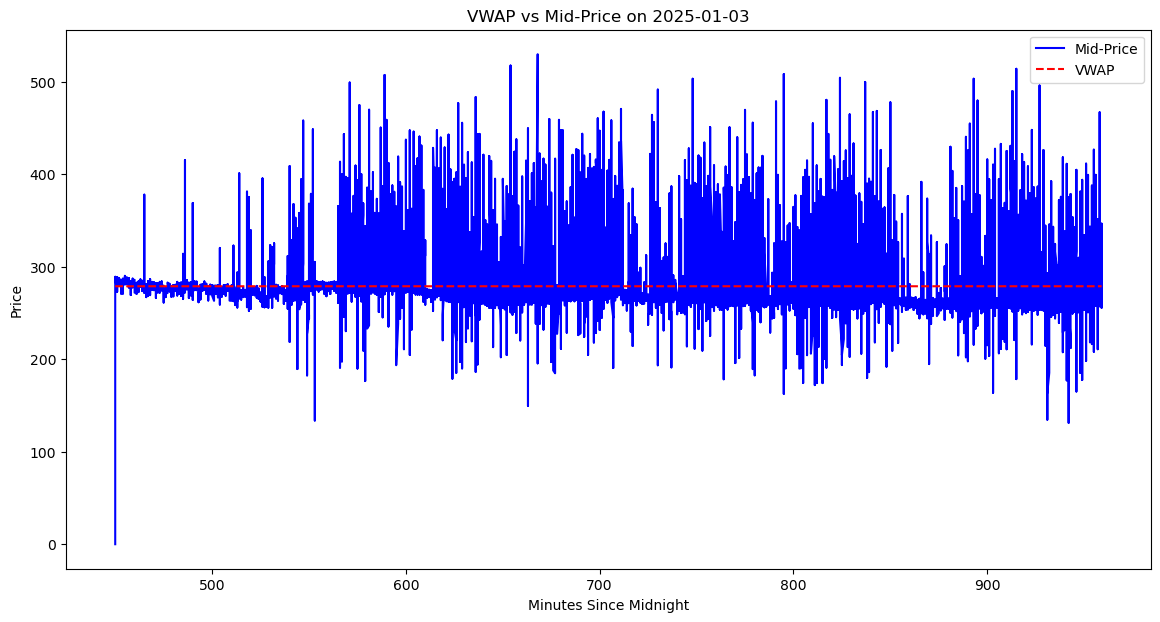

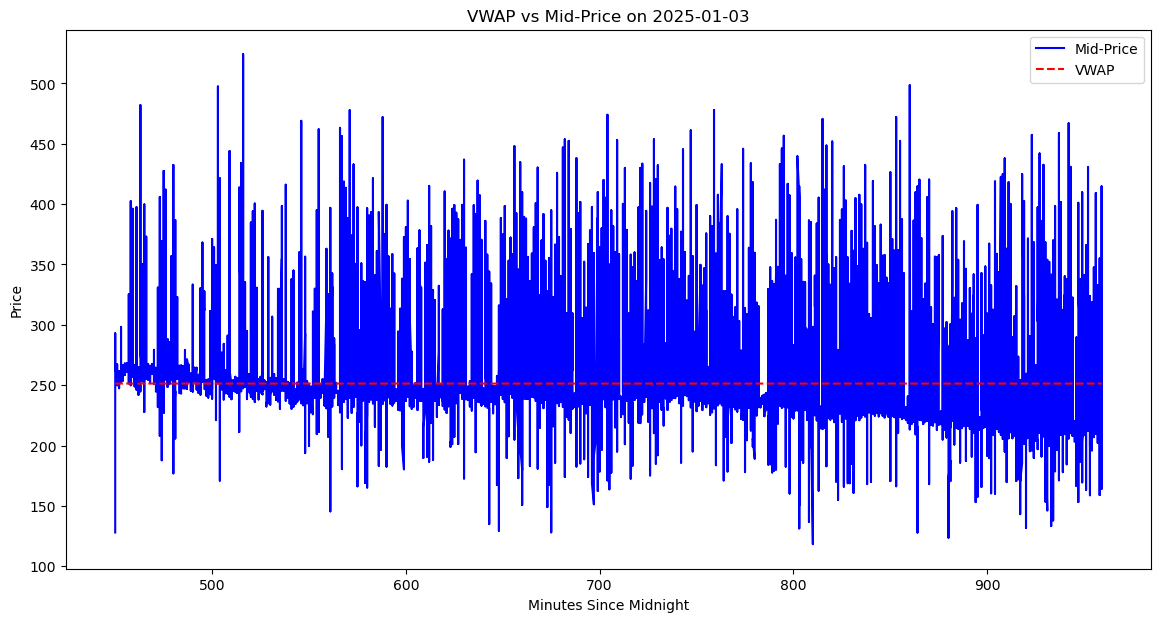

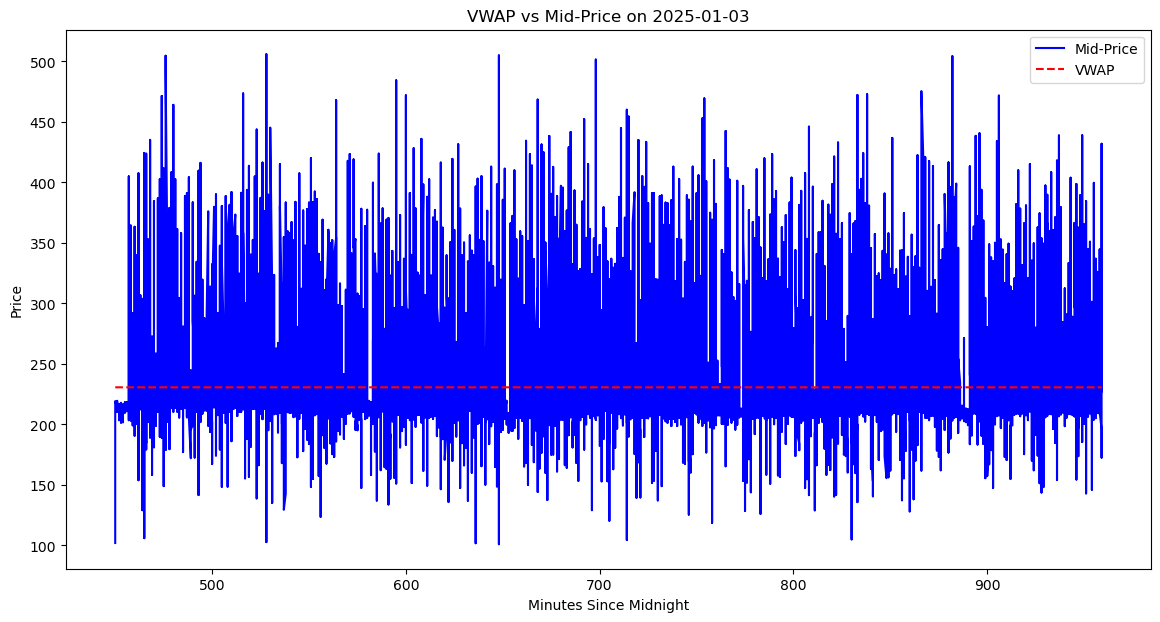

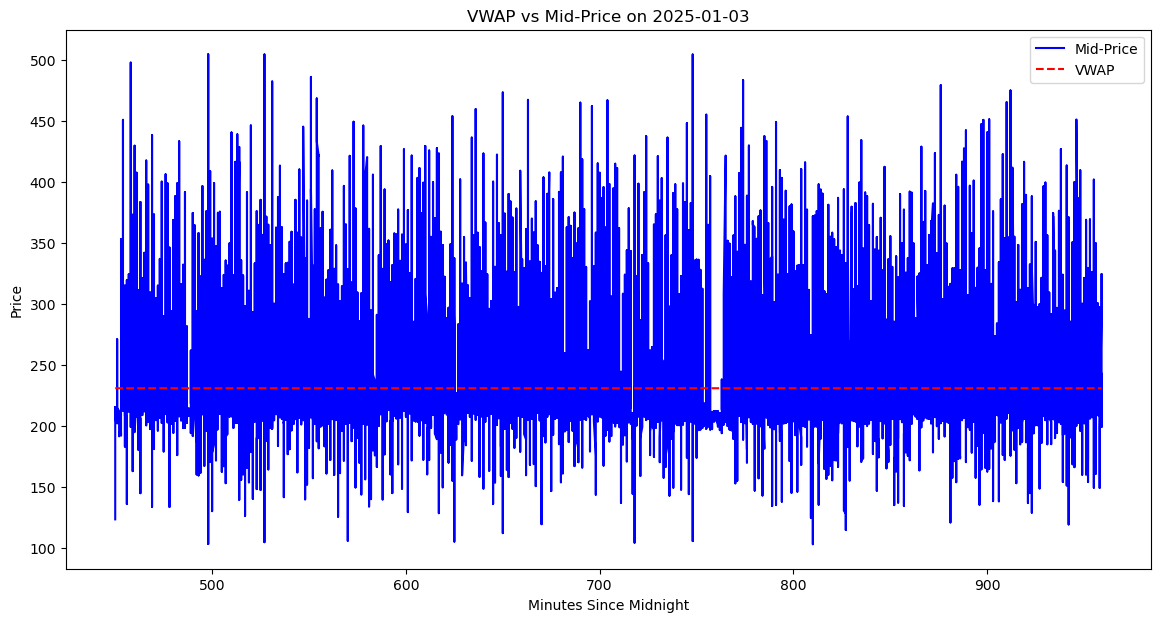

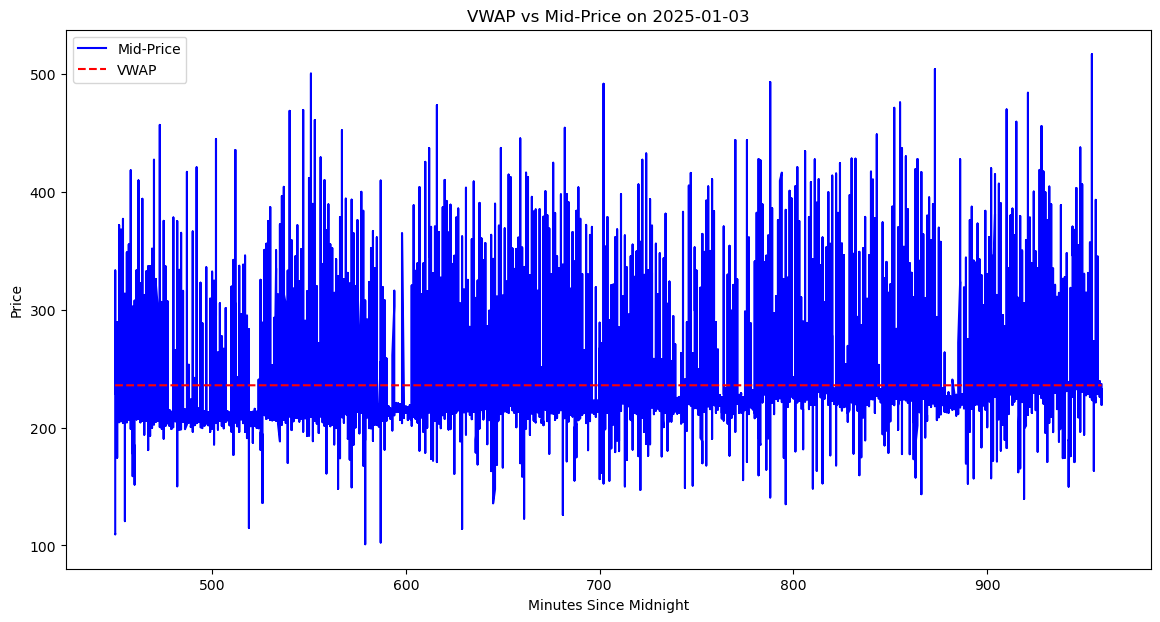

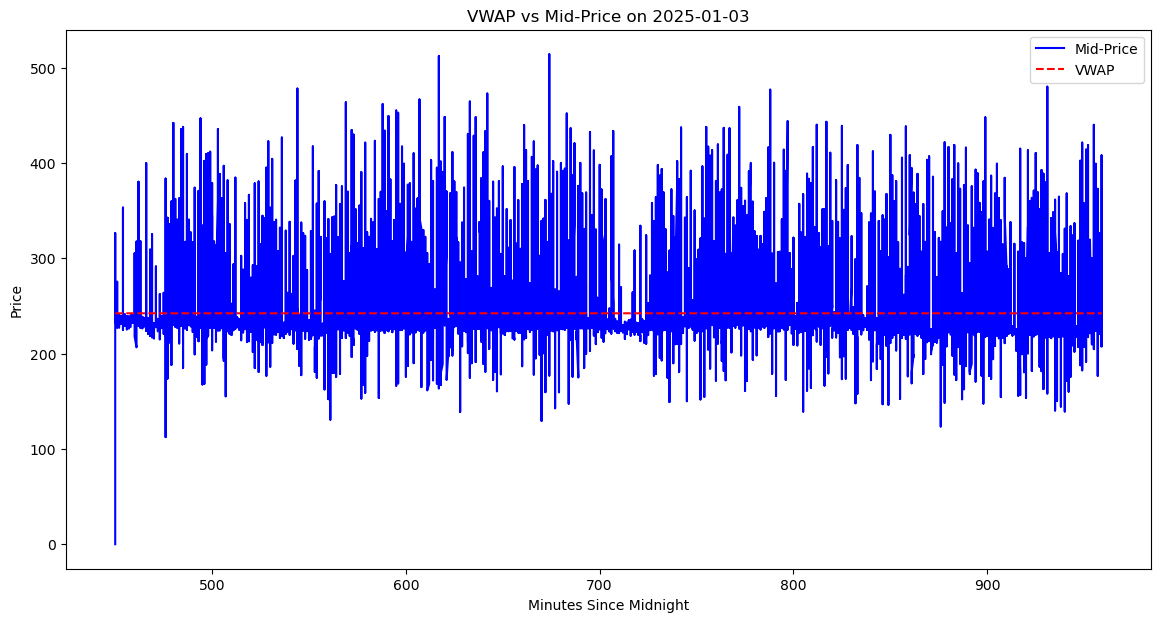

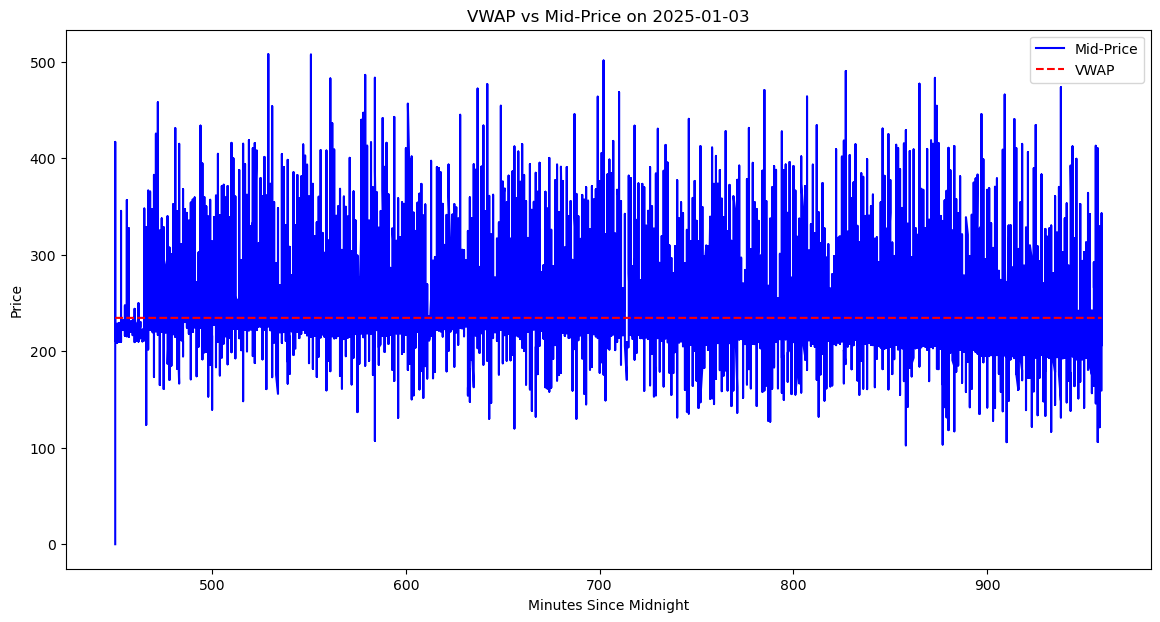

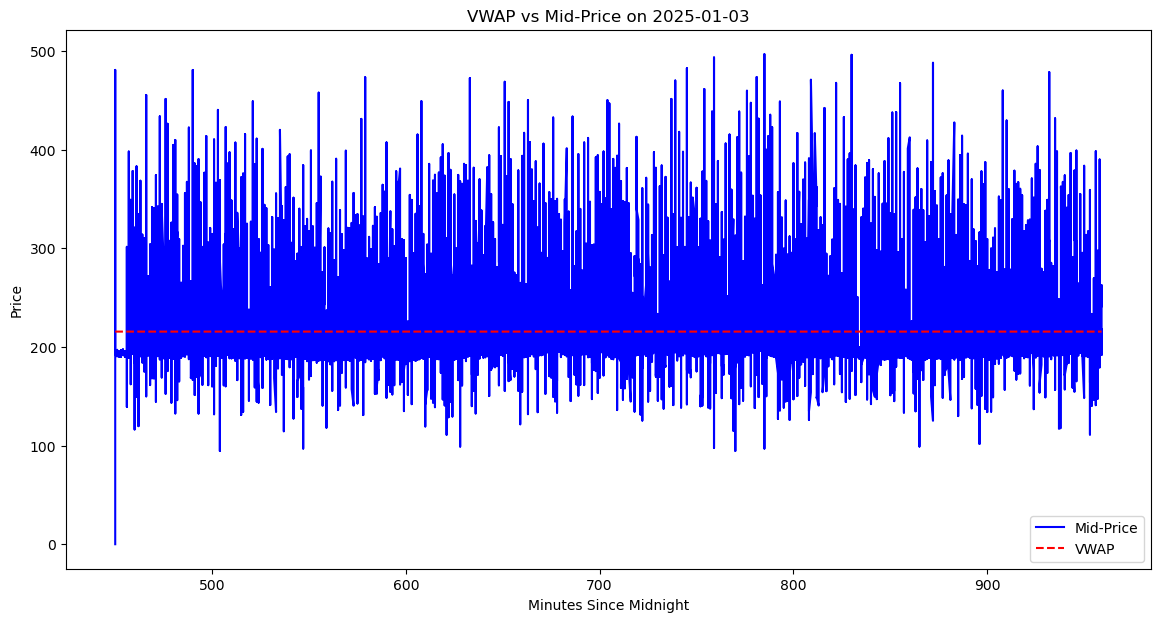

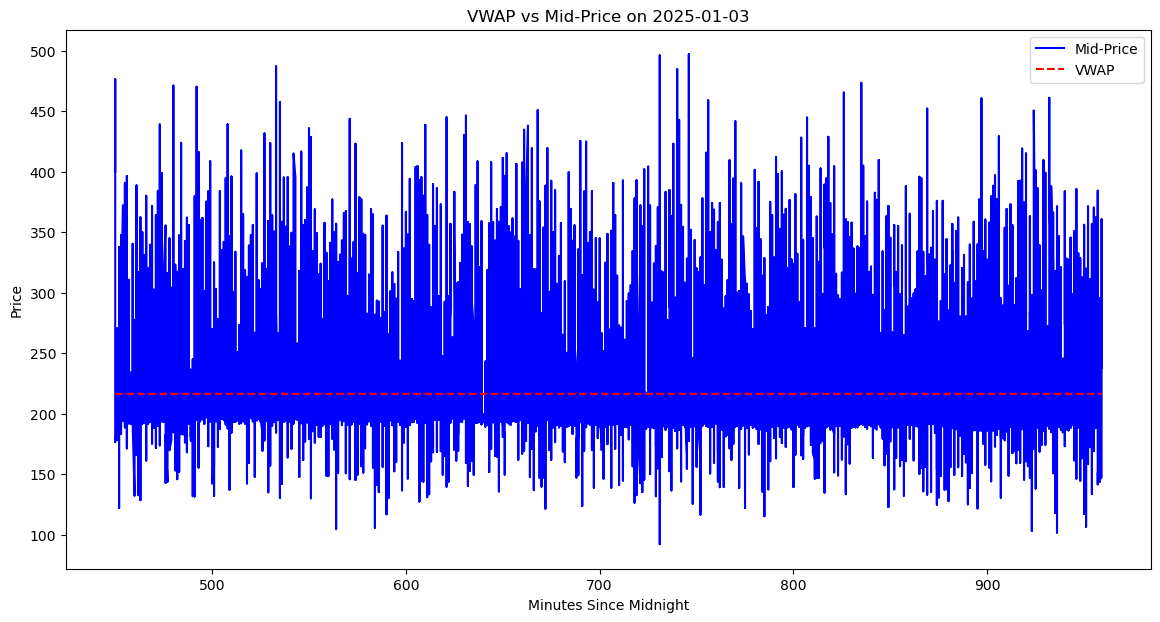

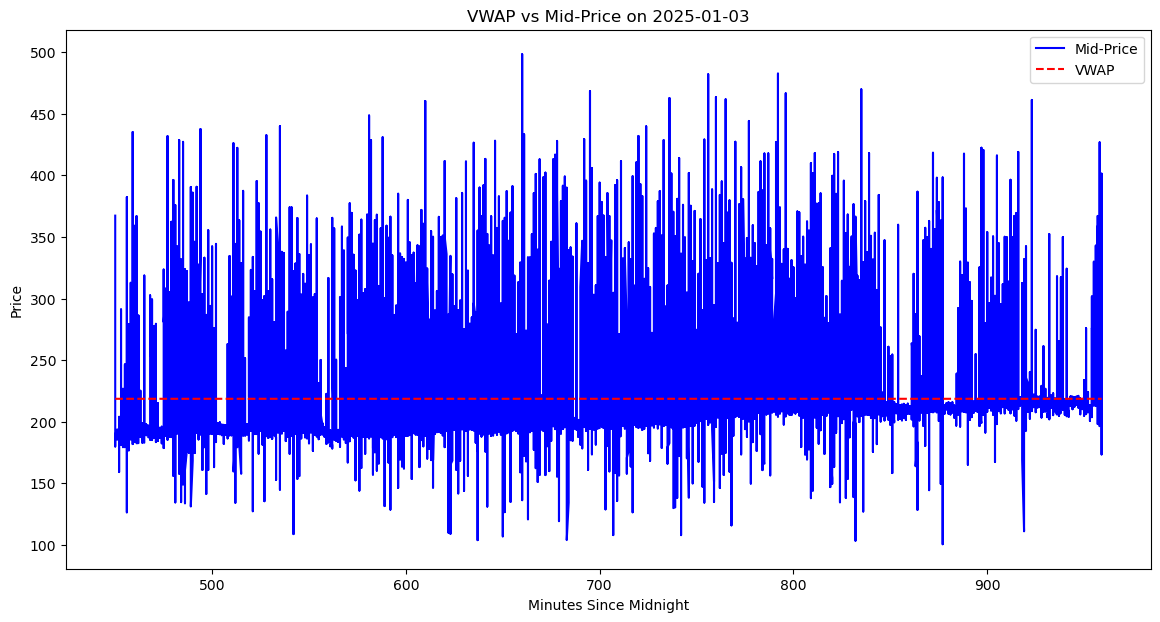

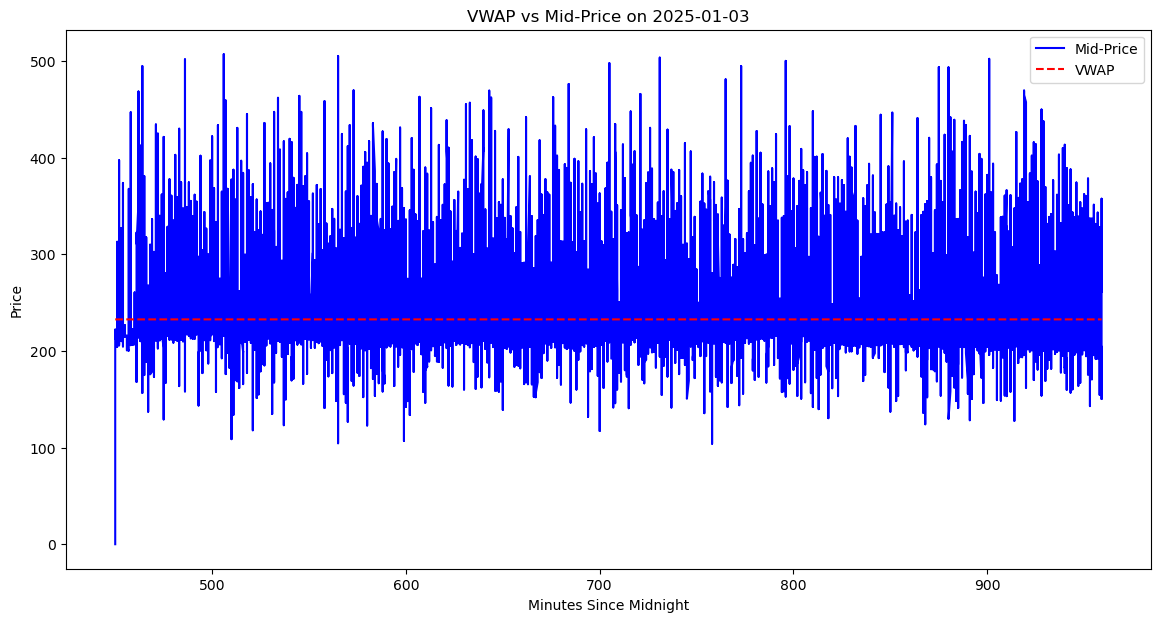

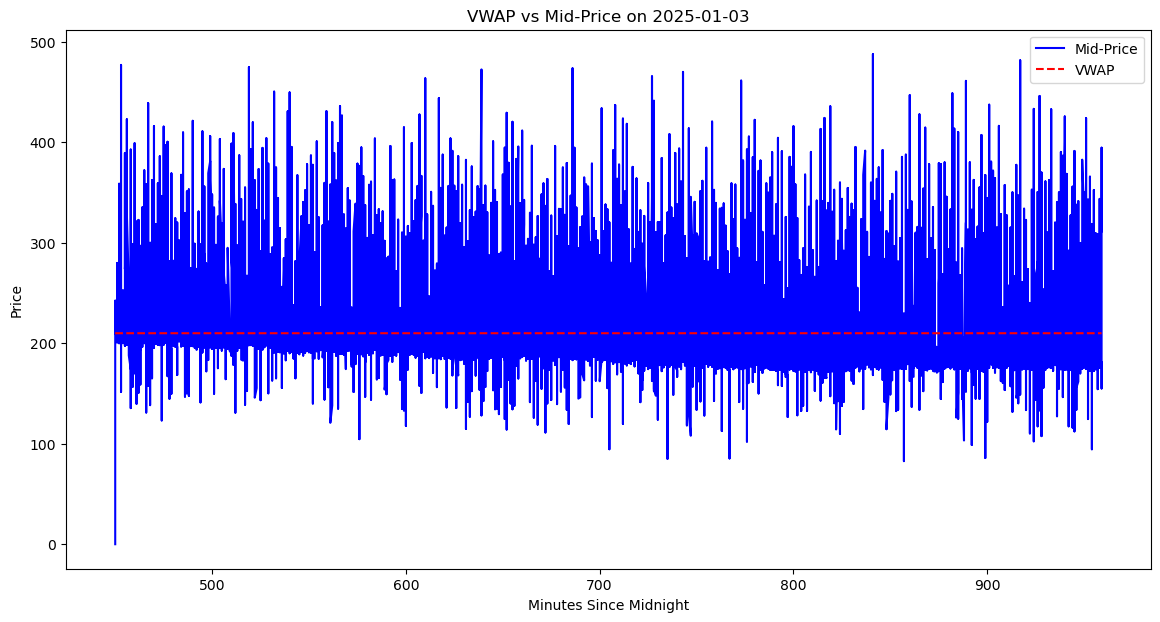

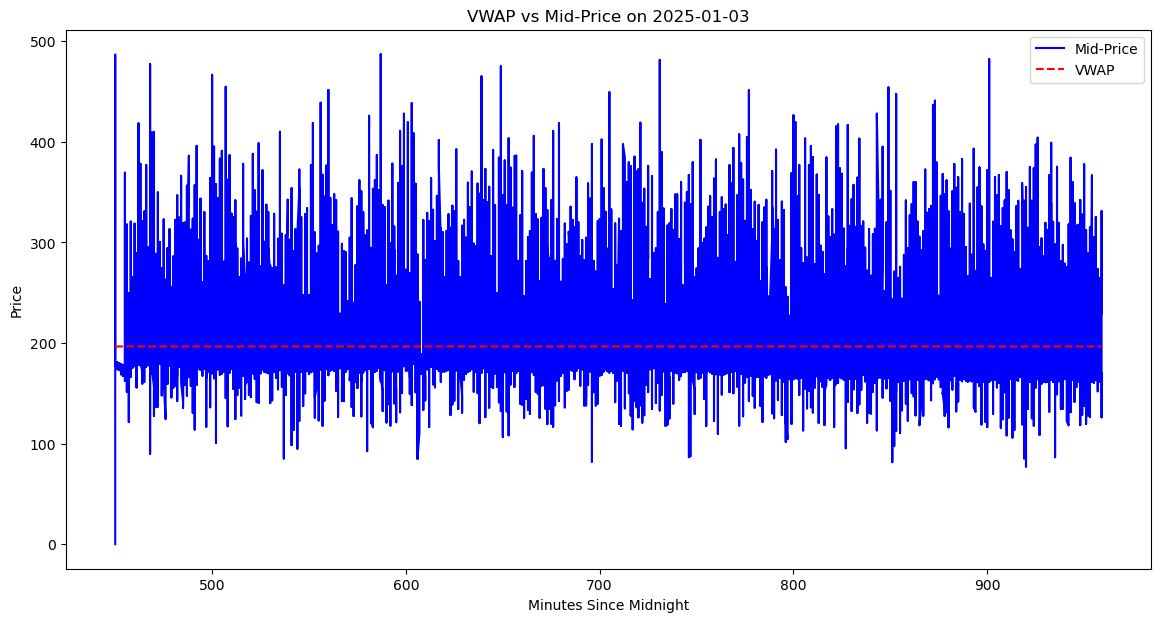

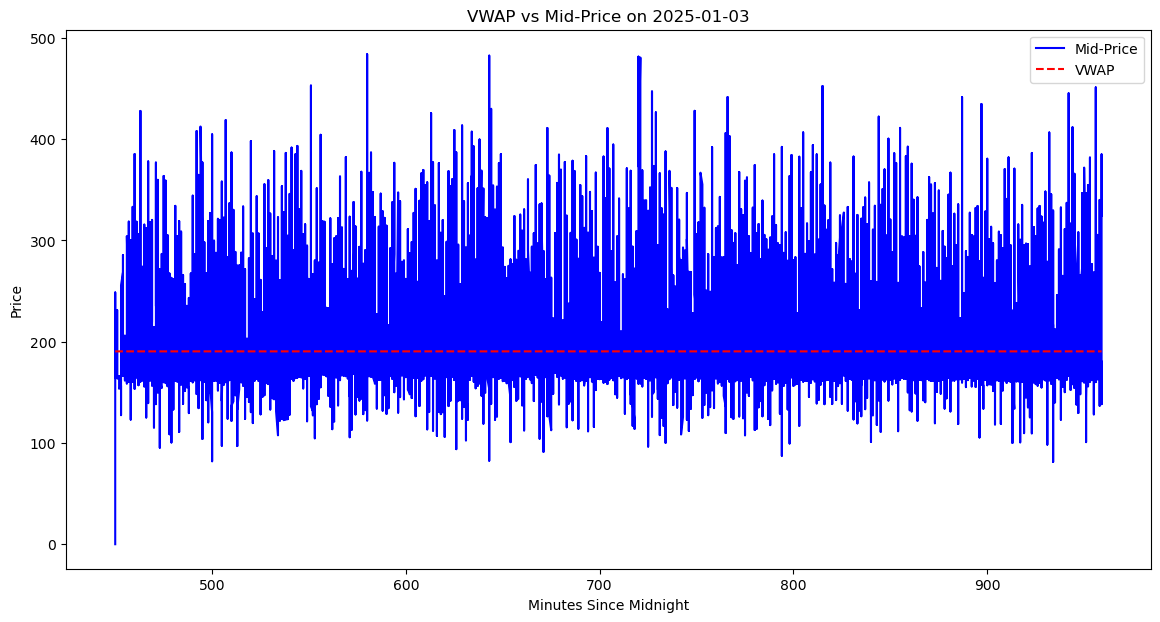

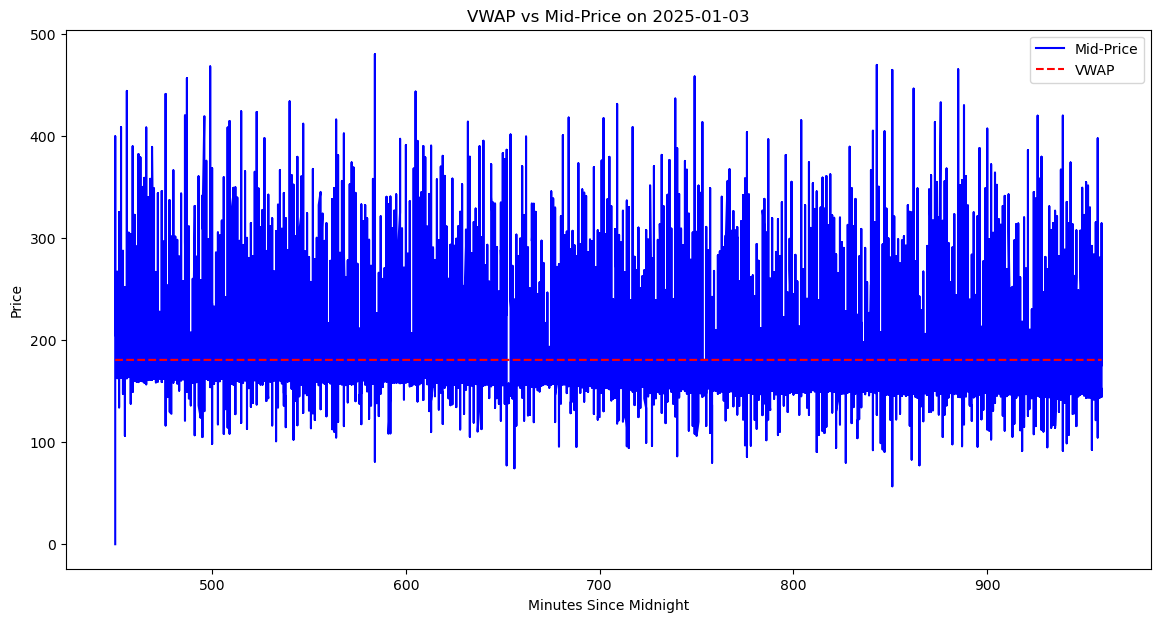

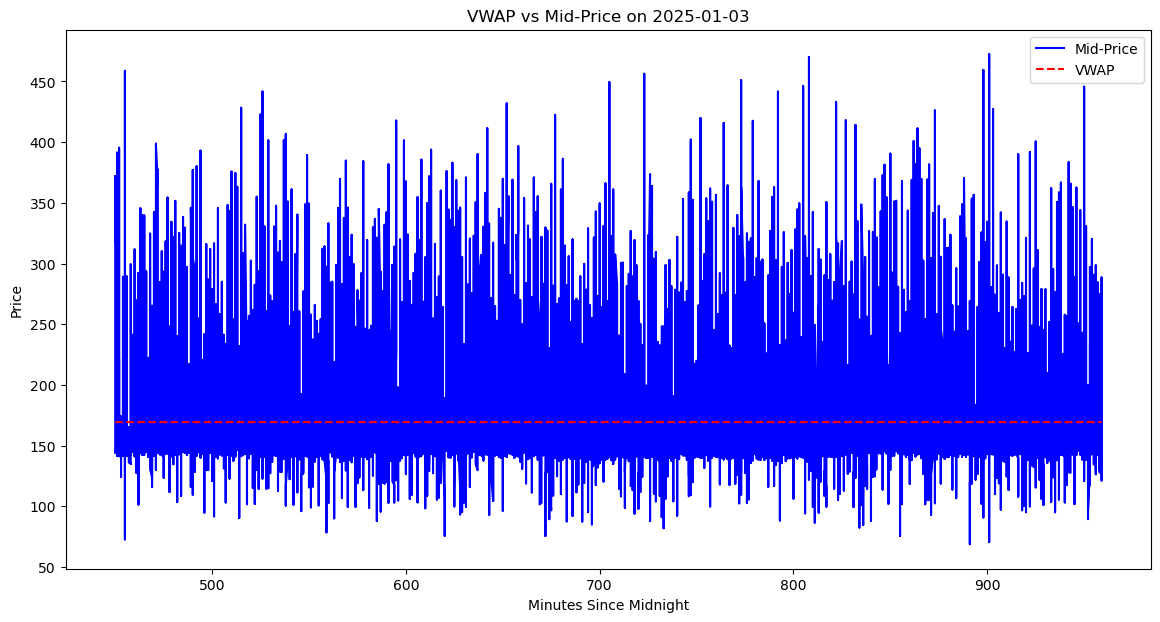

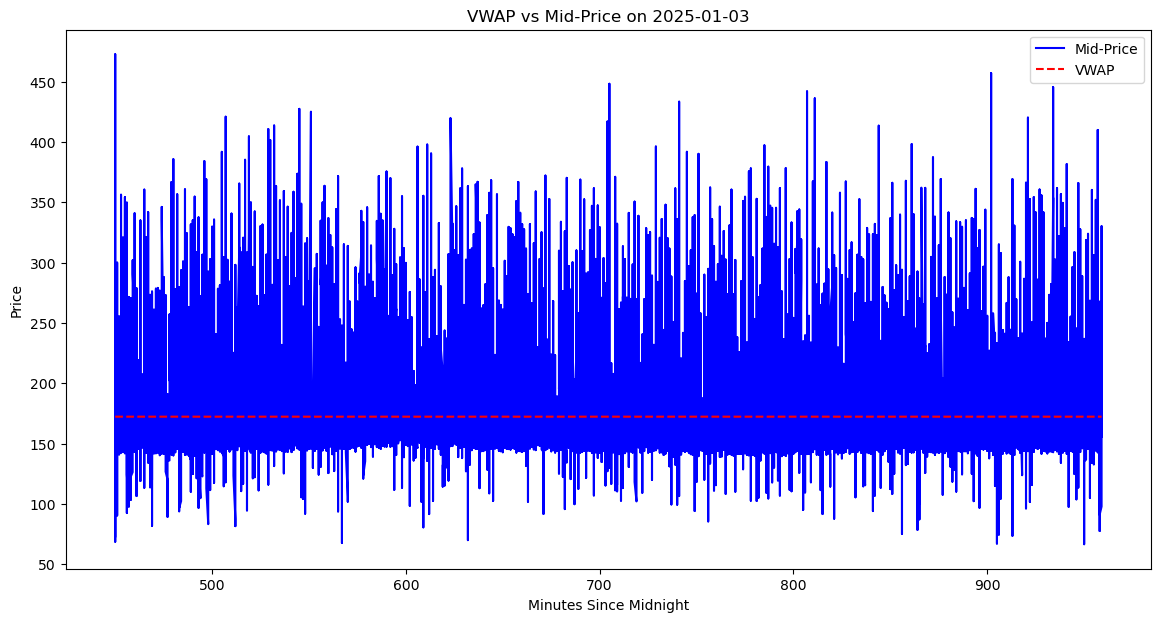

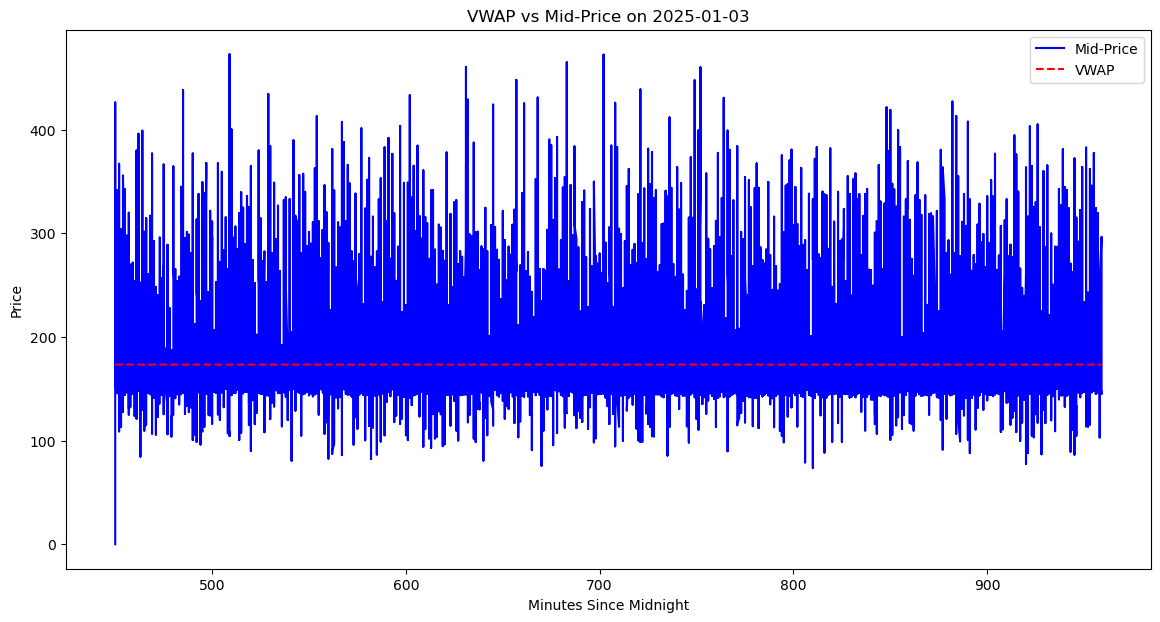

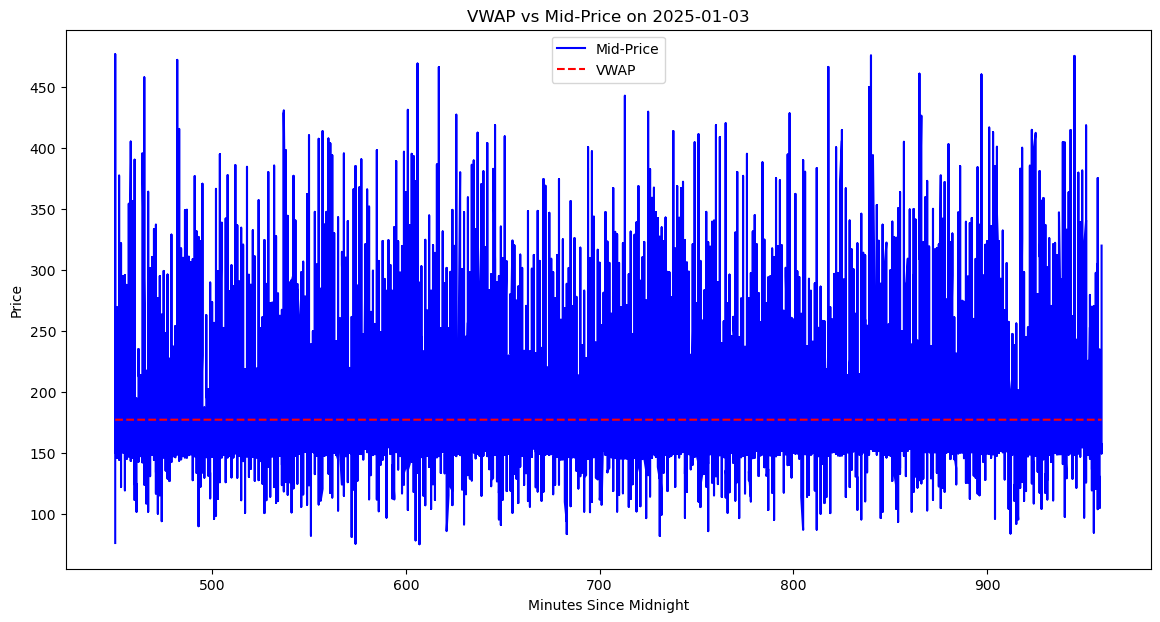

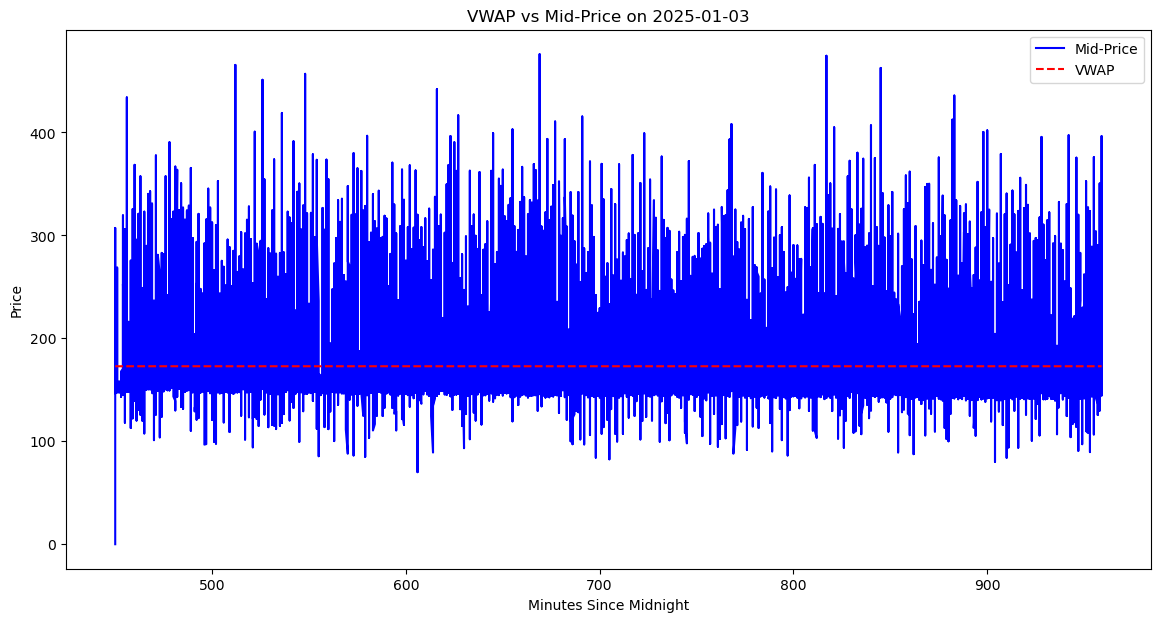

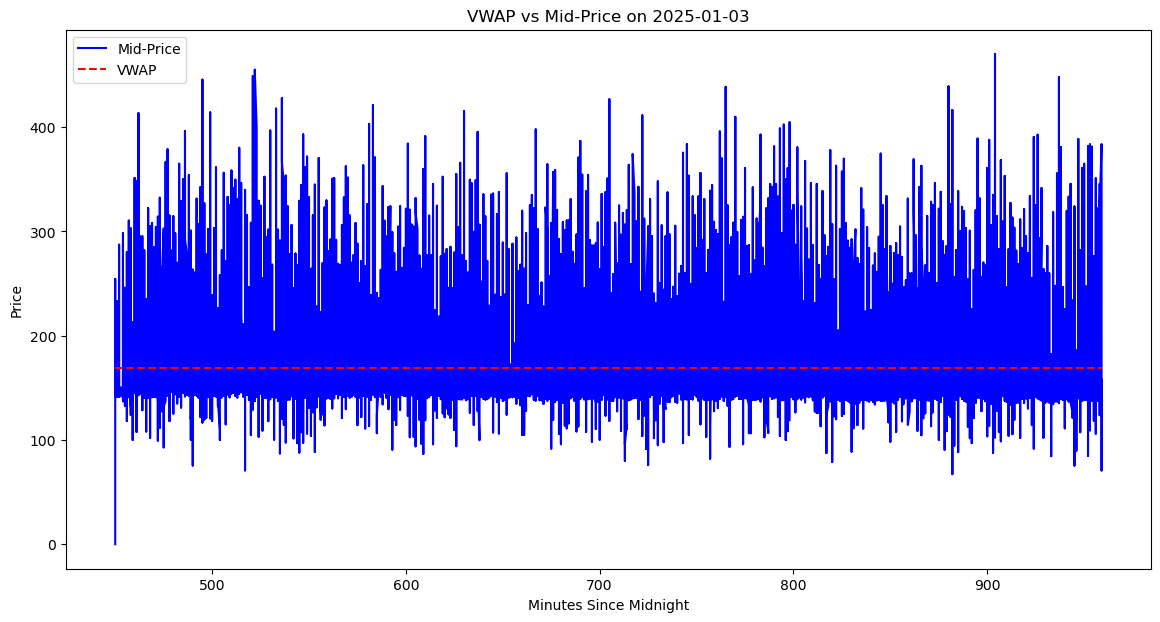

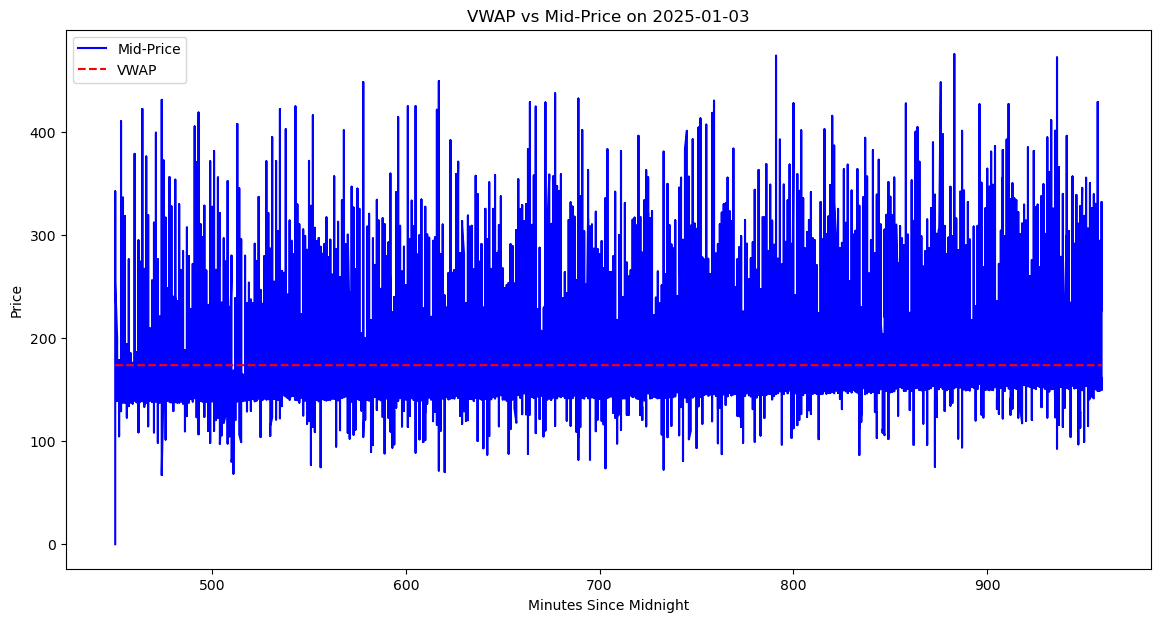

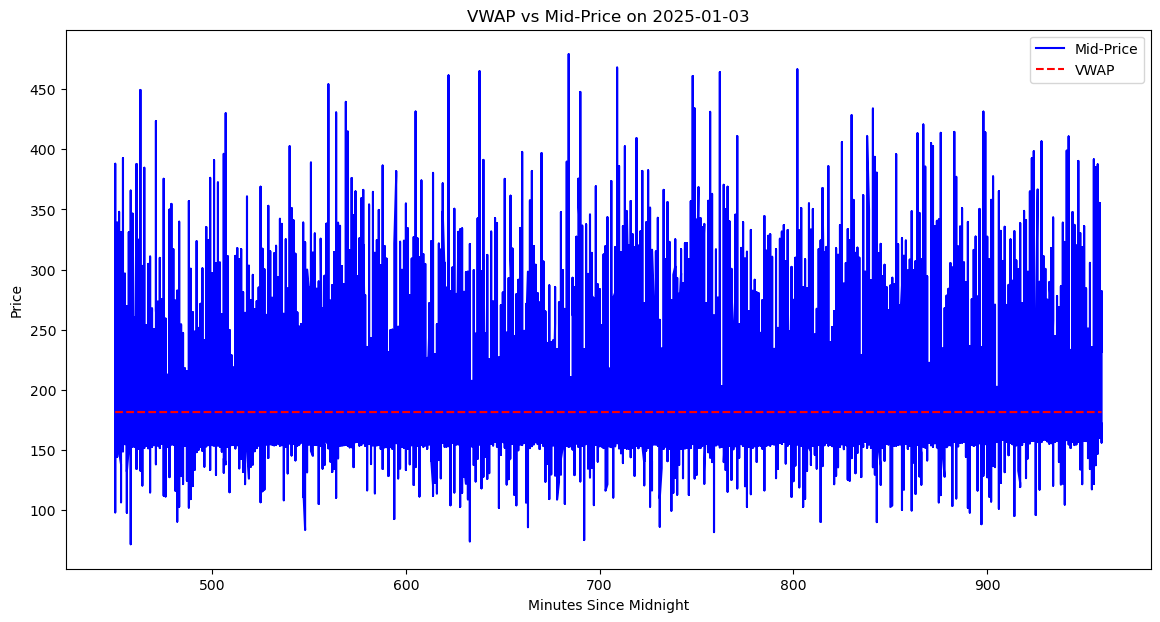

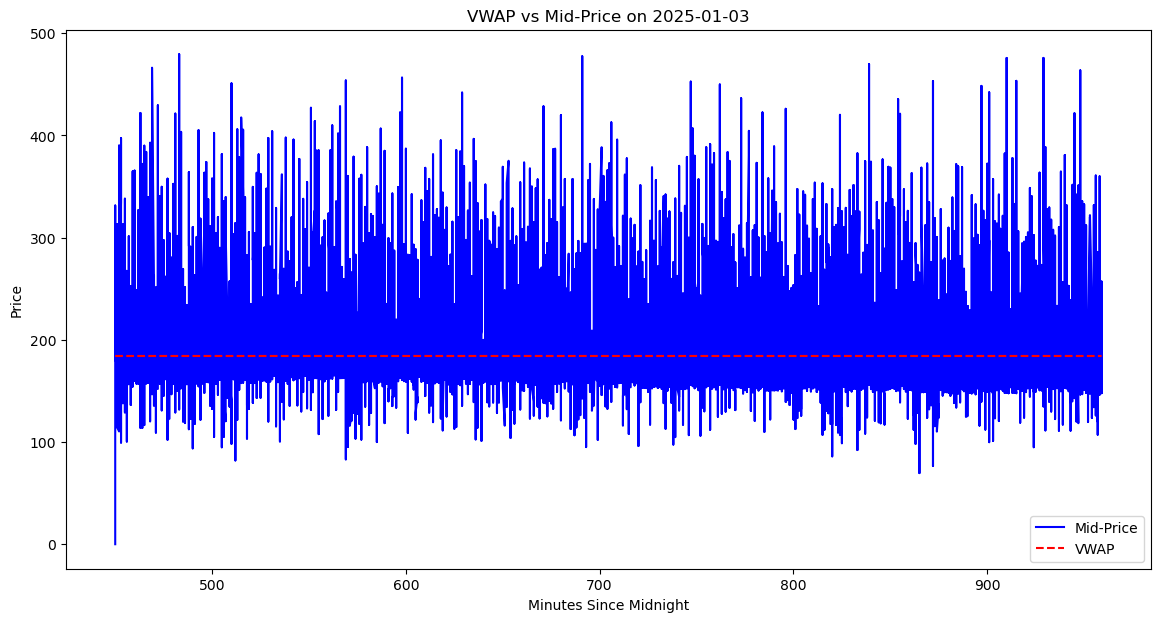

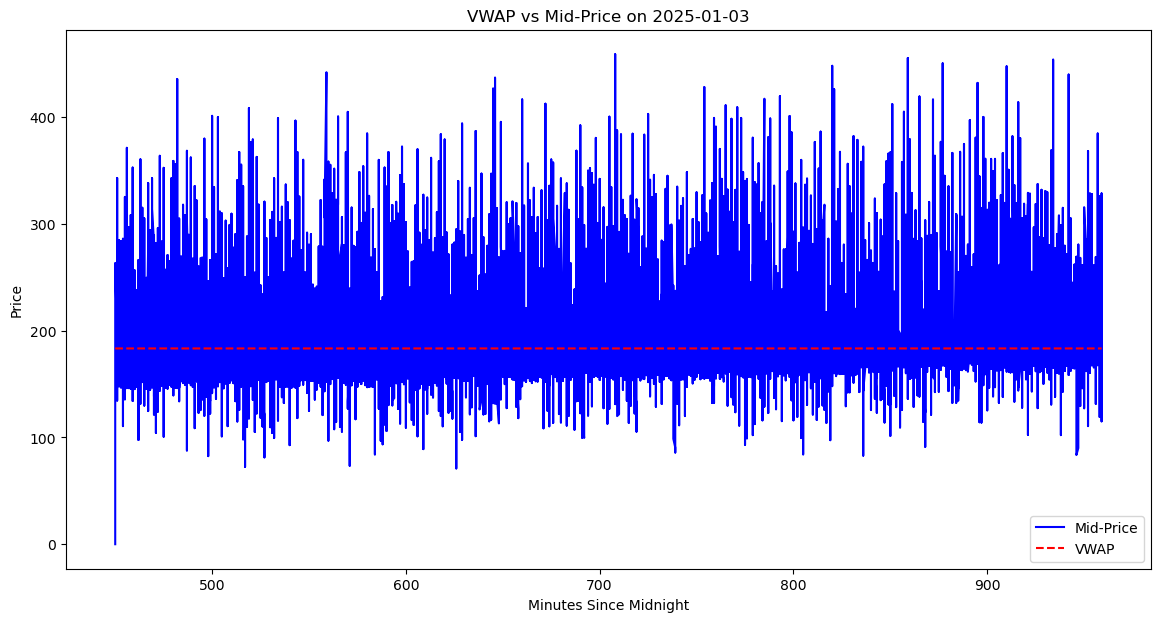

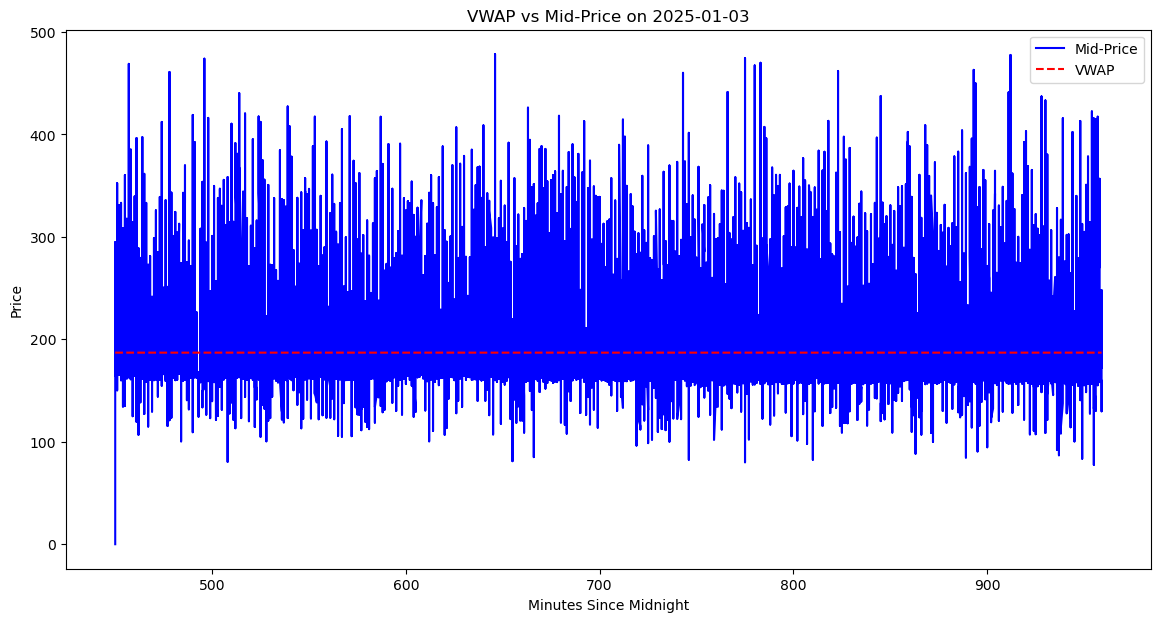

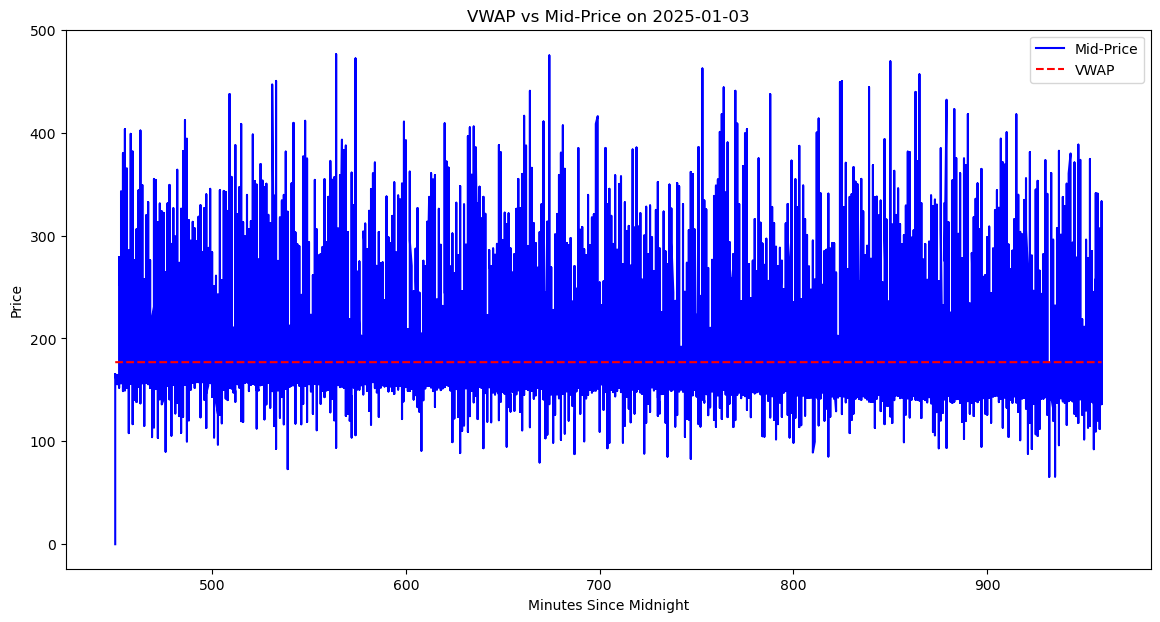

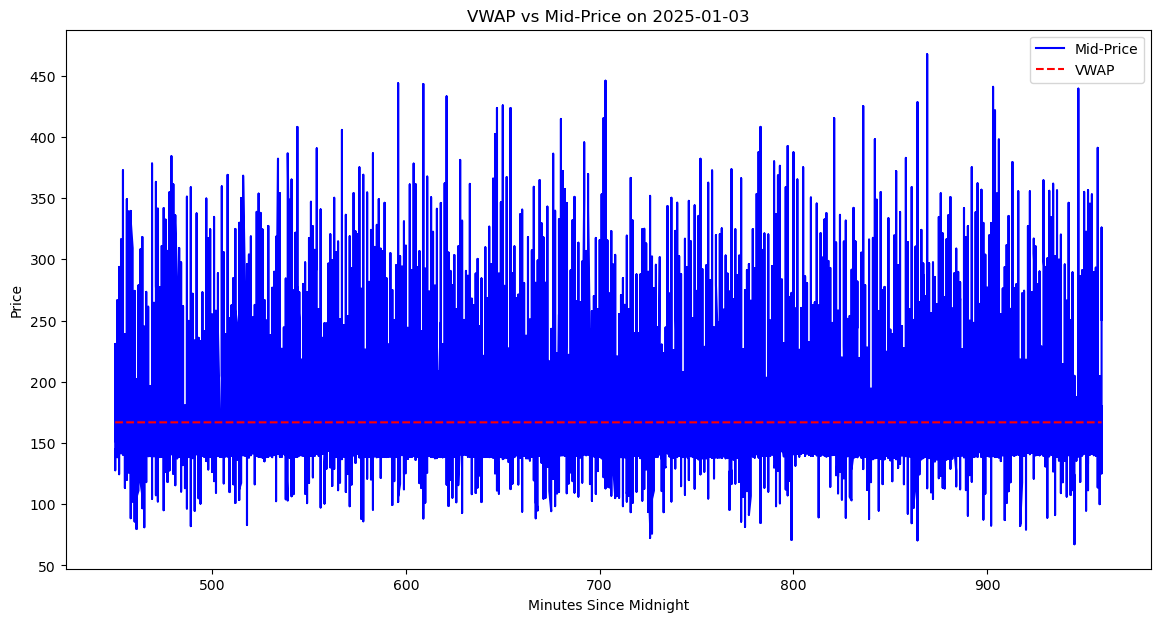

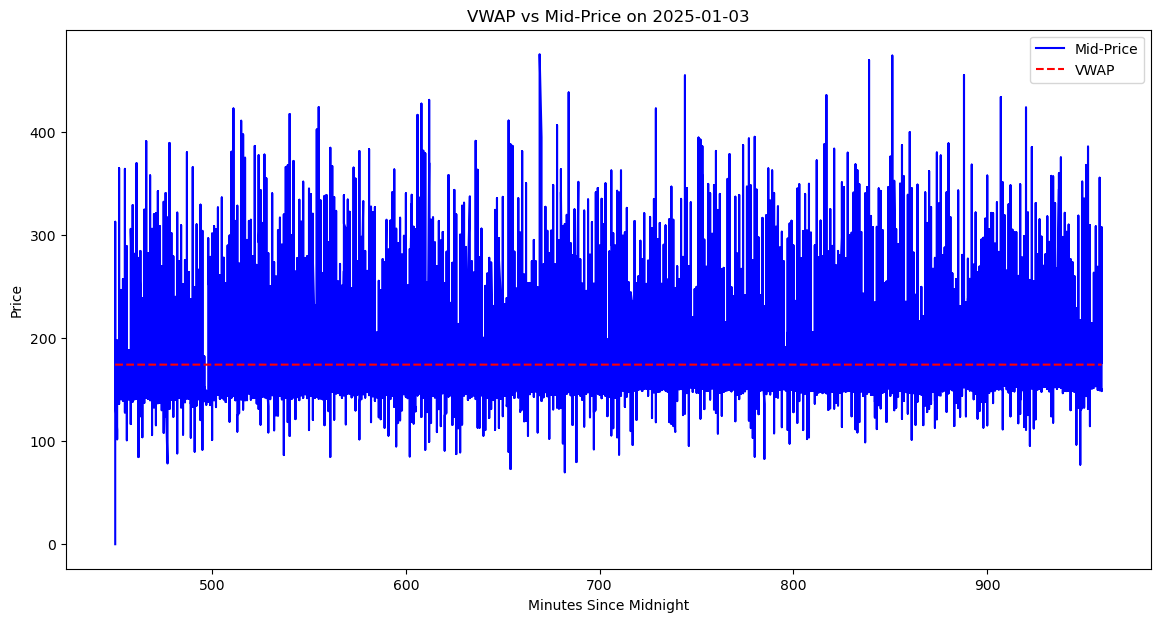

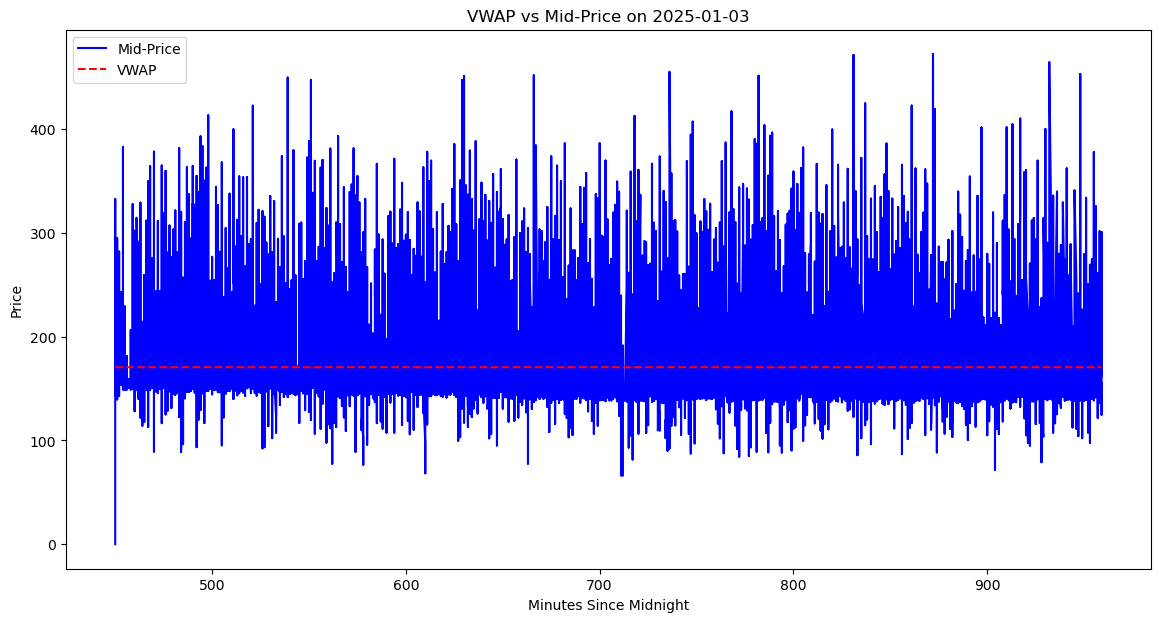

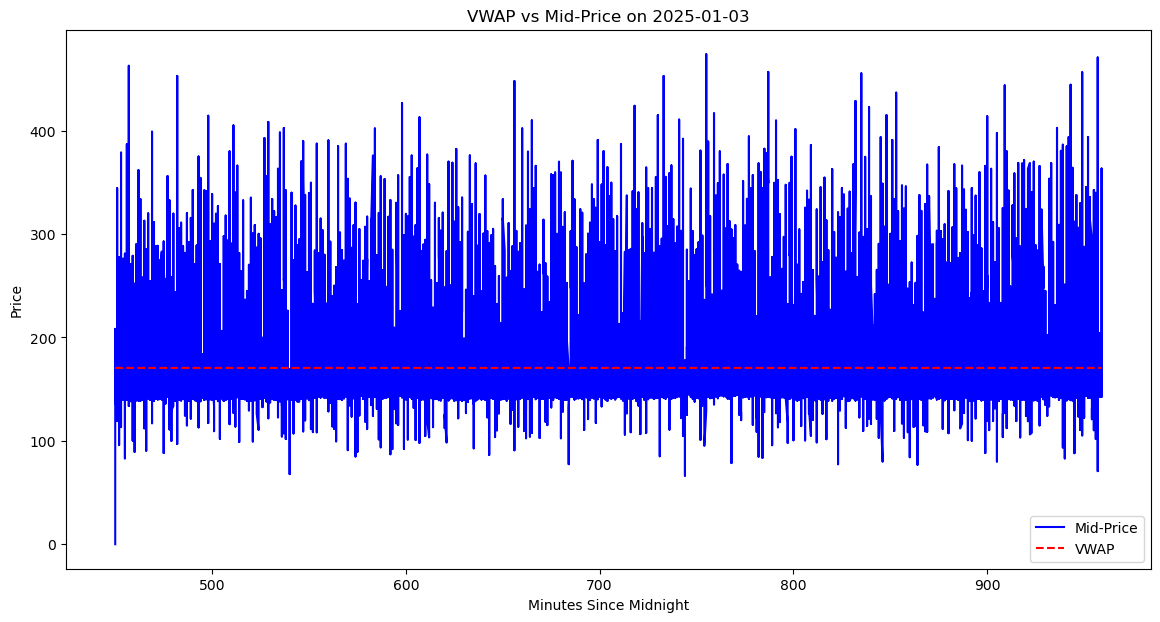

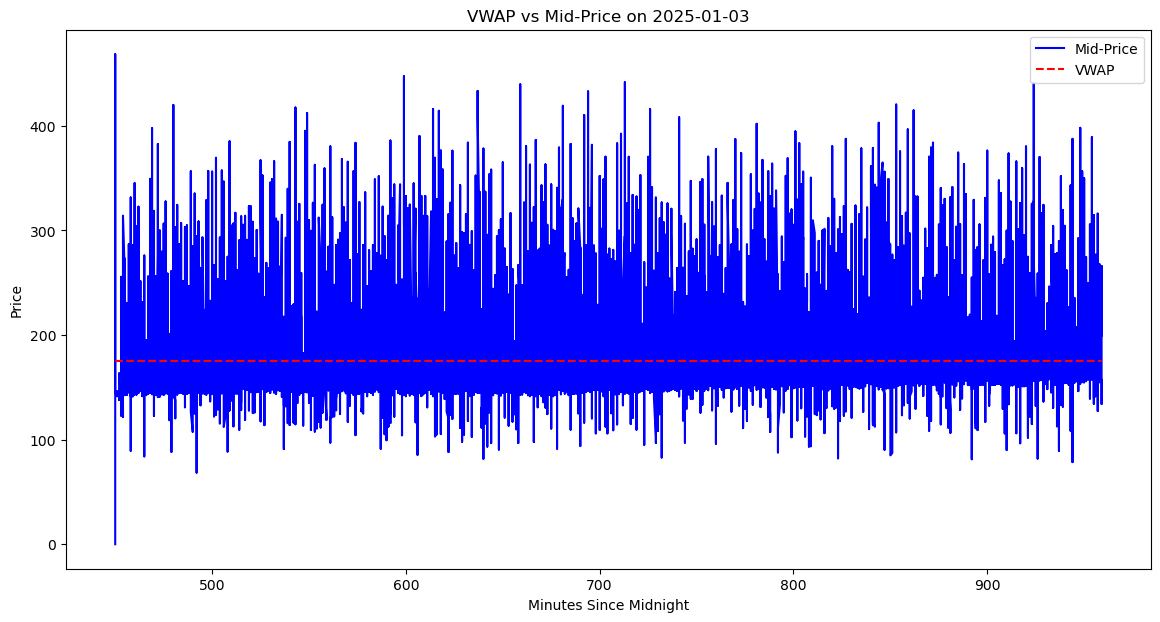

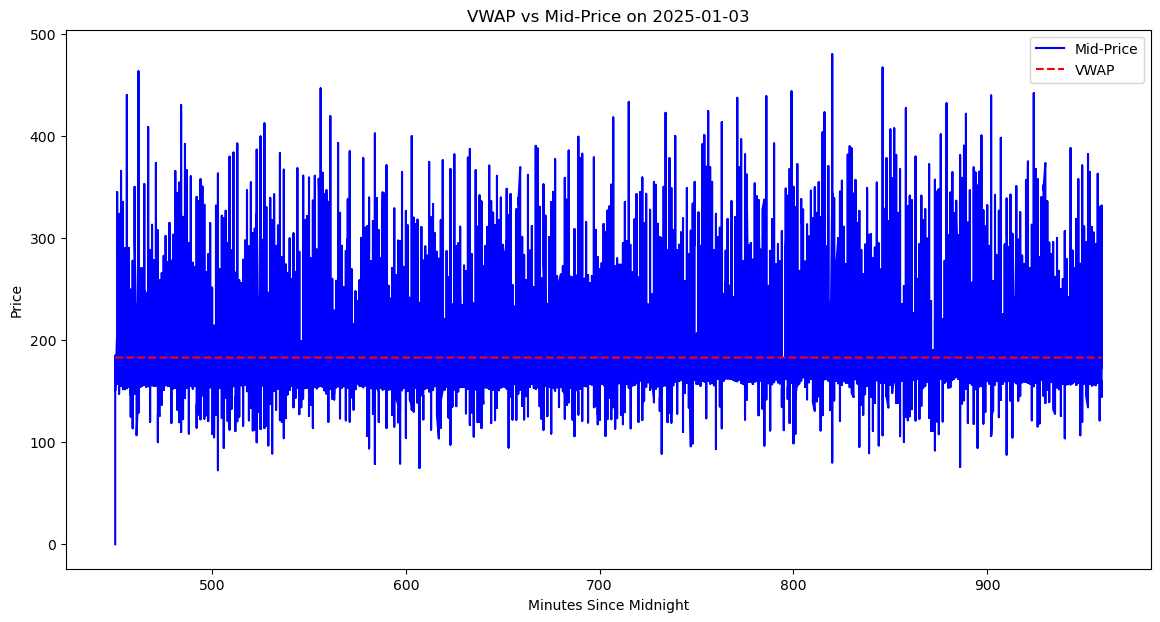

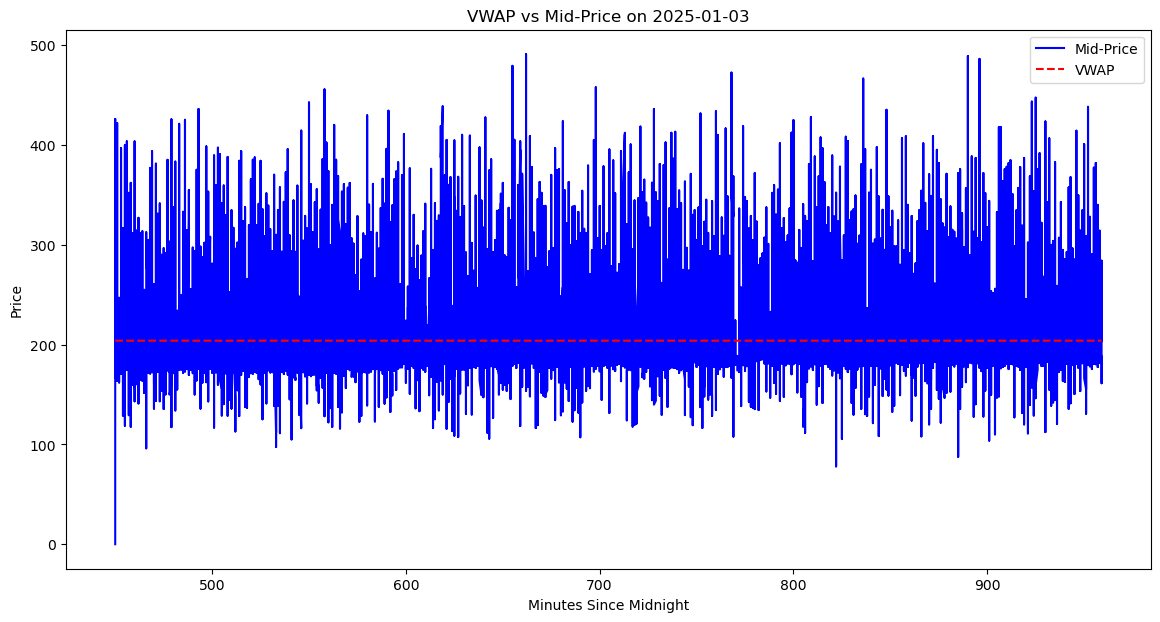

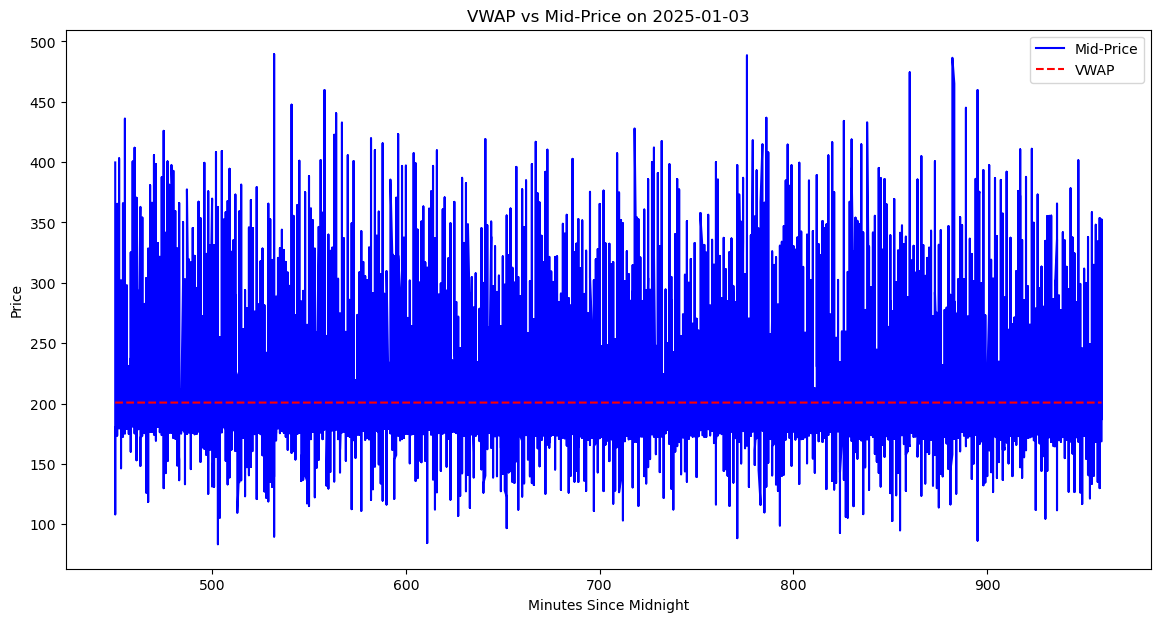

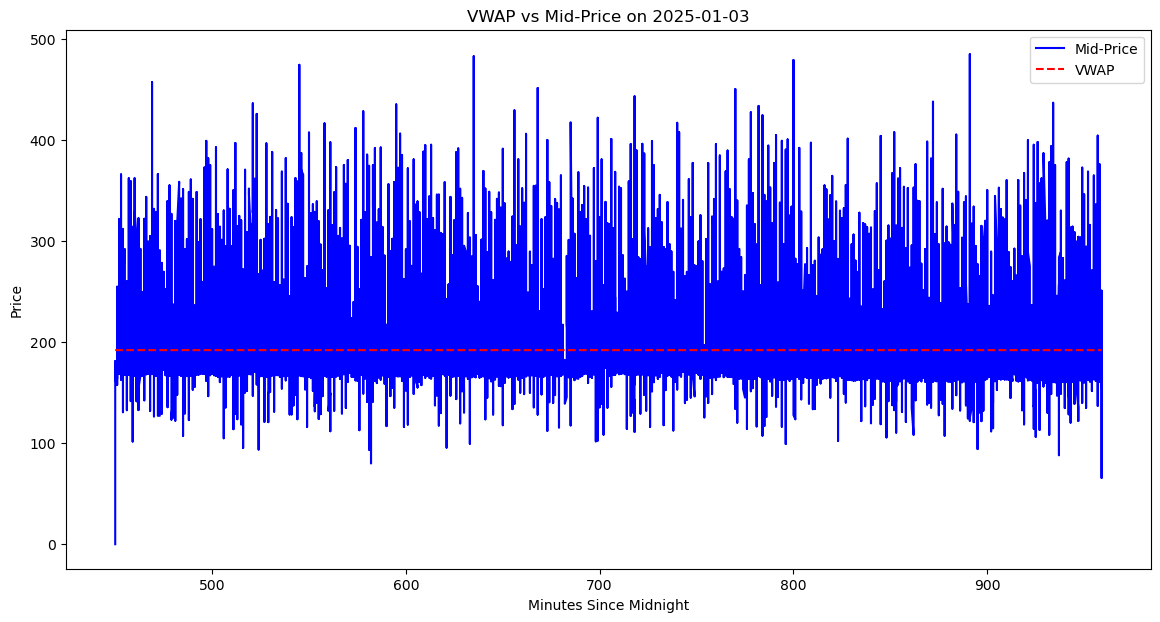

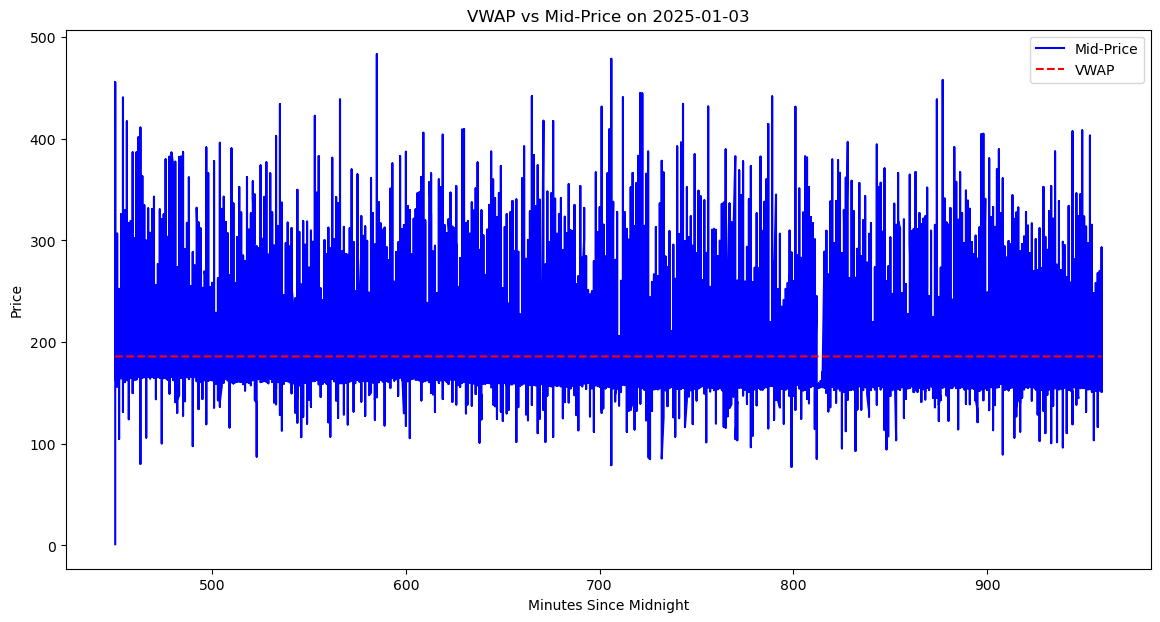

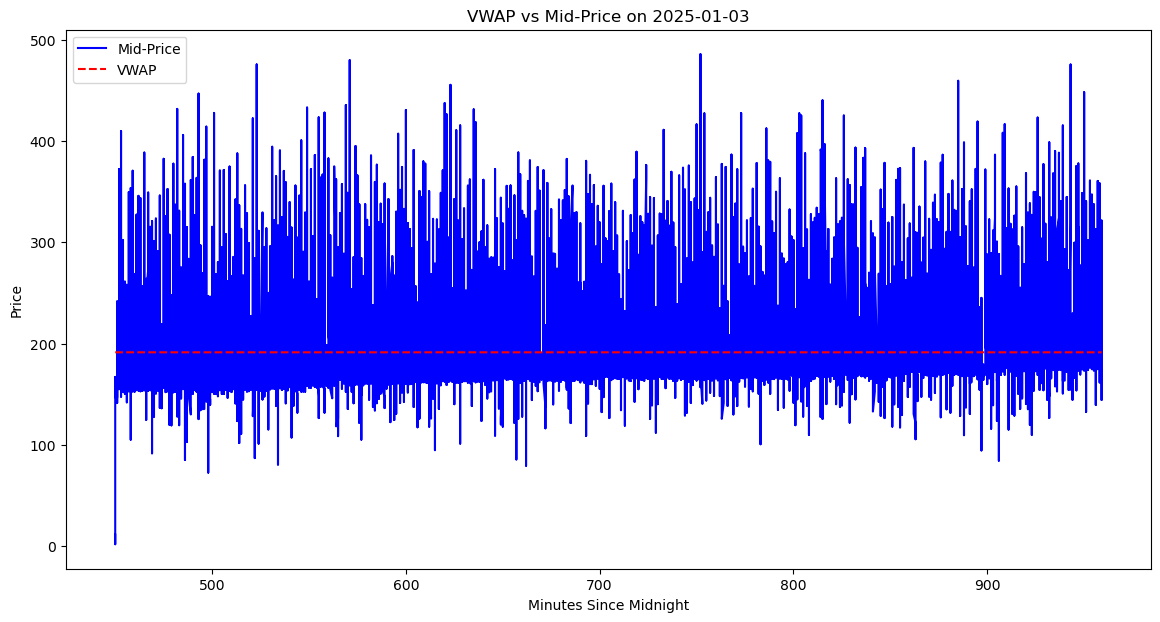

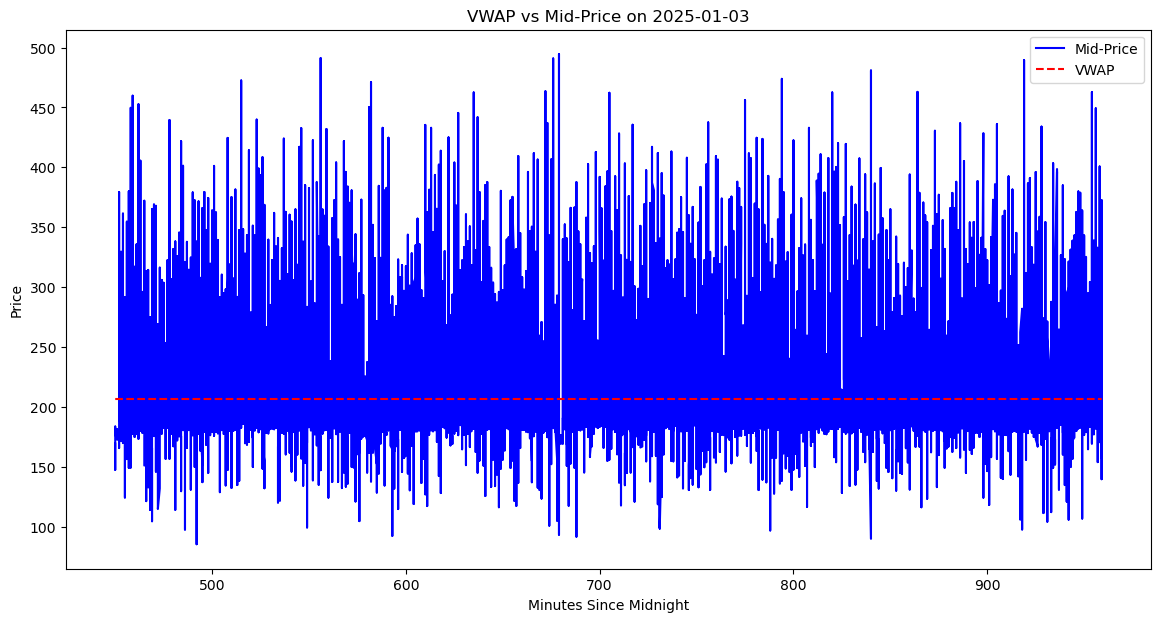

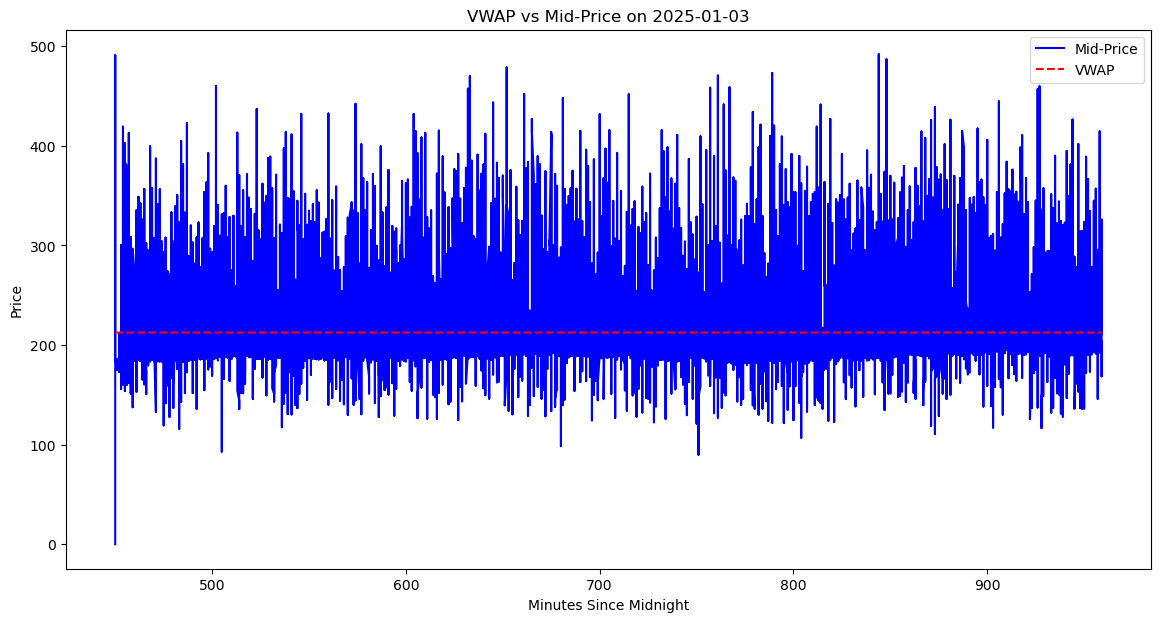

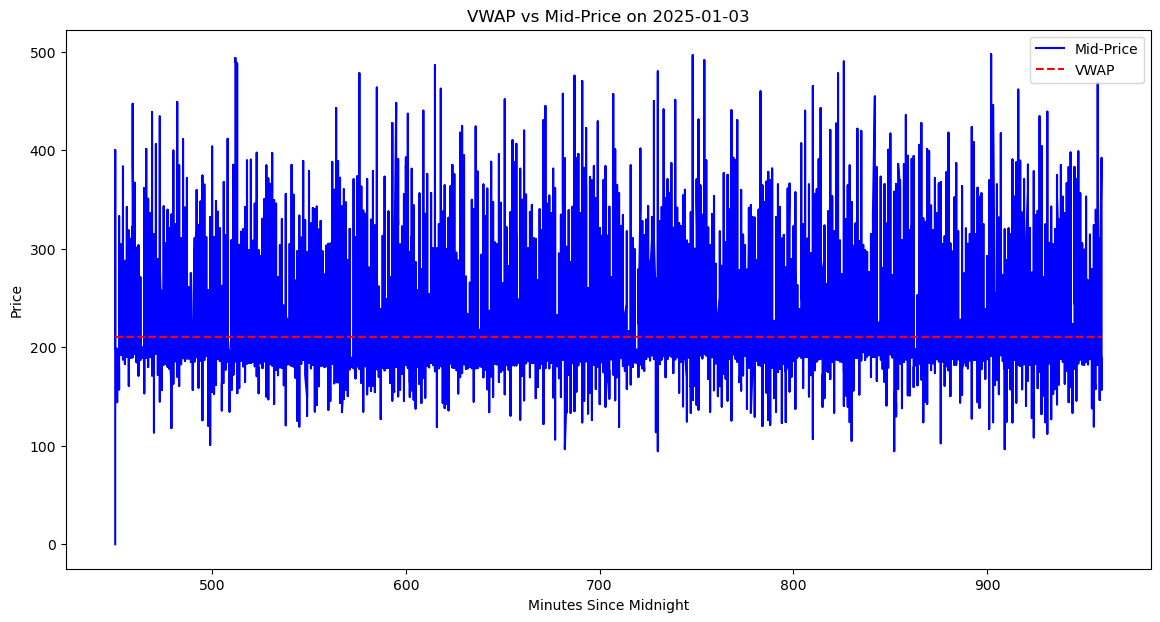

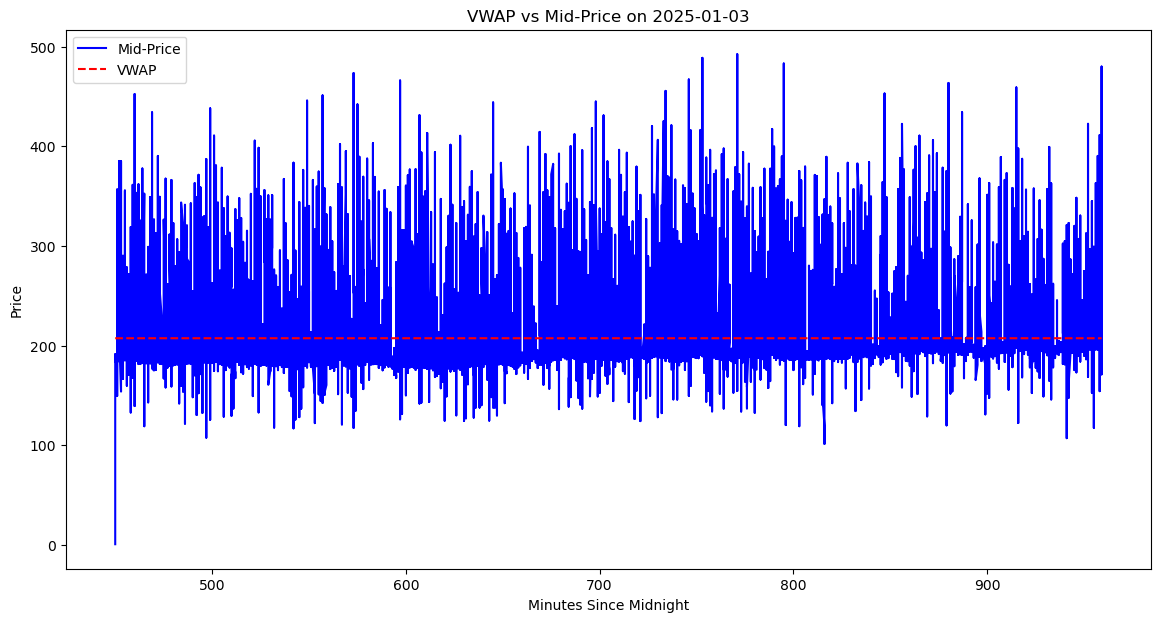

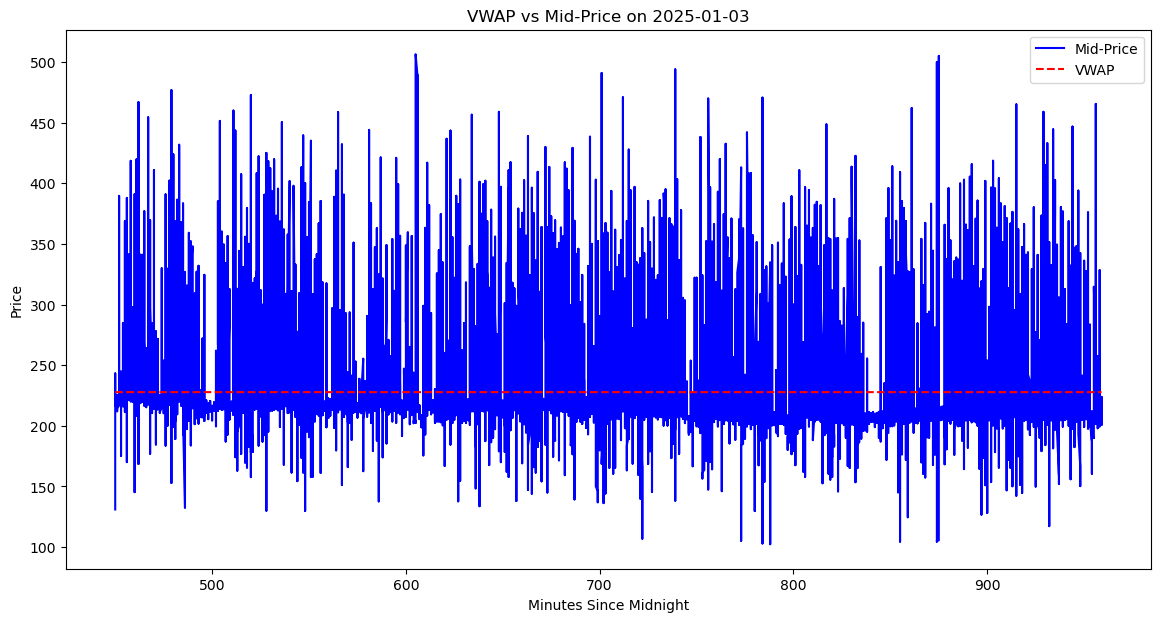

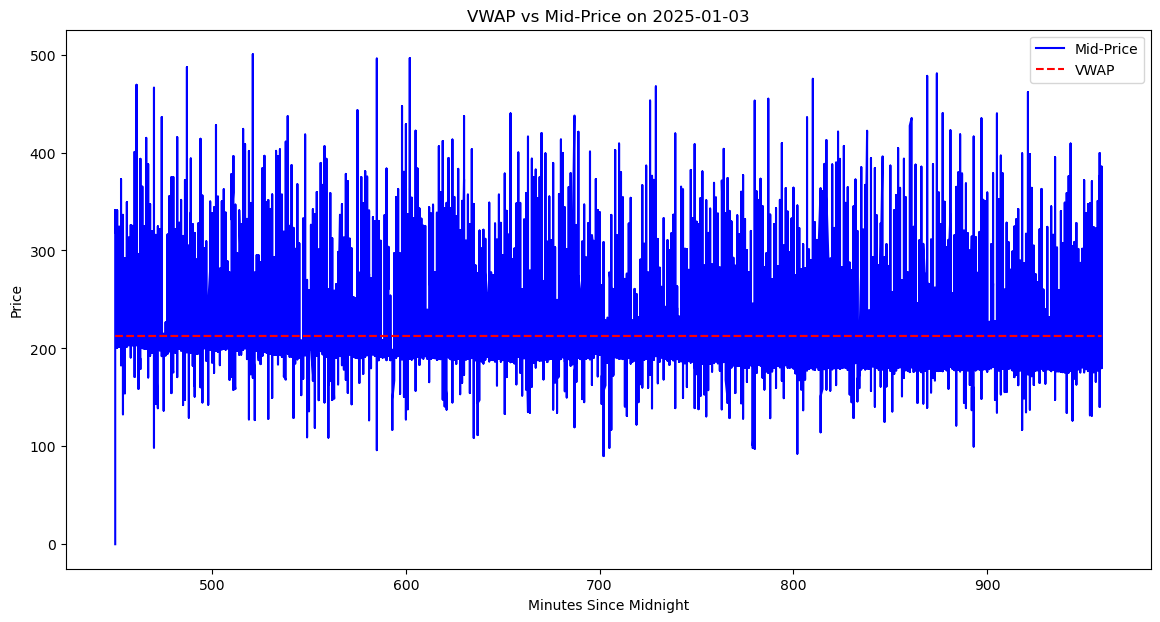

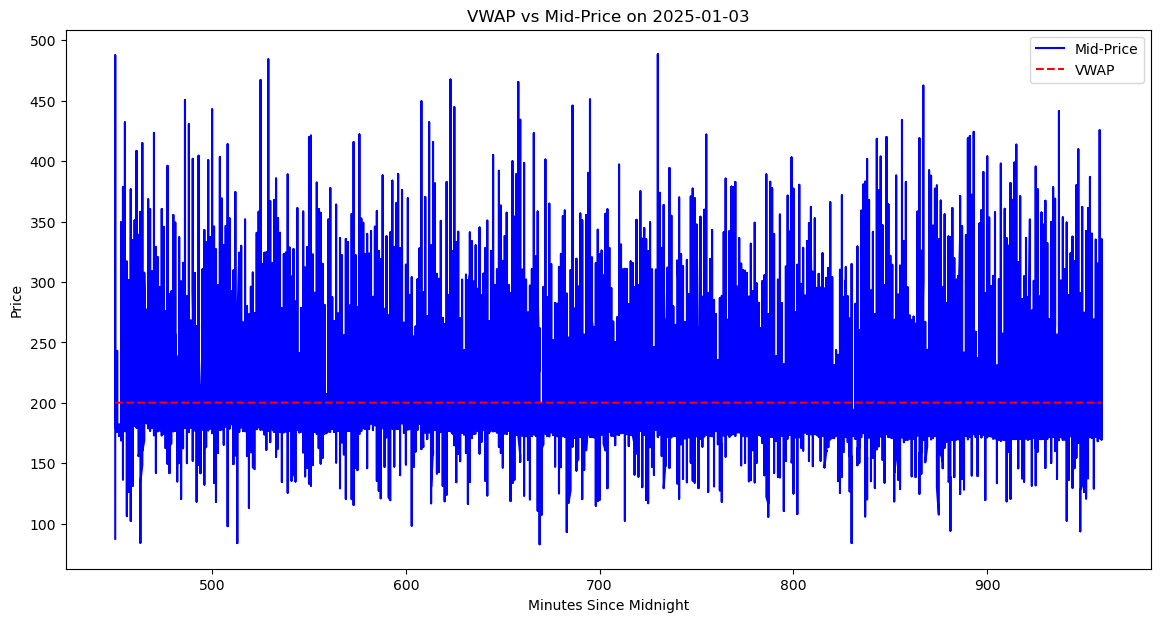

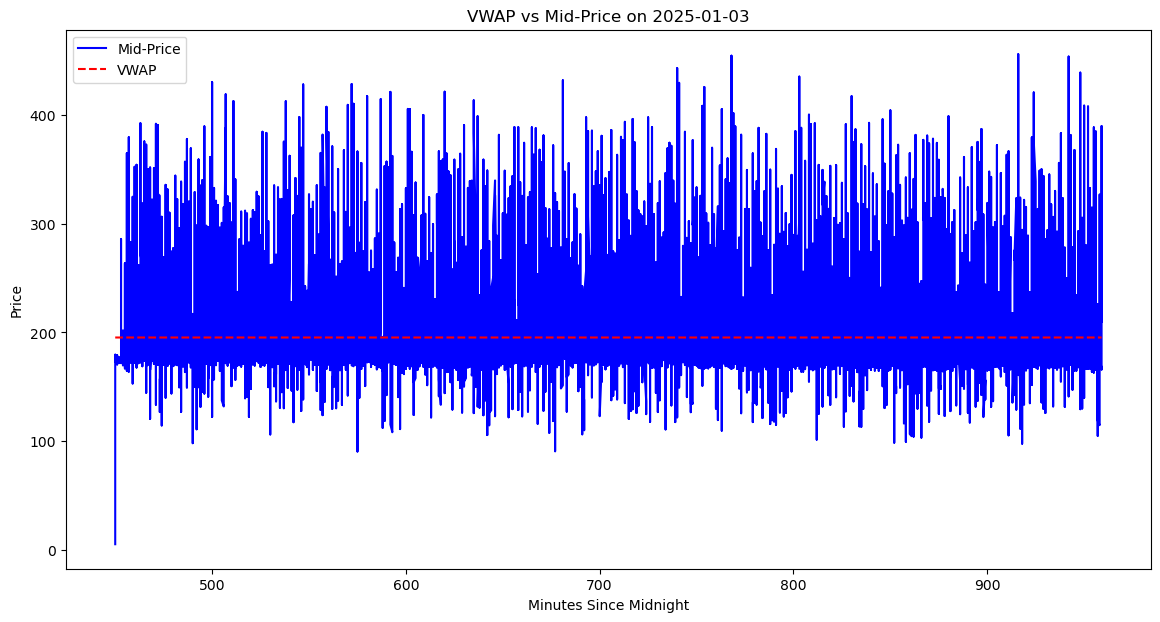

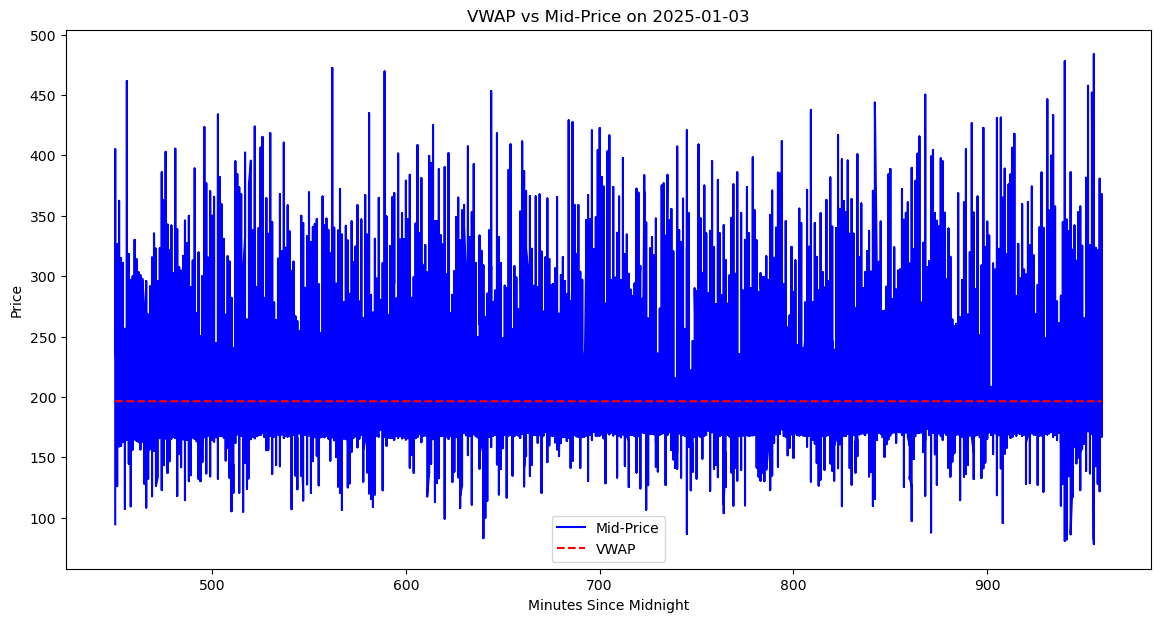

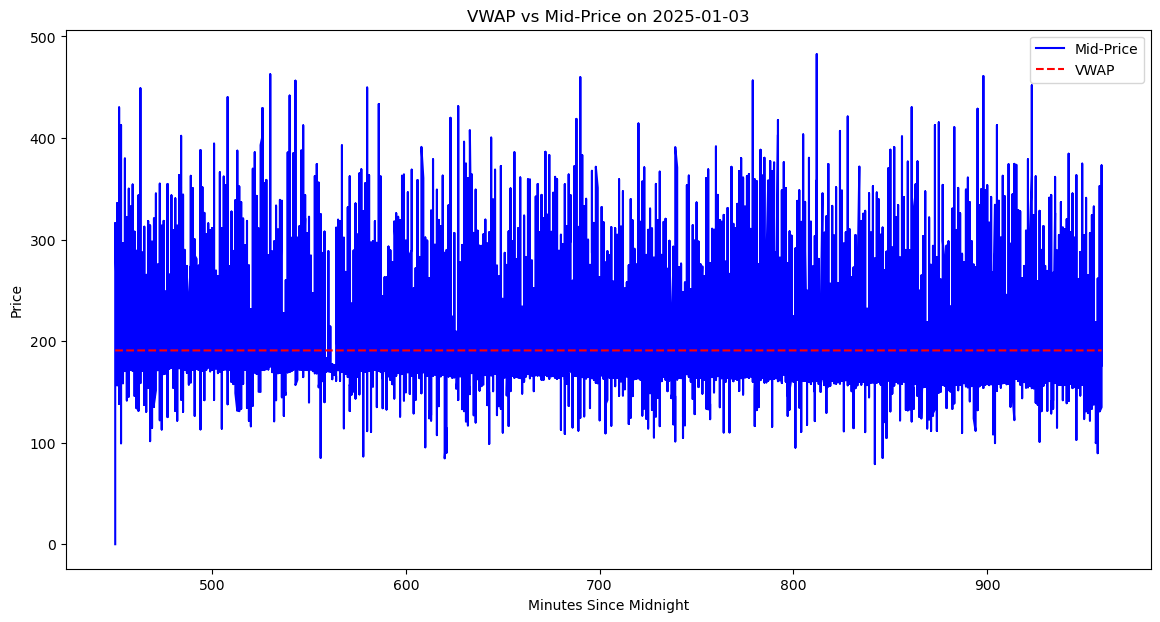

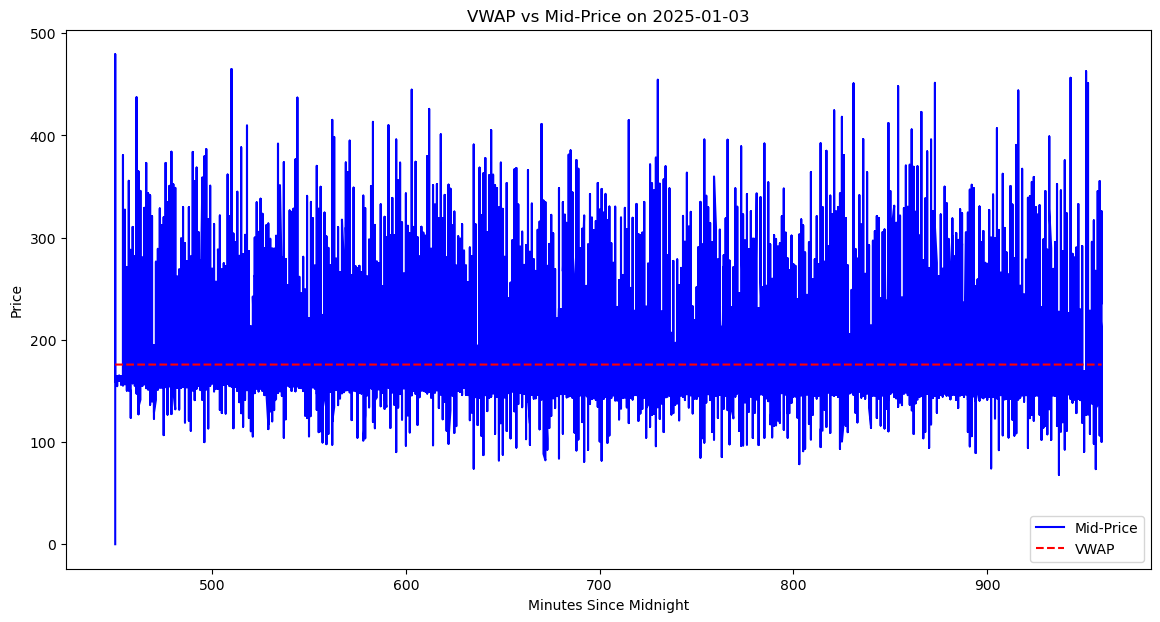

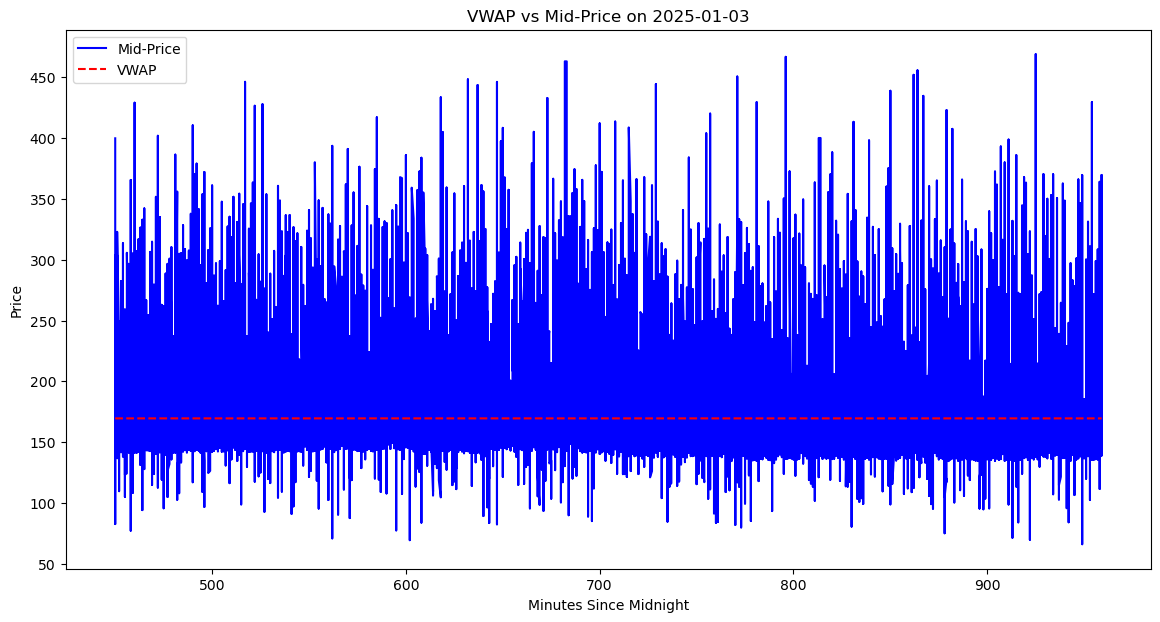

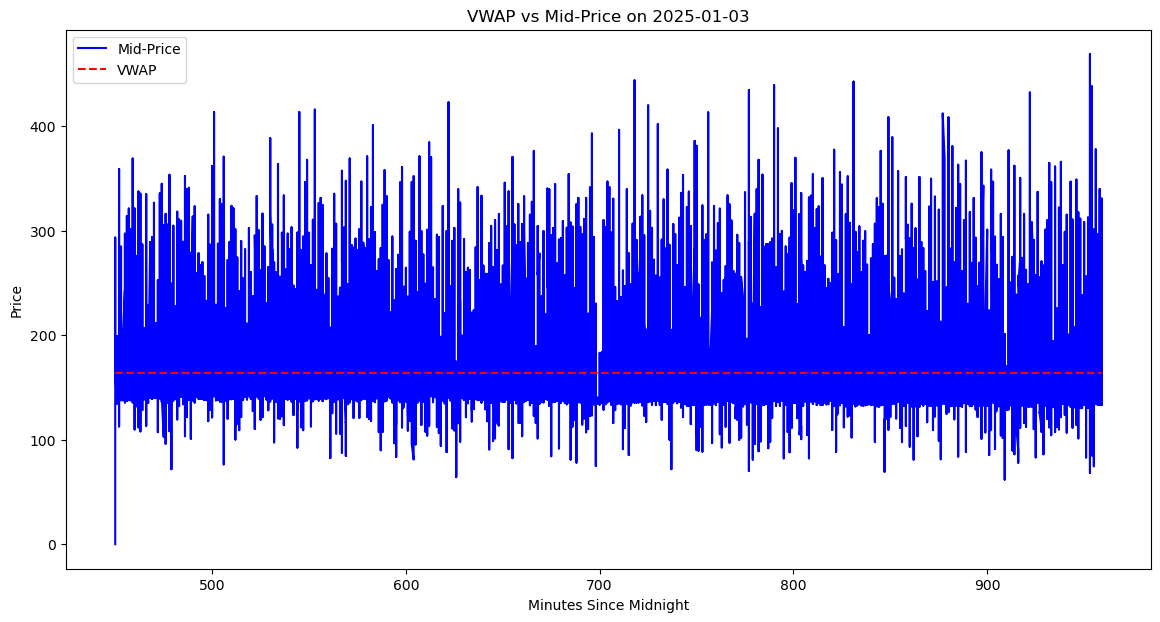

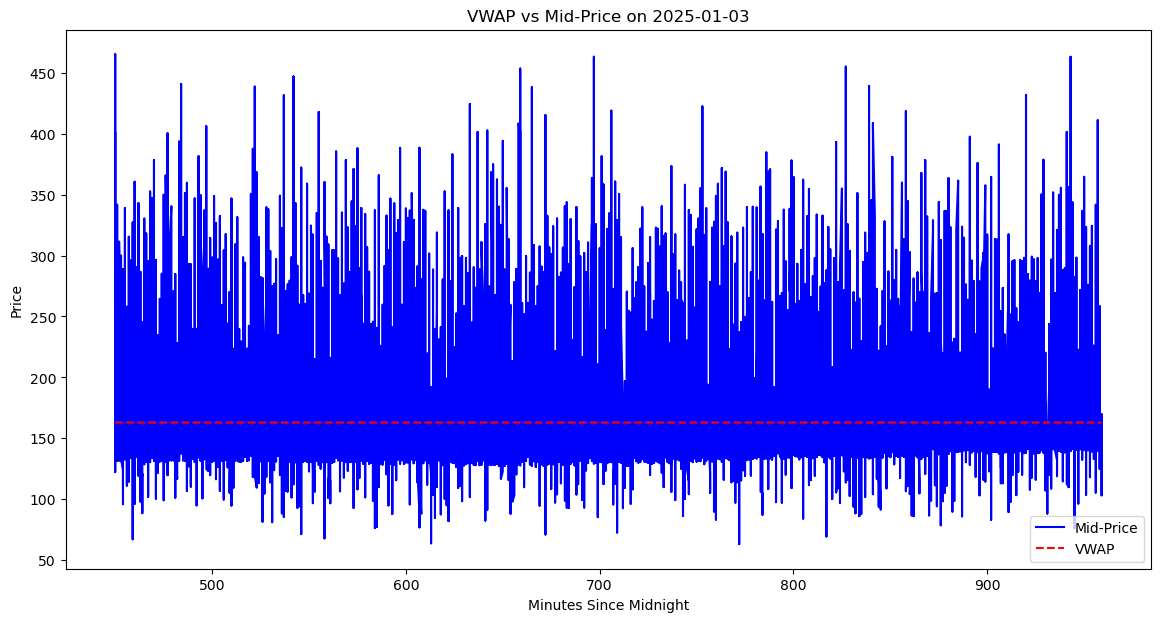

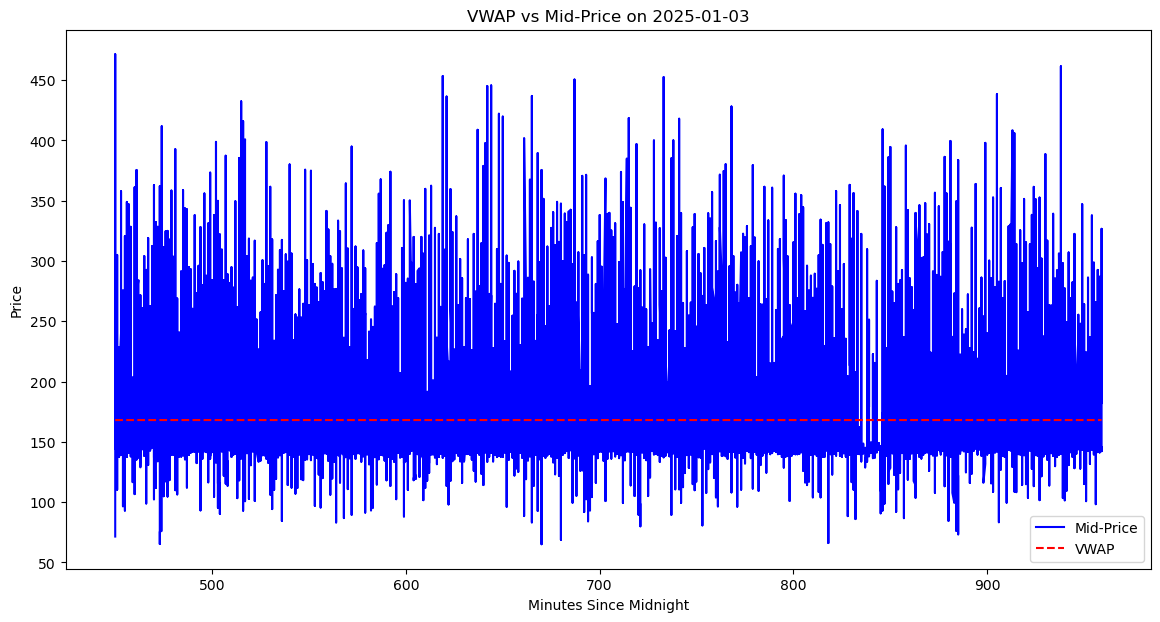

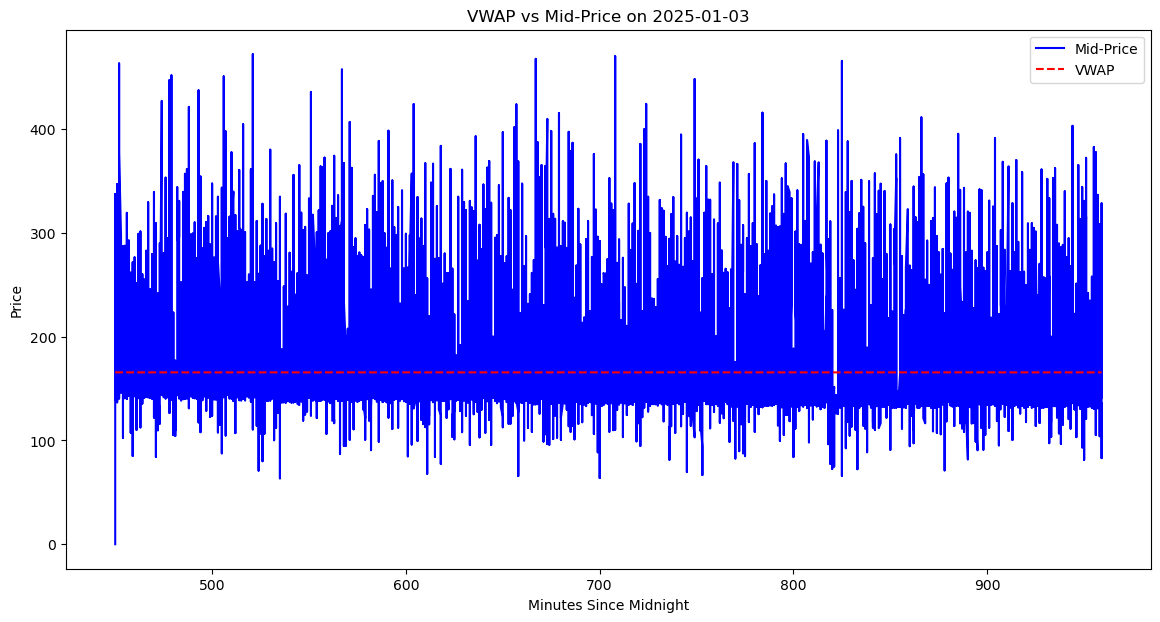

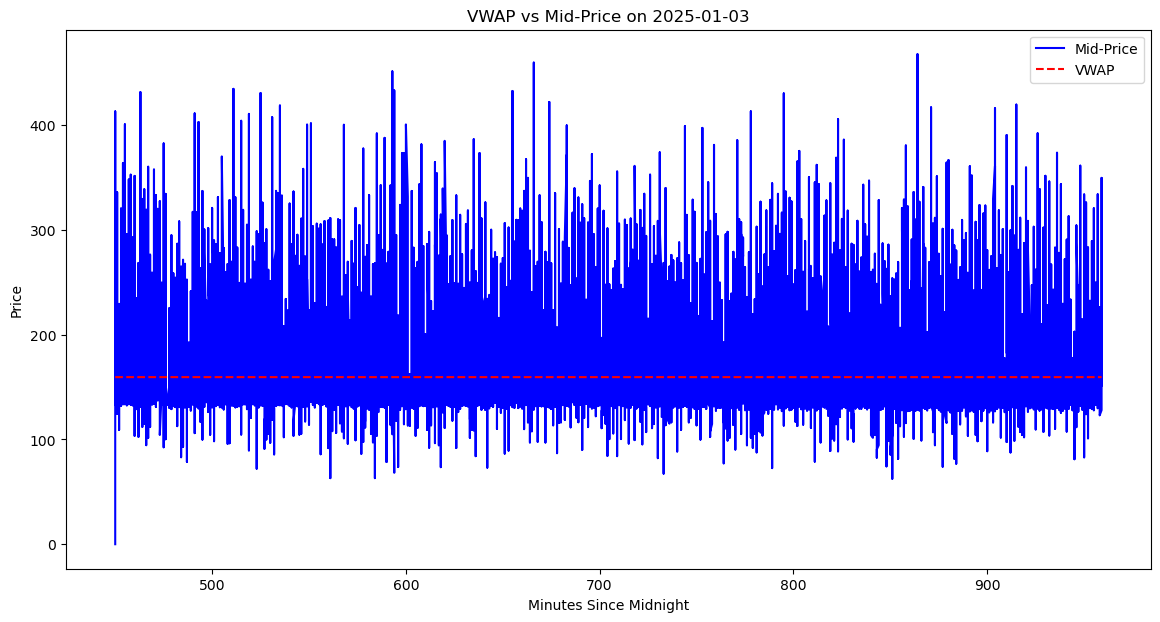

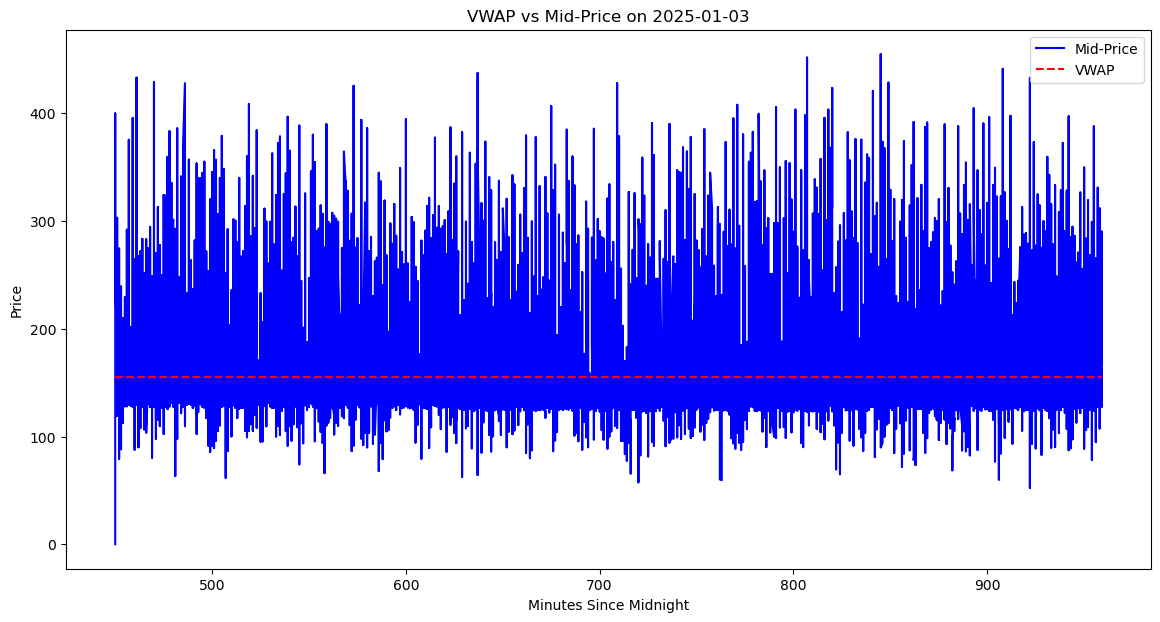

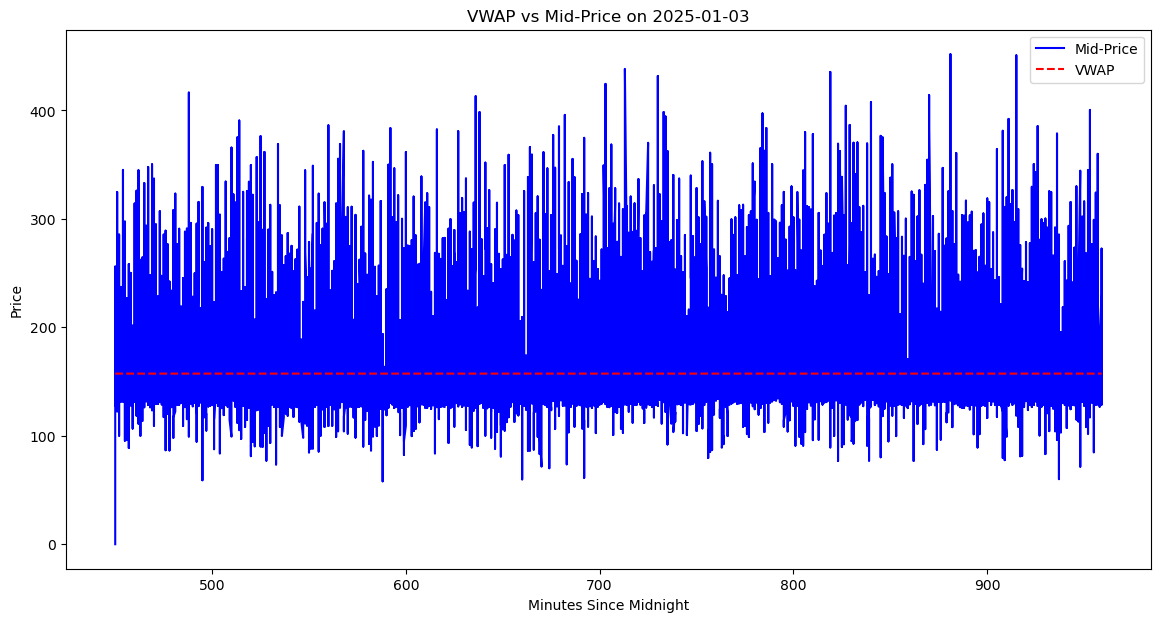

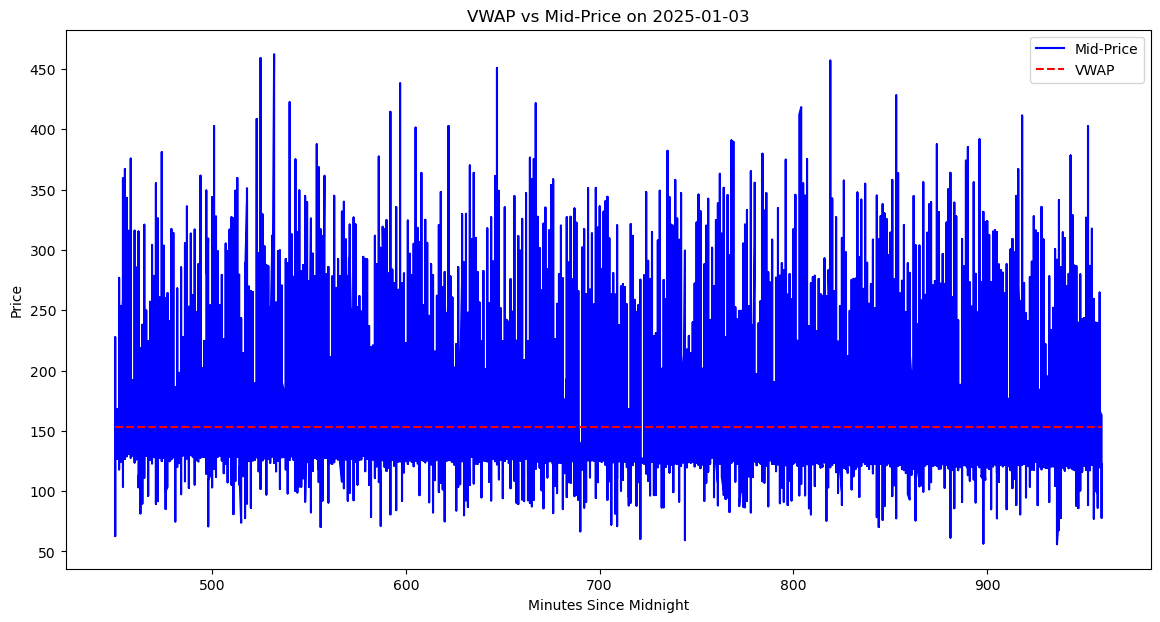

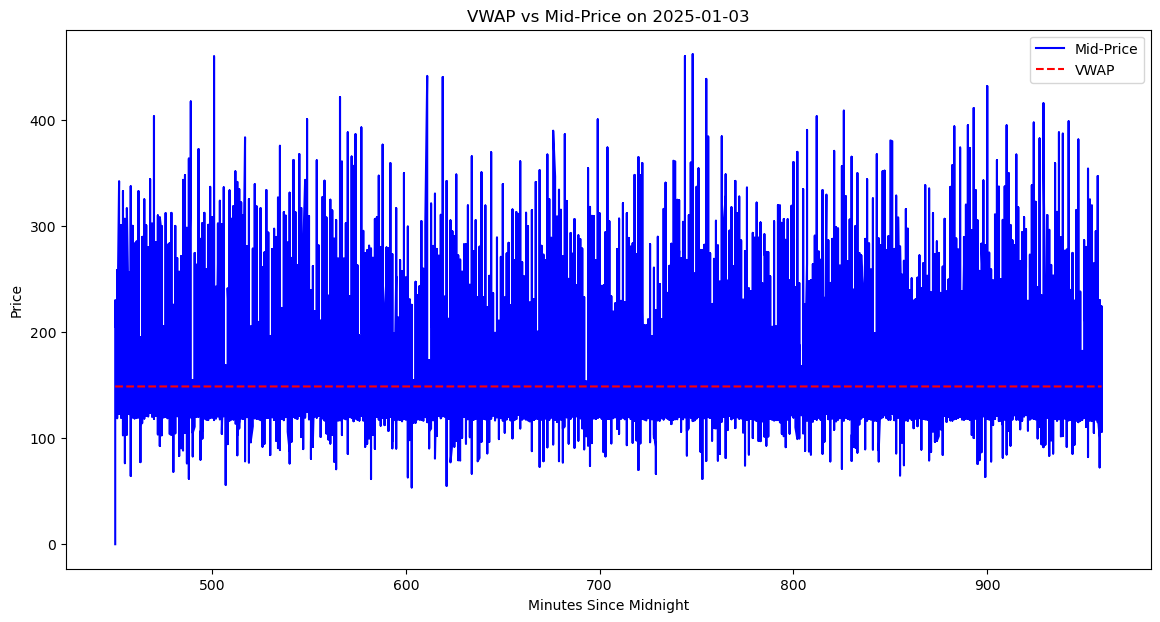

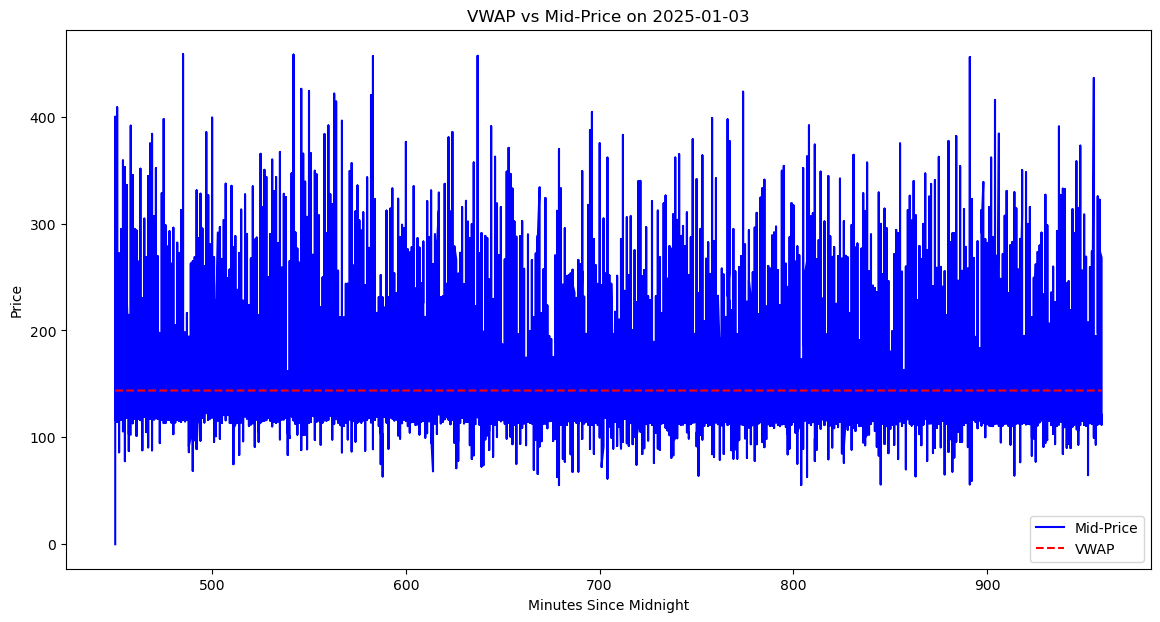

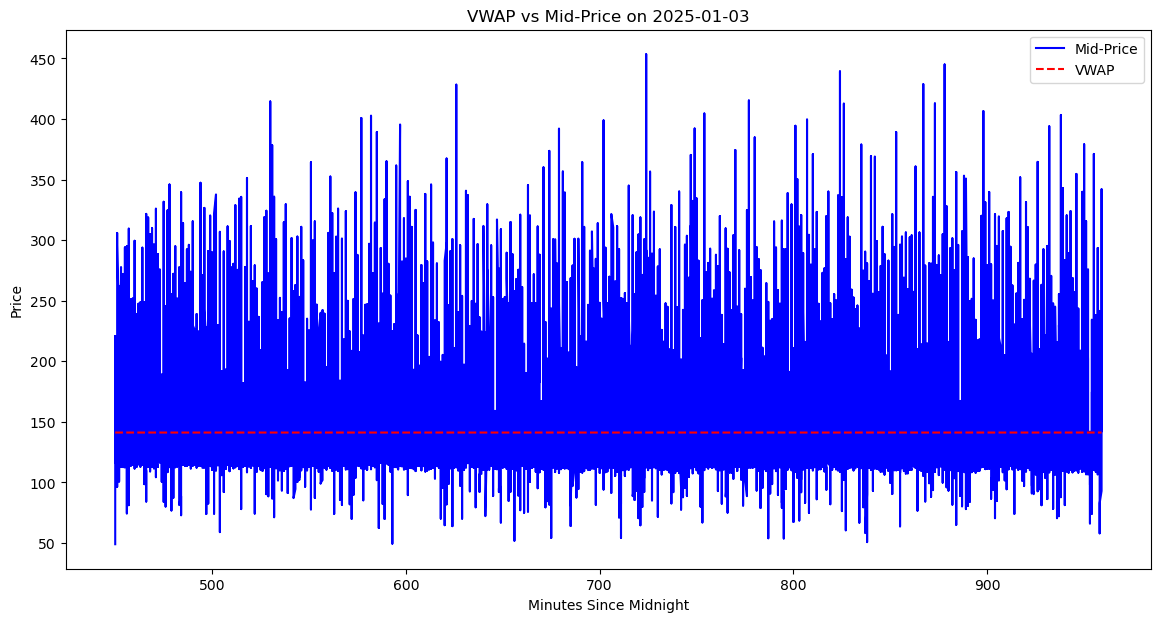

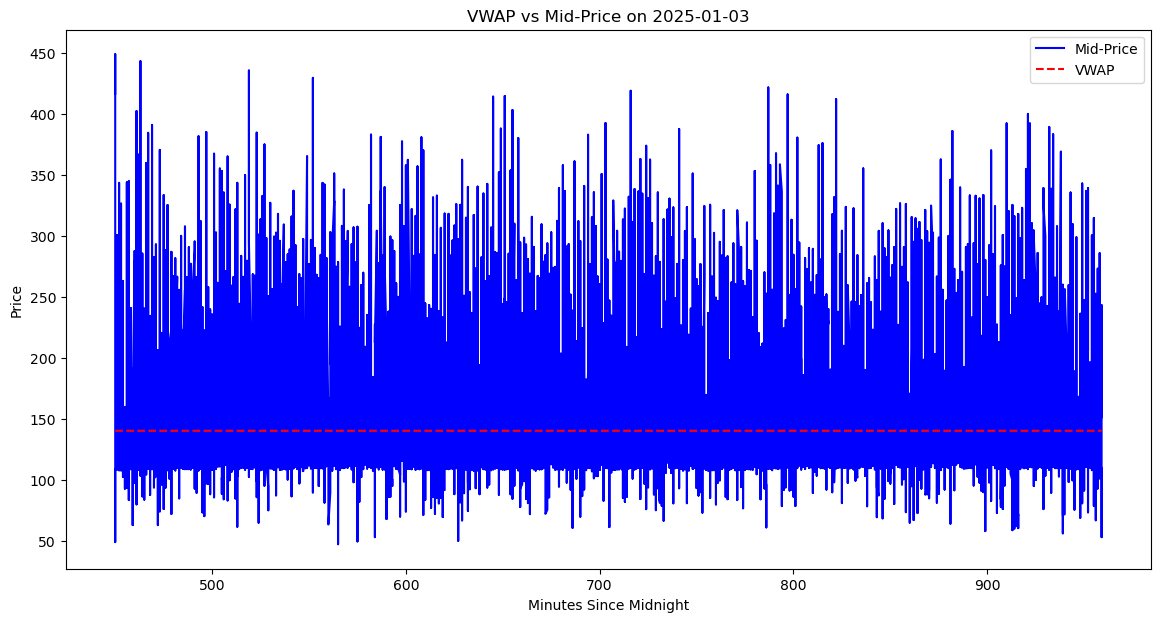

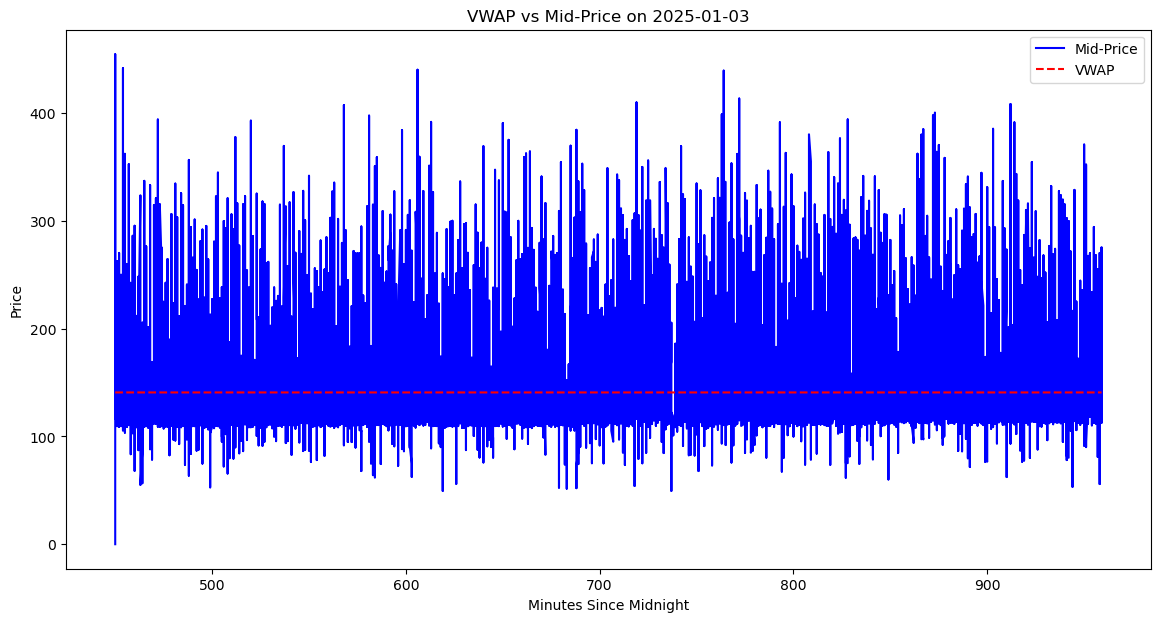

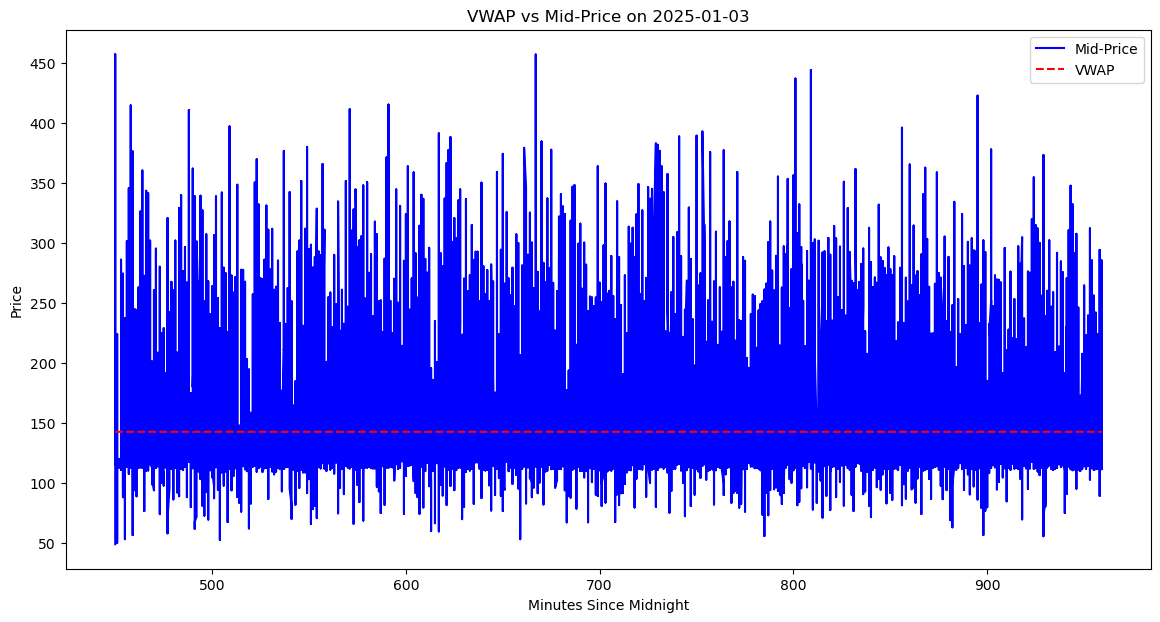

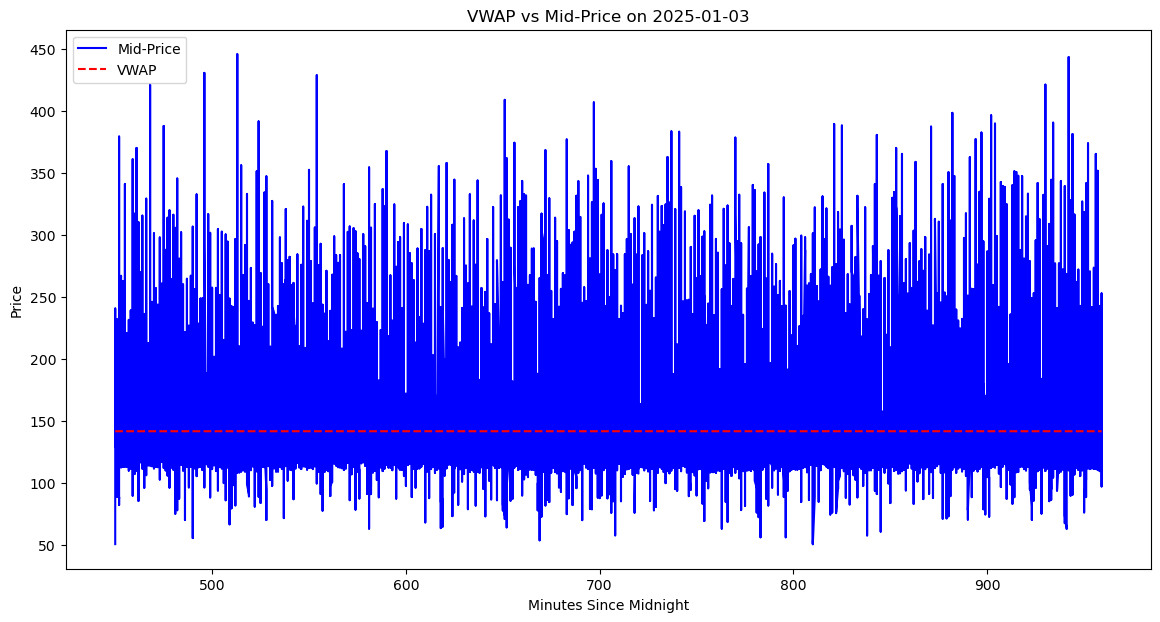

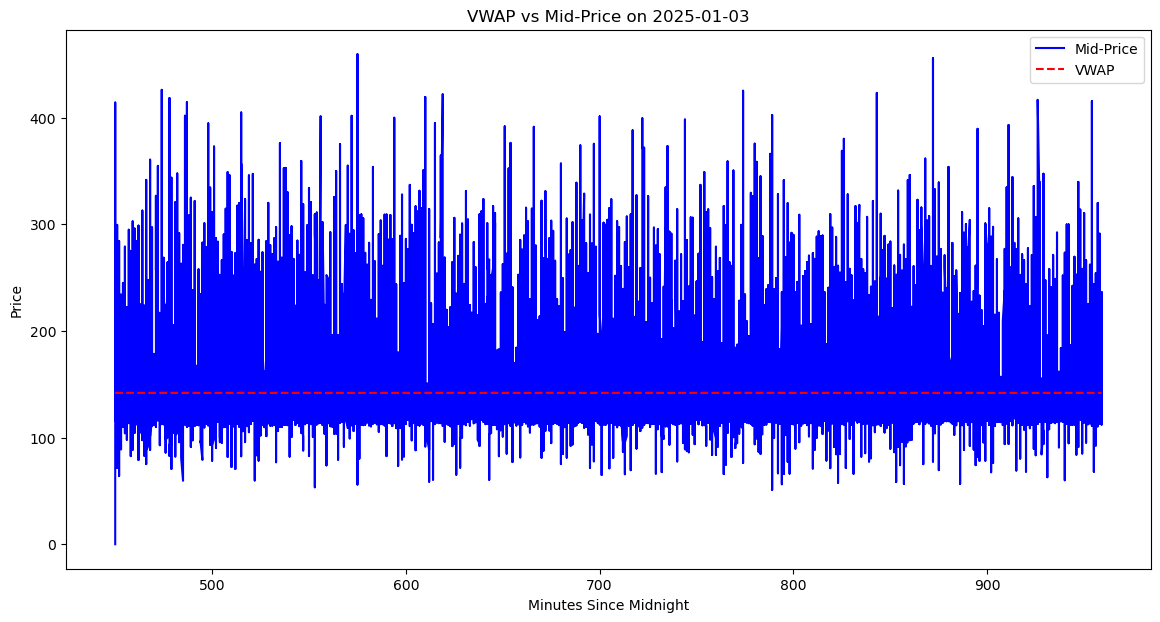

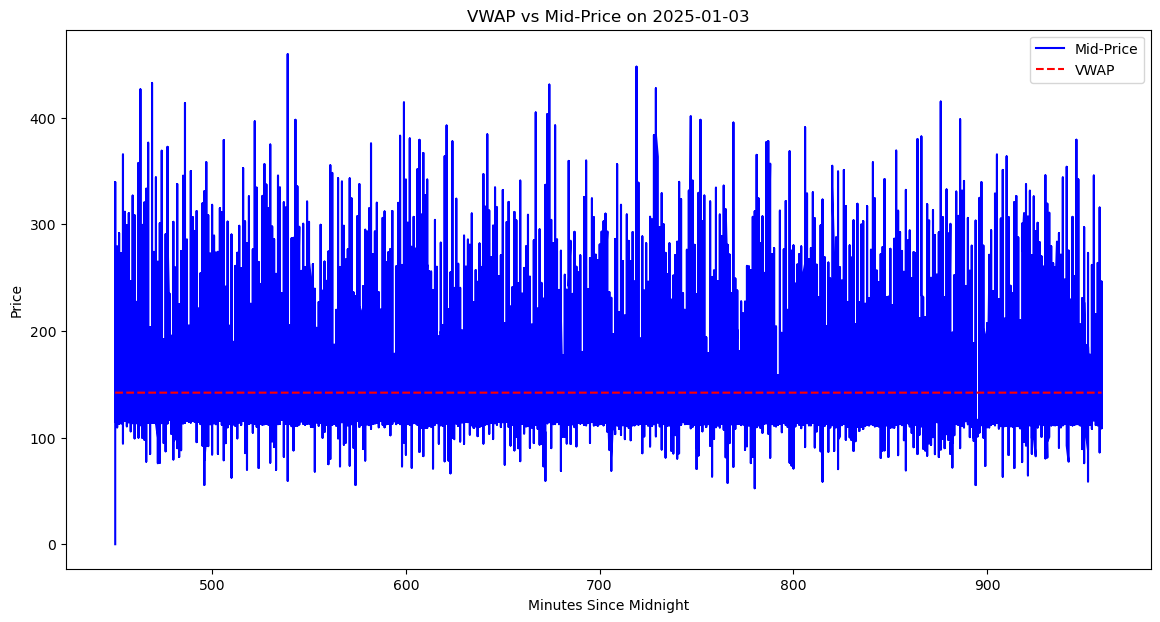

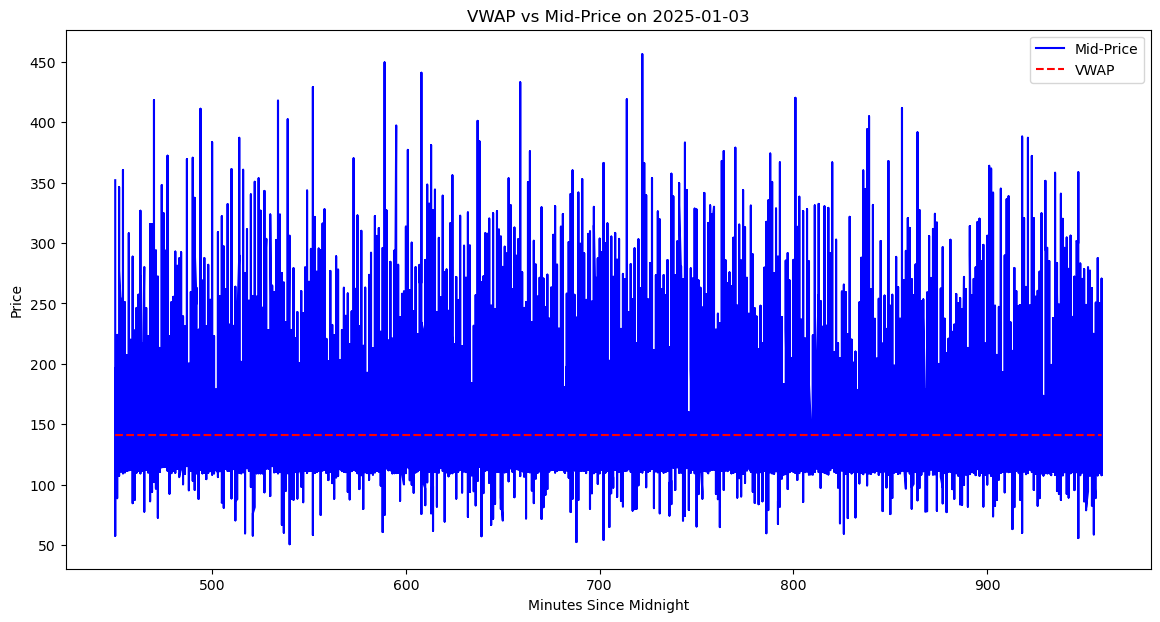

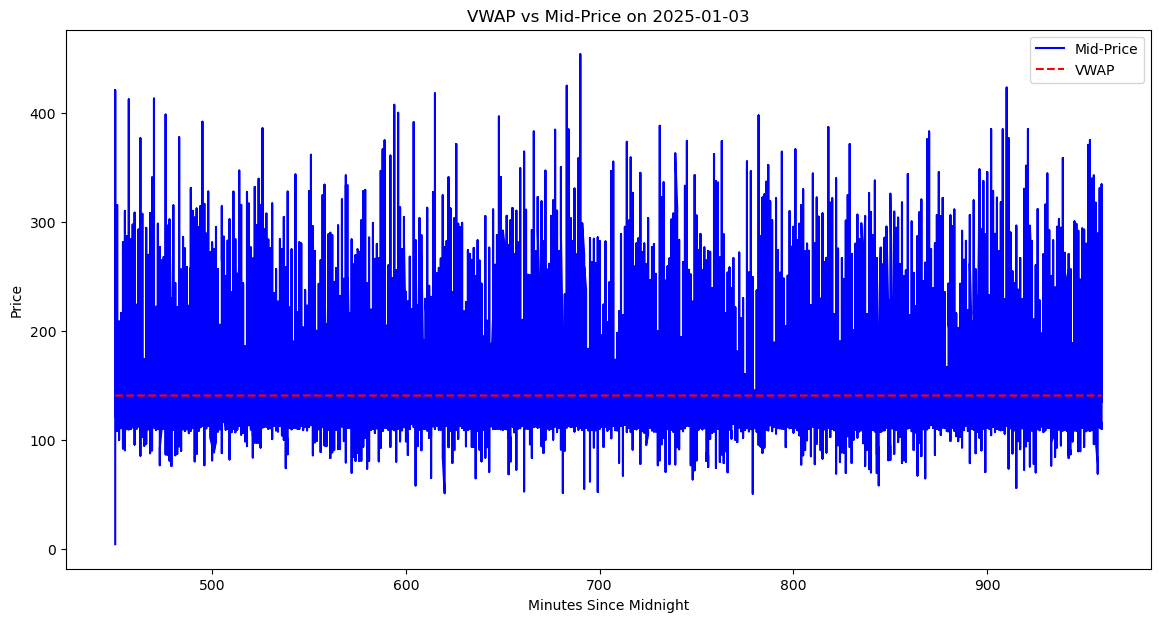

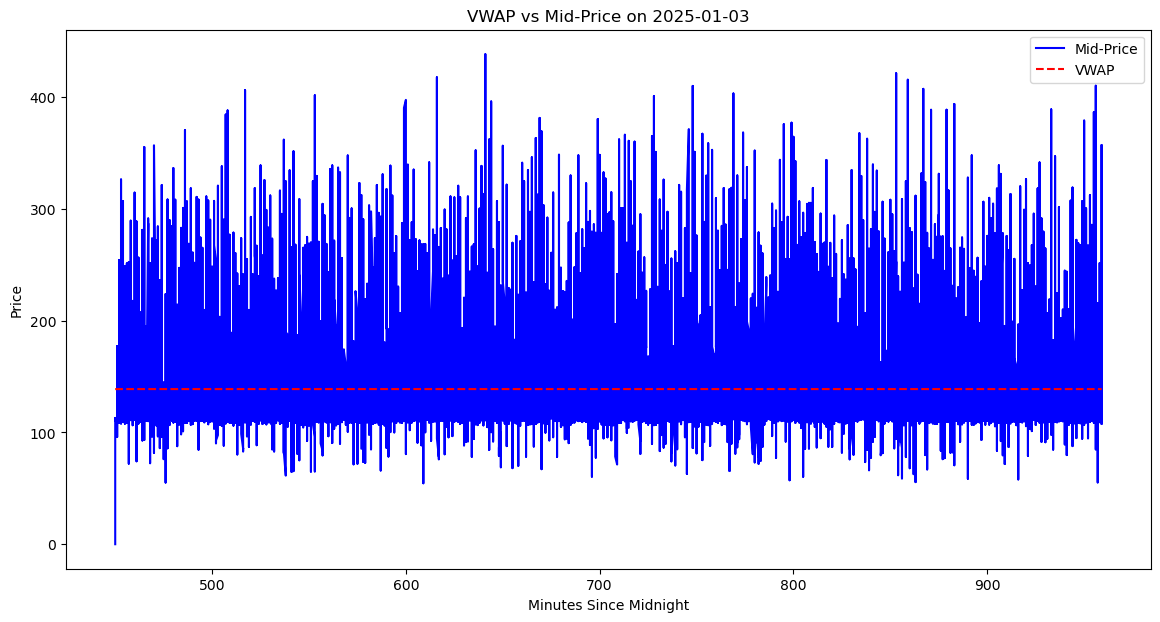

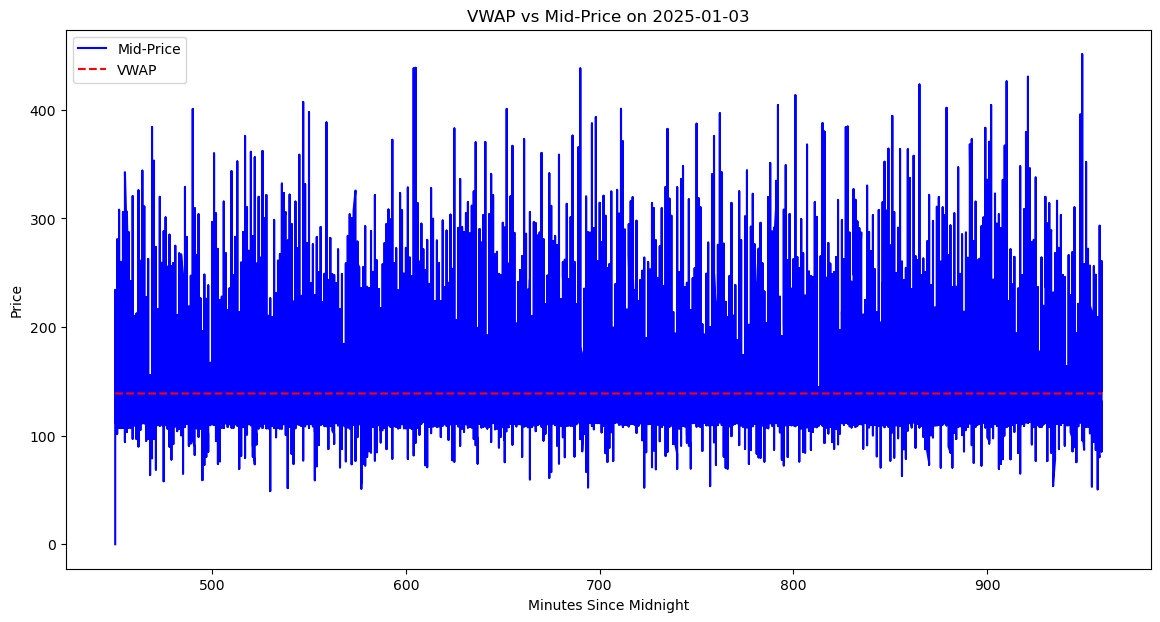

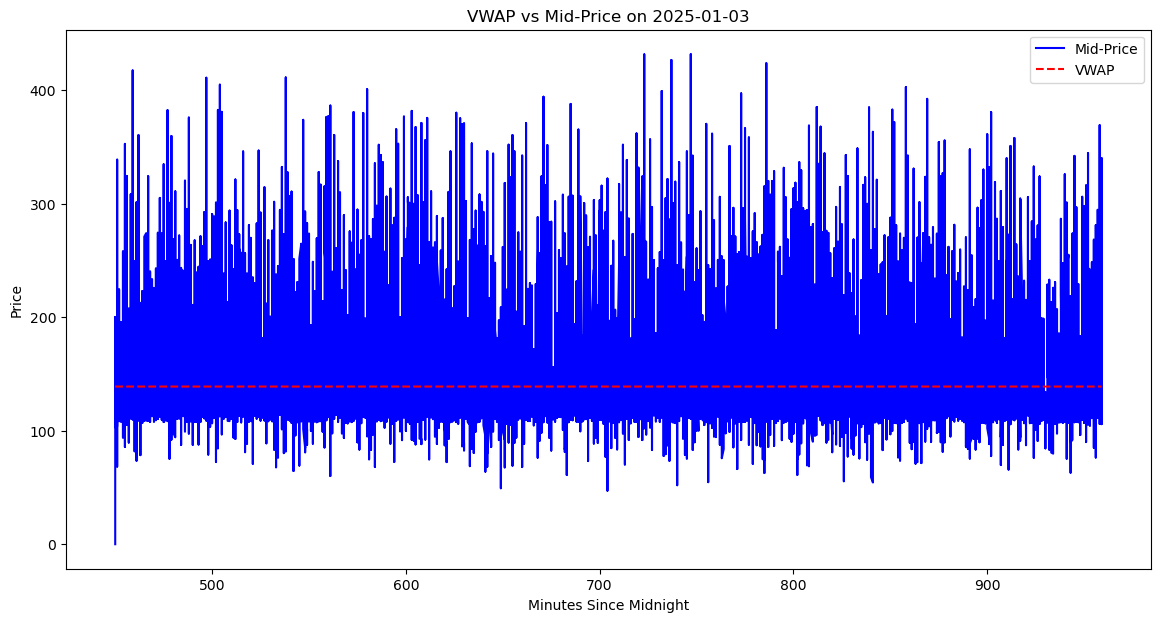

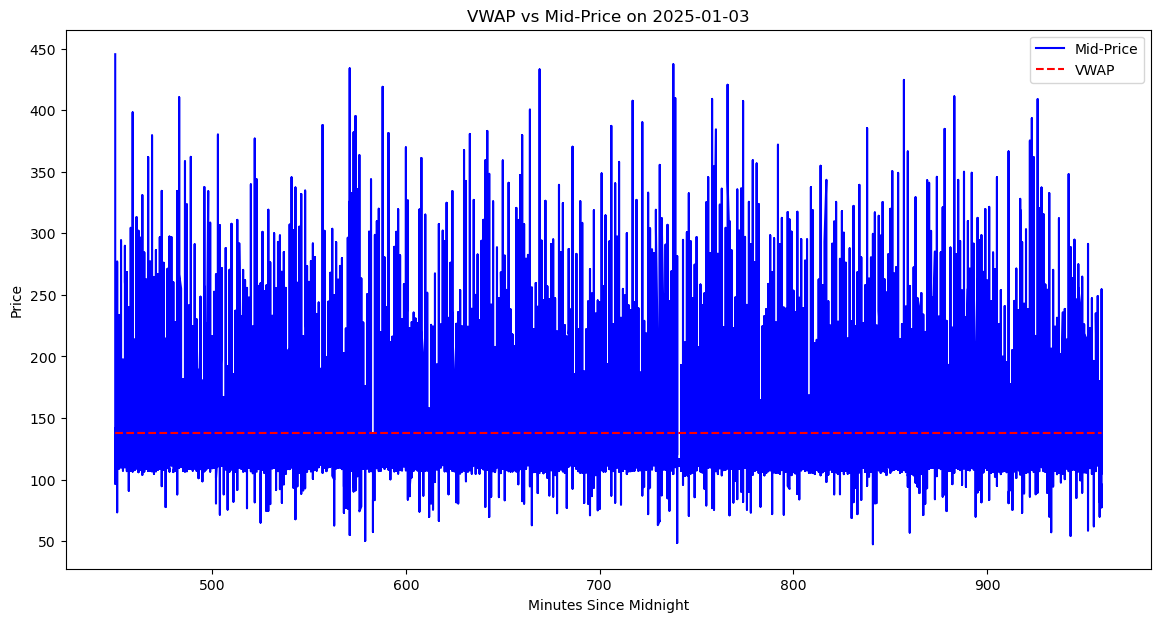

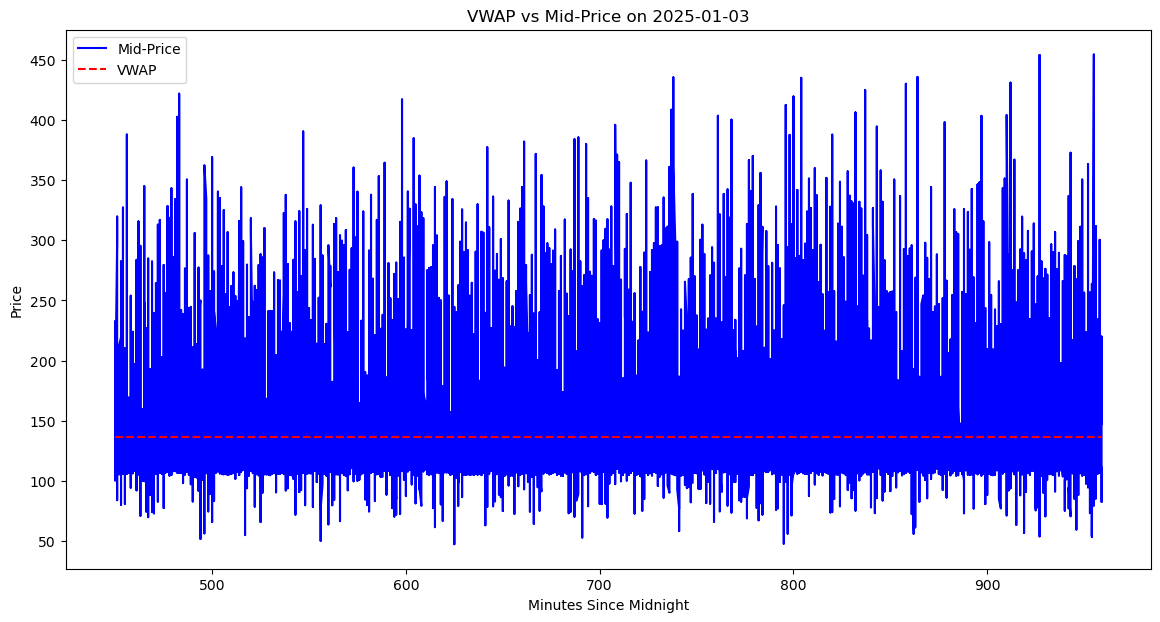

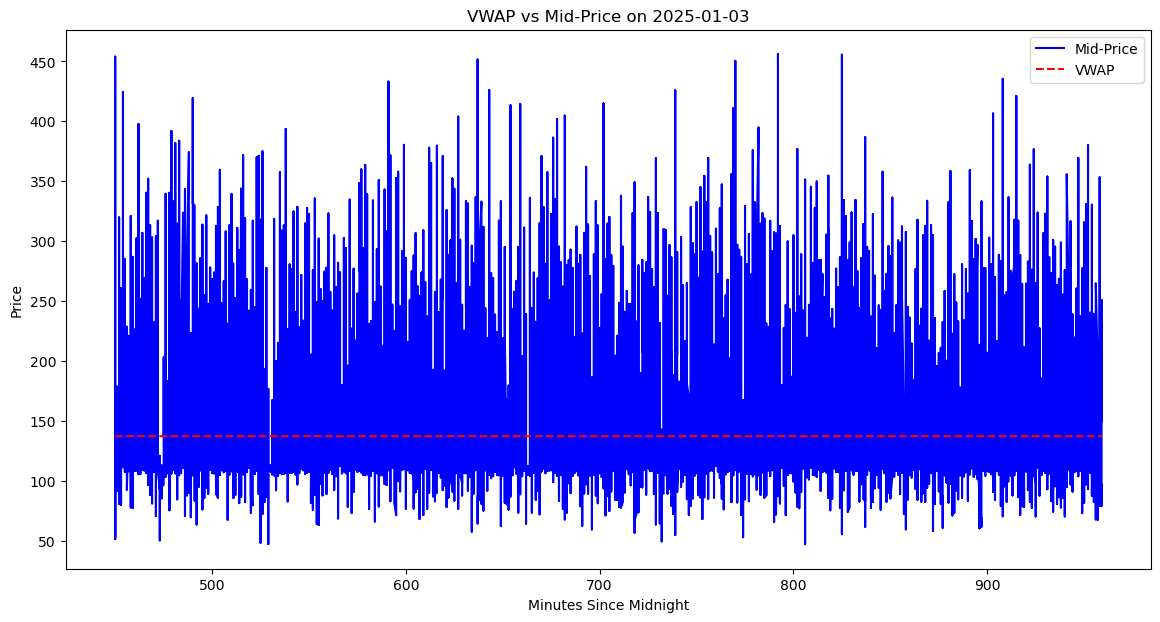

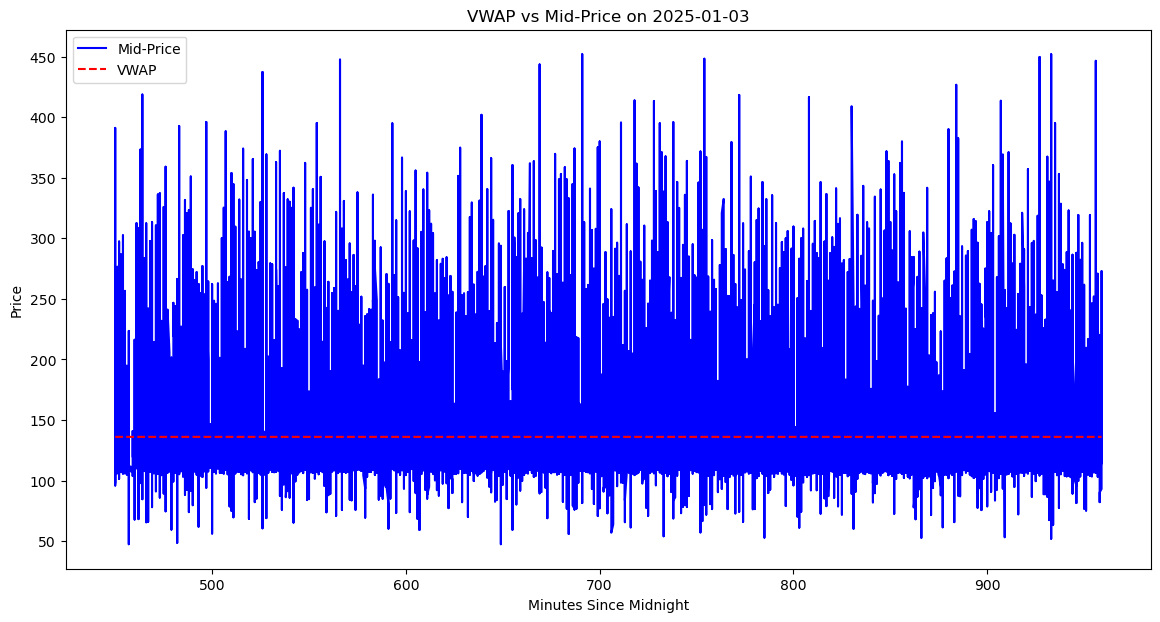

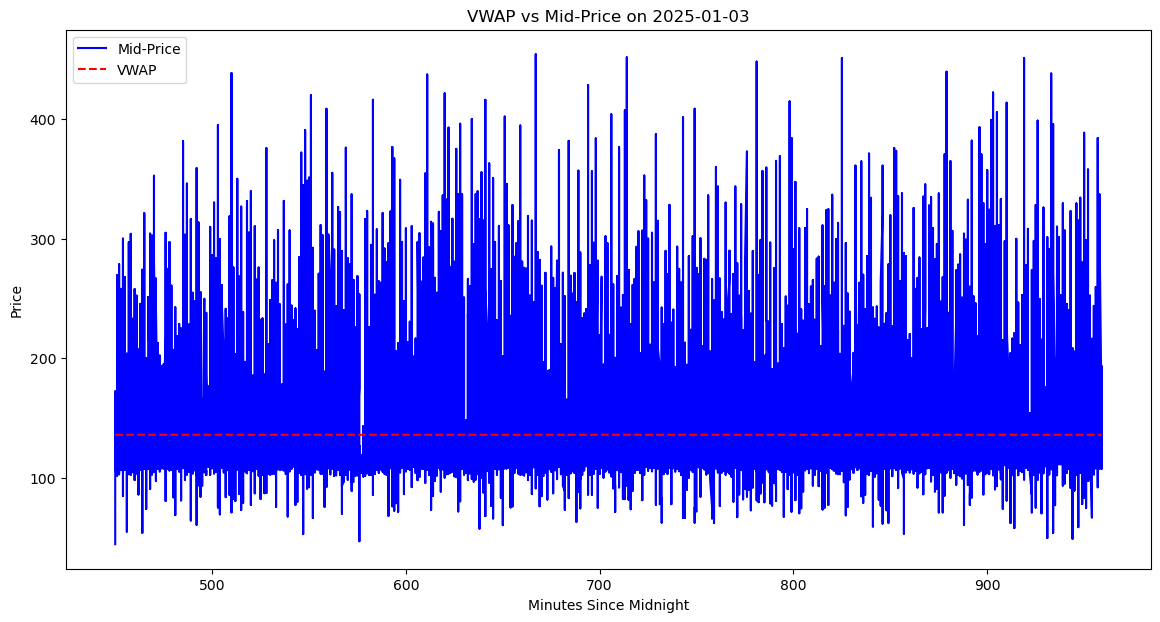

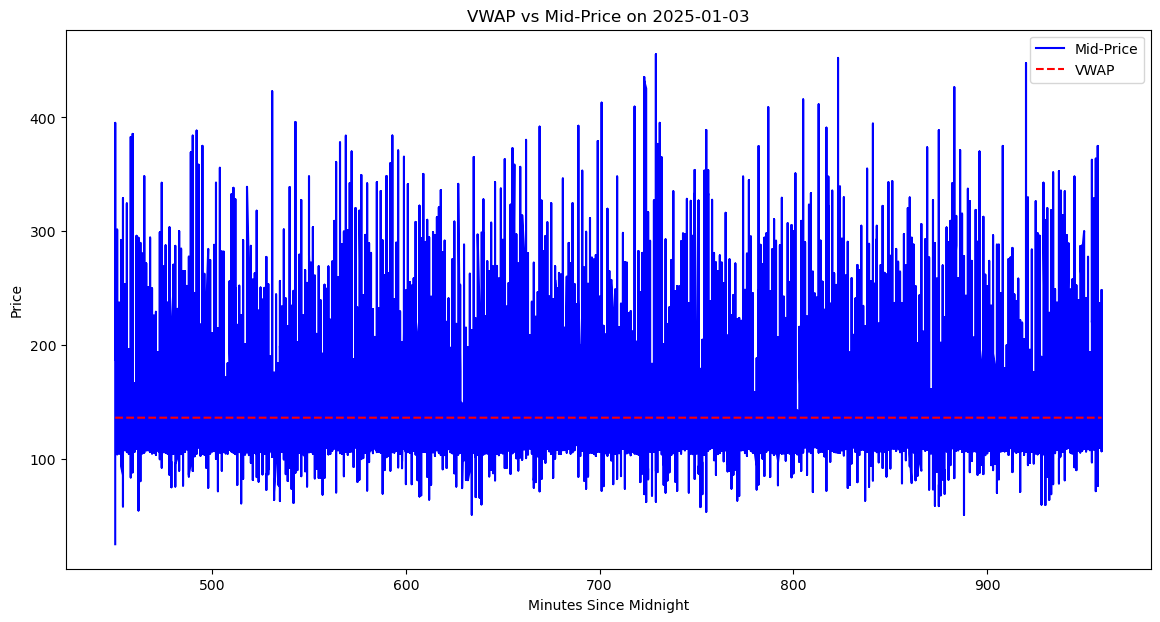

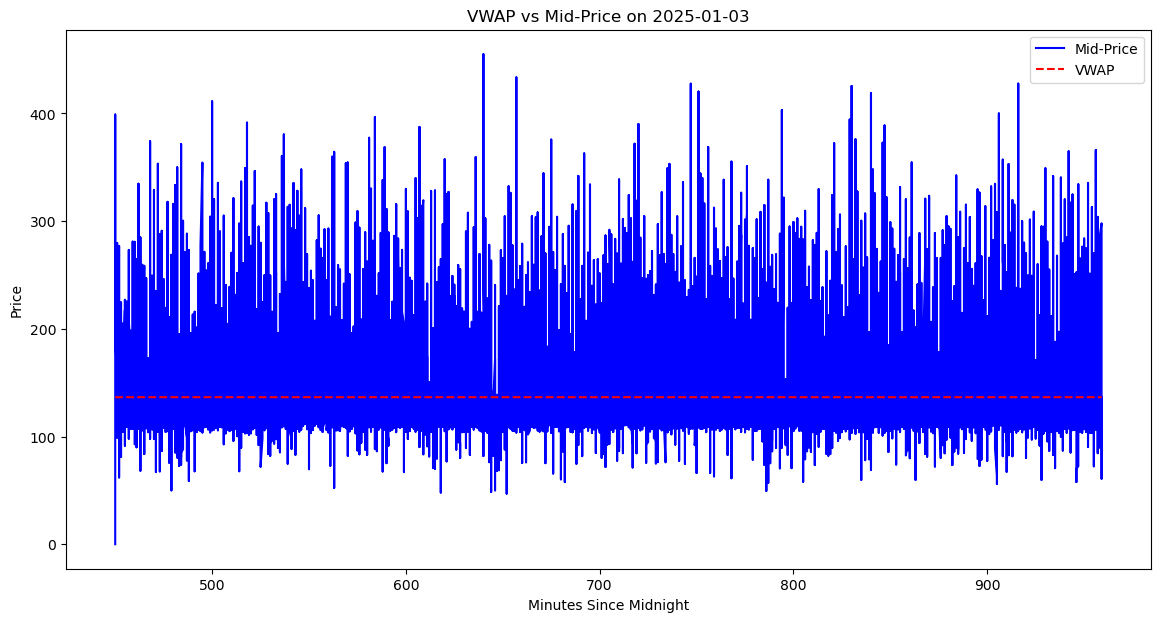

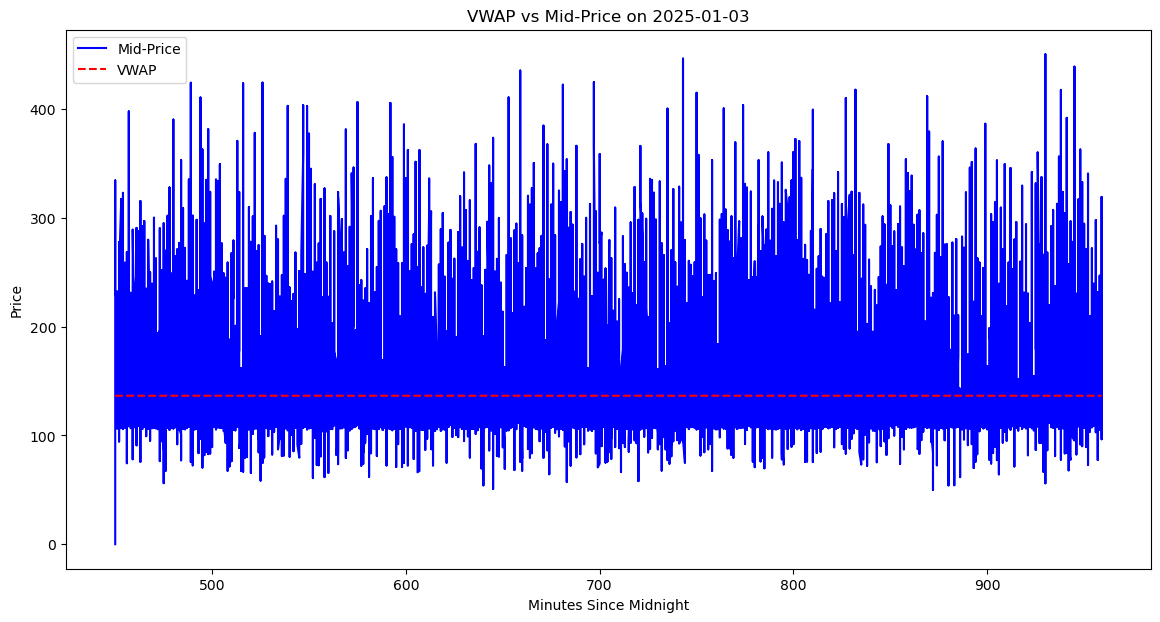

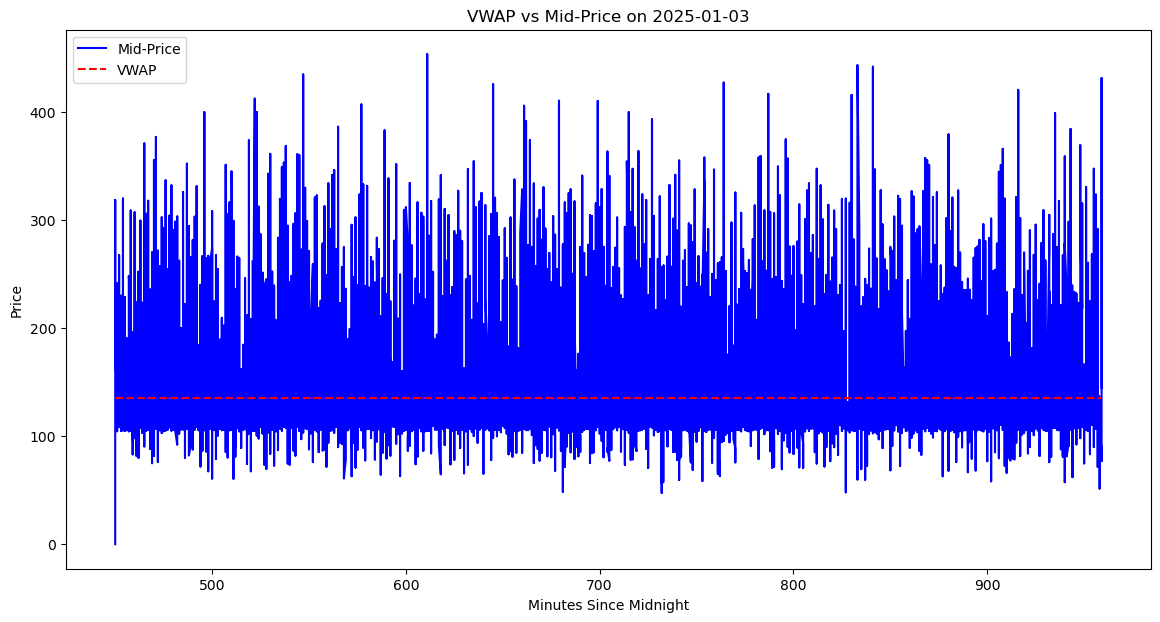

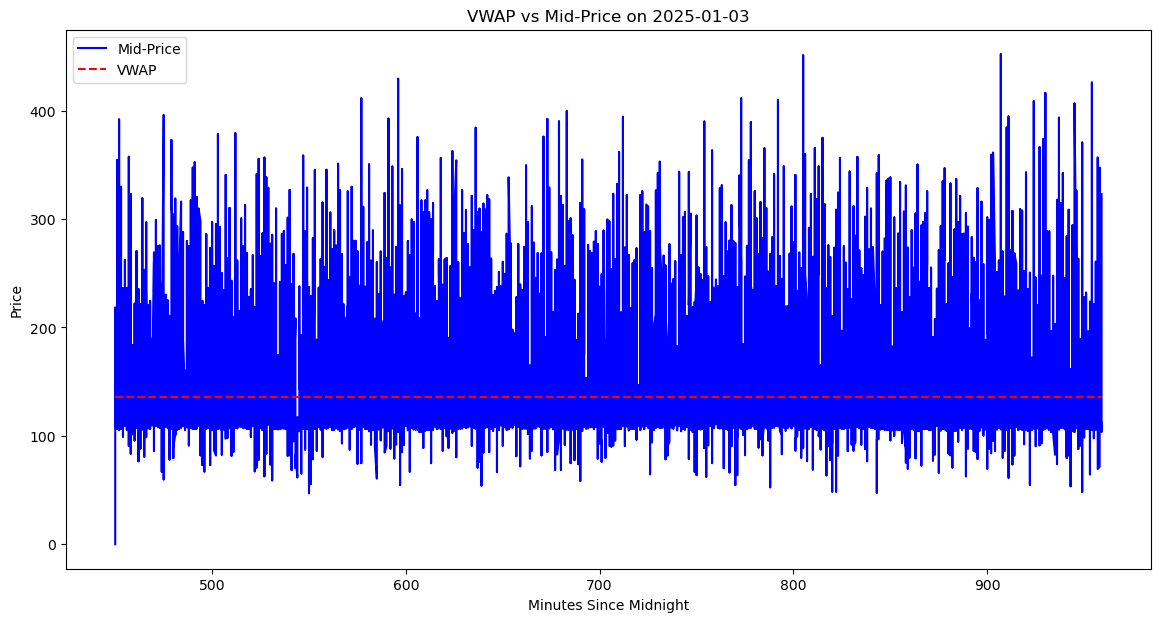

In [ ]:
import matplotlib.pyplot as plt

for date in unique_dates:
    # Get data for the current date
    daily_data = all_data.loc[date]

    # Convert time to minutes since midnight for plotting on the chart
    minutes_since_midnight = daily_data.index.get_level_values('Time').map(lambda t: t.hour * 60 + t.minute)

    # Create a plot
    plt.figure(figsize=(14, 7))

    # Plot Mid-Price
    plt.plot(minutes_since_midnight, daily_data['Mid-Price'], label='Mid-Price', color='blue')

    # Plot VWAP
    plt.plot(minutes_since_midnight, daily_data['VWAP'], label='VWAP', color='red', linestyle='--')

    plt.title(f'VWAP vs Mid-Price on {selected_date.date()}')
    plt.xlabel('Minutes Since Midnight')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


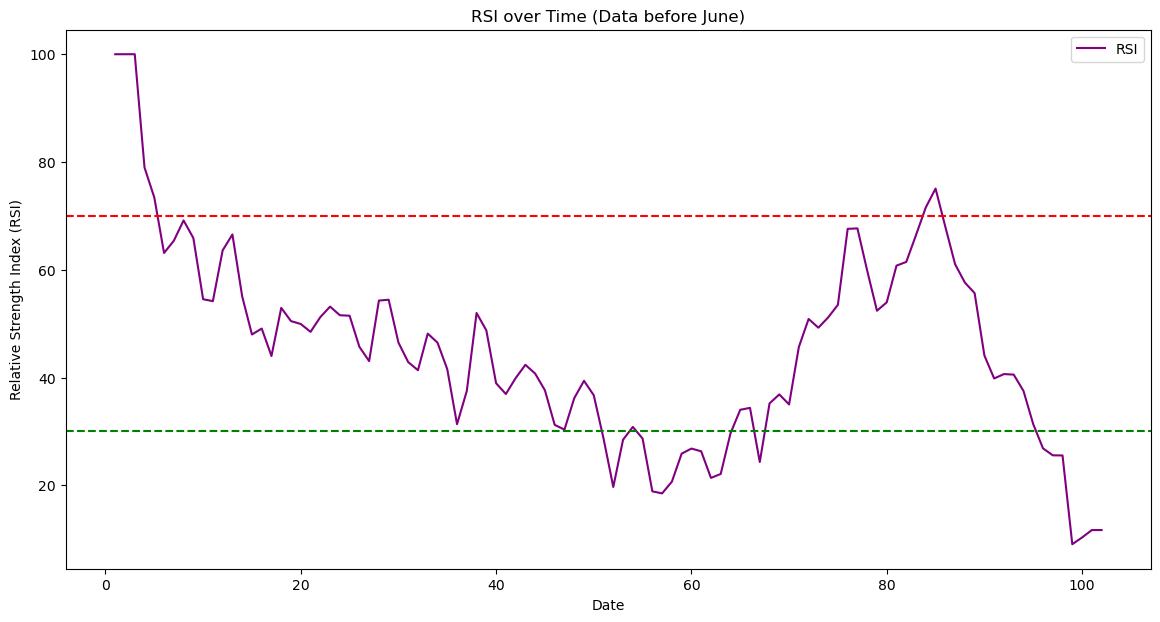

In [21]:
import pandas as pd
import glob
import os

# Reset all_data to an empty DataFrame
all_data = pd.DataFrame()

folder_path = '/Users/zenglingjie/PycharmProjects/wirelessnetwork/Lob_test'
file_pattern = "UoB_Set01_2025-*.csv"
file_paths = glob.glob(os.path.join(folder_path, file_pattern))

for file_path in file_paths:
    # Read CSV file
    daily_data = pd.read_csv(file_path)
    
    # Extract date from file name
    date_str = file_path.split('/')[-1].split('Set01_')[1].split('LOBs')[0]
    date = pd.to_datetime(date_str)
    
    # Add logic to keep data only before June
    if date.month >= 6:
        continue
    
    # Add date to daily_data
    daily_data['Date'] = date
    
    # Merge daily_data into all_data
    all_data = pd.concat([all_data, daily_data], ignore_index=True)

# Check and remove any rows containing NaT
all_data.dropna(subset=['Date'], inplace=True)

# Convert 'Time' column (if 'Time' column exists in your data)
if 'Time' in all_data.columns:
    all_data['Time'] = pd.to_datetime(all_data['Time'], format='%H:%M:%S').dt.time
else:
    # If 'Time' column doesn't exist, you may need to add logic to handle or generate time information
    pass

# Set 'Date' and 'Time' as multi-index
all_data.set_index(['Date', 'Time'], inplace=True)

# Keep only data before June
all_data = all_data[all_data.index.get_level_values('Date').month < 6]

# Perform RSI calculation
# Assuming df is your DataFrame and is already sorted by date
# Assuming 'Mid-Price' column contains the price you want to analyze

# 1. Calculate price change
df['Price Change'] = df['Mid-Price'].diff()

# 2. Separate positive and negative price changes
df['Gain'] = df['Price Change'].clip(lower=0)
df['Loss'] = -df['Price Change'].clip(upper=0)

# 3. Calculate average gain and average loss
window_length = 14
df['Avg Gain'] = df['Gain'].rolling(window=window_length, min_periods=1).mean()
df['Avg Loss'] = df['Loss'].rolling(window=window_length, min_periods=1).mean()

# 4. Calculate RSI
df['RS'] = df['Avg Gain'] / df['Avg Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Plot RSI
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')  # Overbought level line
plt.axhline(30, linestyle='--', color='green')  # Oversold level line
plt.title('RSI over Time (Data before June)')
plt.xlabel('Date')
plt.ylabel('Relative Strength Index (RSI)')
plt.legend()
plt.show()


In [38]:
# load data
file_path = "/Users/zenglingjie/PycharmProjects/wirelessnetwork/daily_stats.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])
print(df.head)

<bound method NDFrame.head of           Date   Mid-Price  Total_volume
0   2025-01-02  286.411847       5424861
1   2025-01-03  306.542356       5067907
2   2025-01-06  317.788385       5310600
3   2025-01-07  359.014978       5677630
4   2025-01-08  339.691776       5399132
..         ...         ...           ...
98  2025-05-23  157.580967       4960918
99  2025-05-27  159.083260       4887301
100 2025-05-28  154.868634       5049099
101 2025-05-29  150.737557       5001801
102 2025-05-30  146.127211       5077811

[103 rows x 3 columns]>


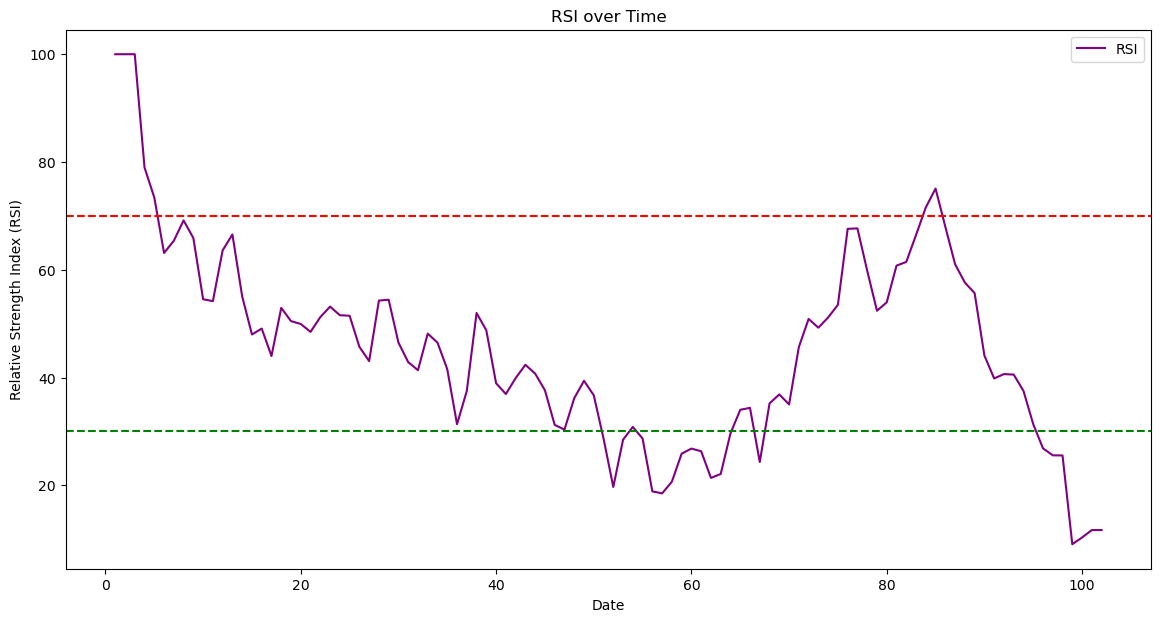

In [32]:
import pandas as pd

# Assuming df is your DataFrame and is already sorted by date
# Assuming 'Mid-Price' column contains the price you want to analyze

# 1. Calculate price change
df['Price Change'] = df['Mid-Price'].diff()

# 2. Separate positive and negative price changes
df['Gain'] = df['Price Change'].clip(lower=0)
df['Loss'] = -df['Price Change'].clip(upper=0)

# 3. Calculate average gain and average loss
window_length = 14
df['Avg Gain'] = df['Gain'].rolling(window=window_length, min_periods=1).mean()
df['Avg Loss'] = df['Loss'].rolling(window=window_length, min_periods=1).mean()

# 4. Calculate RSI
df['RS'] = df['Avg Gain'] / df['Avg Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Plot RSI
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')  # Overbought level line
plt.axhline(30, linestyle='--', color='green')  # Oversold level line
plt.title('RSI over Time')
plt.xlabel('Date')
plt.ylabel('Relative Strength Index (RSI)')
plt.legend()
plt.show()
